
## Delta GPTs (Train on 300 and predict the next 20)

* Delta: SI differences
* compare 100 to 200 to 300
* Written to run on GPU
* Long train so best run on GPU


In [1]:

##!pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn


In [2]:

import pandas as pd
import numpy as np


In [3]:

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [4]:

## import xgboost as xgb
## from xgboost import XGBClassifier, XGBRegressor, DMatrix, train as train_xgb


In [5]:


import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

import numpy as np
import torch
import pandas as pd
import sklearn
import random



In [6]:

from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

## coefficient of determination 
from sklearn.metrics import r2_score



## Read the data


In [7]:

for_RNN_data_CIVS = pd.read_csv('input/RNN_time_DELAYS_2000_PerCast_rcalix.csv')


In [8]:

for_RNN_data_CIVS


Unnamed: 0     SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
0              1  0.719500                4.242439          2161.425209   
1              2  0.710486                4.174343          2168.238915   
2              3  0.666106                4.126144          2167.779119   
3              4  0.675145                4.120736          2166.974740   
4              5  0.776831                4.120331          2166.384674   
...          ...       ...                     ...                  ...   
1378        1379  0.762500                4.204430          2169.361647   
1379        1380  0.646000                4.208539          2169.079601   
1380        1381  0.654667                4.212648          2168.797556   
1381        1382  0.591667                4.217784          2168.444999   
1382        1383  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0               9306.840913   184.818611                    0.0           0.0   
1               9336.364456   185.993447                    0.0           0.0   
2               9419.200115   185.828474                    0.0           0.0   
3               9564.165802   185.924481                    0.0           0.0   
4               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1378            9297.484543   185.046491                    0.0           0.0   
1379            9312.779010   185.053796                    0.0           0.0   
1380            9303.753420   185.007919                    0.0           0.0   
1381            9333.448101   184.942435                    0.0           0.0   
1382            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  ...  SE_Uptake_f3  NW_Uptake_f3  \
0              0.354        0.16  ...    182.533770    148.126483   
1              0.313        0.83  ...    183.725050    148.161842   
2              0.360        0.10  ...    195.812061    147.562523   
3              0.319        0.34  ...    188.028883    147.807509   
4              0.335        0.28  ...    200.141261    149.014319   
...              ...         ...  ...           ...           ...   
1378           0.343        0.30  ...    185.900341    148.103530   
1379           0.324        0.30  ...    182.408576    148.106012   
1380           0.325        0.16  ...    181.684649    148.108493   
1381           0.335        0.26  ...    195.202191    148.111595   
1382           0.328        1.08  ...    220.149599    148.115317   

      SW_Uptake_f3  Slag_SiO2_f2  Slag_CaO_f2  Slag_MgO_f2  \
0       192.512412     37.369999    36.439999         9.86   
1       192.366046     35.540001    35.970001         9.03   
2       198.423474     34.849998    36.590000         9.13   
3       179.116839     34.009998    35.900002         8.82   
4       186.052137     34.380001    35.970001         8.73   
...            ...           ...          ...          ...   
1378    199.914193     35.900002    37.259998        10.04   
1379    193.501805     35.900002    37.259998        10.04   
1380    194.328694     35.580002    36.500000         9.30   
1381    215.606202     35.130001    37.470001        10.01   
1382    250.937261     35.570000    36.970001         9.47   

      SNORT_VALVE_POSITION_f3  TOP_PRESS_f3  HOT_BLAST_PRESSURE_f3  \
0                   98.334297     18.532928              36.602600   
1                   98.334297     18.397217              36.882963   
2                   98.334297     18.393974              36.568884   
3                   98.334297     18.370316              36.839147   
4                   98.334297     18.395860              36.658018   
...                       ...           ...                    ...   
1378                98.334297     18.209401              36.727897  

In [9]:

cols_list_DF = for_RNN_data_CIVS.columns.values.tolist()
cols_list_DF


['Unnamed: 0',
 'SI_f1',
 'HOST_BLAST_MOISTURE_f3',
 'HOT_BLAST_TMP_NS_f3',
 'NAT_GAS _INJECTION_f3',
 'WINDRATE_f3',
 'HIGH_PURITY_OXYGEN_f3',
 'COAL_FLOW_f3',
 'Cast_Avg_Mn_f2',
 'Slag_Fe_f2',
 'Selec_Top_Gas_CO_f3',
 'Selec_Top_Gas_CO2_f3',
 'Selec_Top_Gas_H2_f3',
 'Selec_Top_Gas_N2_f3',
 'NE_Uptake_f3',
 'SE_Uptake_f3',
 'NW_Uptake_f3',
 'SW_Uptake_f3',
 'Slag_SiO2_f2',
 'Slag_CaO_f2',
 'Slag_MgO_f2',
 'SNORT_VALVE_POSITION_f3',
 'TOP_PRESS_f3',
 'HOT_BLAST_PRESSURE_f3',
 'cokerate_f4']

In [10]:

l_new = ['SI_f1',
 'HOST_BLAST_MOISTURE_f3',
 'HOT_BLAST_TMP_NS_f3',
 'NAT_GAS _INJECTION_f3',
 'WINDRATE_f3',
 'HIGH_PURITY_OXYGEN_f3',
 'COAL_FLOW_f3',
 'Cast_Avg_Mn_f2',
 'Slag_Fe_f2',
 'Selec_Top_Gas_CO_f3',
 'Selec_Top_Gas_CO2_f3',
 'Selec_Top_Gas_H2_f3',
 'Selec_Top_Gas_N2_f3',
 'NE_Uptake_f3',
 'SE_Uptake_f3',
 'NW_Uptake_f3',
 'SW_Uptake_f3',
 'Slag_SiO2_f2',
 'Slag_CaO_f2',
 'Slag_MgO_f2',
 'SNORT_VALVE_POSITION_f3',
 'TOP_PRESS_f3',
 'HOT_BLAST_PRESSURE_f3',
 'cokerate_f4']


In [11]:

for_RNN_data_CIVS = for_RNN_data_CIVS[l_new]


In [12]:

for_RNN_data_CIVS 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
0     0.719500                4.242439          2161.425209   
1     0.710486                4.174343          2168.238915   
2     0.666106                4.126144          2167.779119   
3     0.675145                4.120736          2166.974740   
4     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1378  0.762500                4.204430          2169.361647   
1379  0.646000                4.208539          2169.079601   
1380  0.654667                4.212648          2168.797556   
1381  0.591667                4.217784          2168.444999   
1382  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0               9306.840913   184.818611                    0.0           0.0   
1               9336.364456   185.993447                    0.0           0.0   
2               9419.200115   185.828474                    0.0           0.0   
3               9564.165802   185.924481                    0.0           0.0   
4               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1378            9297.484543   185.046491                    0.0           0.0   
1379            9312.779010   185.053796                    0.0           0.0   
1380            9303.753420   185.007919                    0.0           0.0   
1381            9333.448101   184.942435                    0.0           0.0   
1382            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  Selec_Top_Gas_CO_f3  ...  SE_Uptake_f3  \
0              0.354        0.16            21.080431  ...    182.533770   
1              0.313        0.83            20.996415  ...    183.725050   
2              0.360        0.10            20.749627  ...    195.812061   
3              0.319        0.34            20.609259  ...    188.028883   
4              0.335        0.28            20.617383  ...    200.141261   
...              ...         ...                  ...  ...           ...   
1378           0.343        0.30            21.039583  ...    185.900341   
1379           0.324        0.30            21.043999  ...    182.408576   
1380           0.325        0.16            21.048415  ...    181.684649   
1381           0.335        0.26            21.053935  ...    195.202191   
1382           0.328        1.08            21.060559  ...    220.149599   

      NW_Uptake_f3  SW_Uptake_f3  Slag_SiO2_f2  Slag_CaO_f2  Slag_MgO_f2  \
0       148.126483    192.512412     37.369999    36.439999         9.86   
1       148.161842    192.366046     35.540001    35.970001         9.03   
2       147.562523    198.423474     34.849998    36.590000         9.13   
3       147.807509    179.116839     34.009998    35.900002         8.82   
4       149.014319    186.052137     34.380001    35.970001         8.73   
...            ...           ...           ...          ...          ...   
1378    148.103530    199.914193     35.900002    37.259998        10.04   
1379    148.106012    193.501805     35.900002    37.259998        10.04   
1380    148.108493    194.328694     35.580002    36.500000         9.30   
1381    148.111595    215.606202     35.130001    37.470001        10.01   
1382    148.115317    250.937261     35.570000    36.970001         9.47   

      SNORT_VALVE_POSITION_f3  TOP_PRESS_f3  HOT_BLAST_PRESSURE_f3  \
0                   98.334297     18.532928              36.602600   
1                   98.334297     18.397217              36.882963   
2                   98.334297     18.393974              36.568884   
3                   98.334297     18.370316              36.839147   
4                   98.334297     18.395860              36.658018   
...                       ...    


## Plots


In [13]:

plt.rcParams["figure.figsize"] = [15, 5]


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

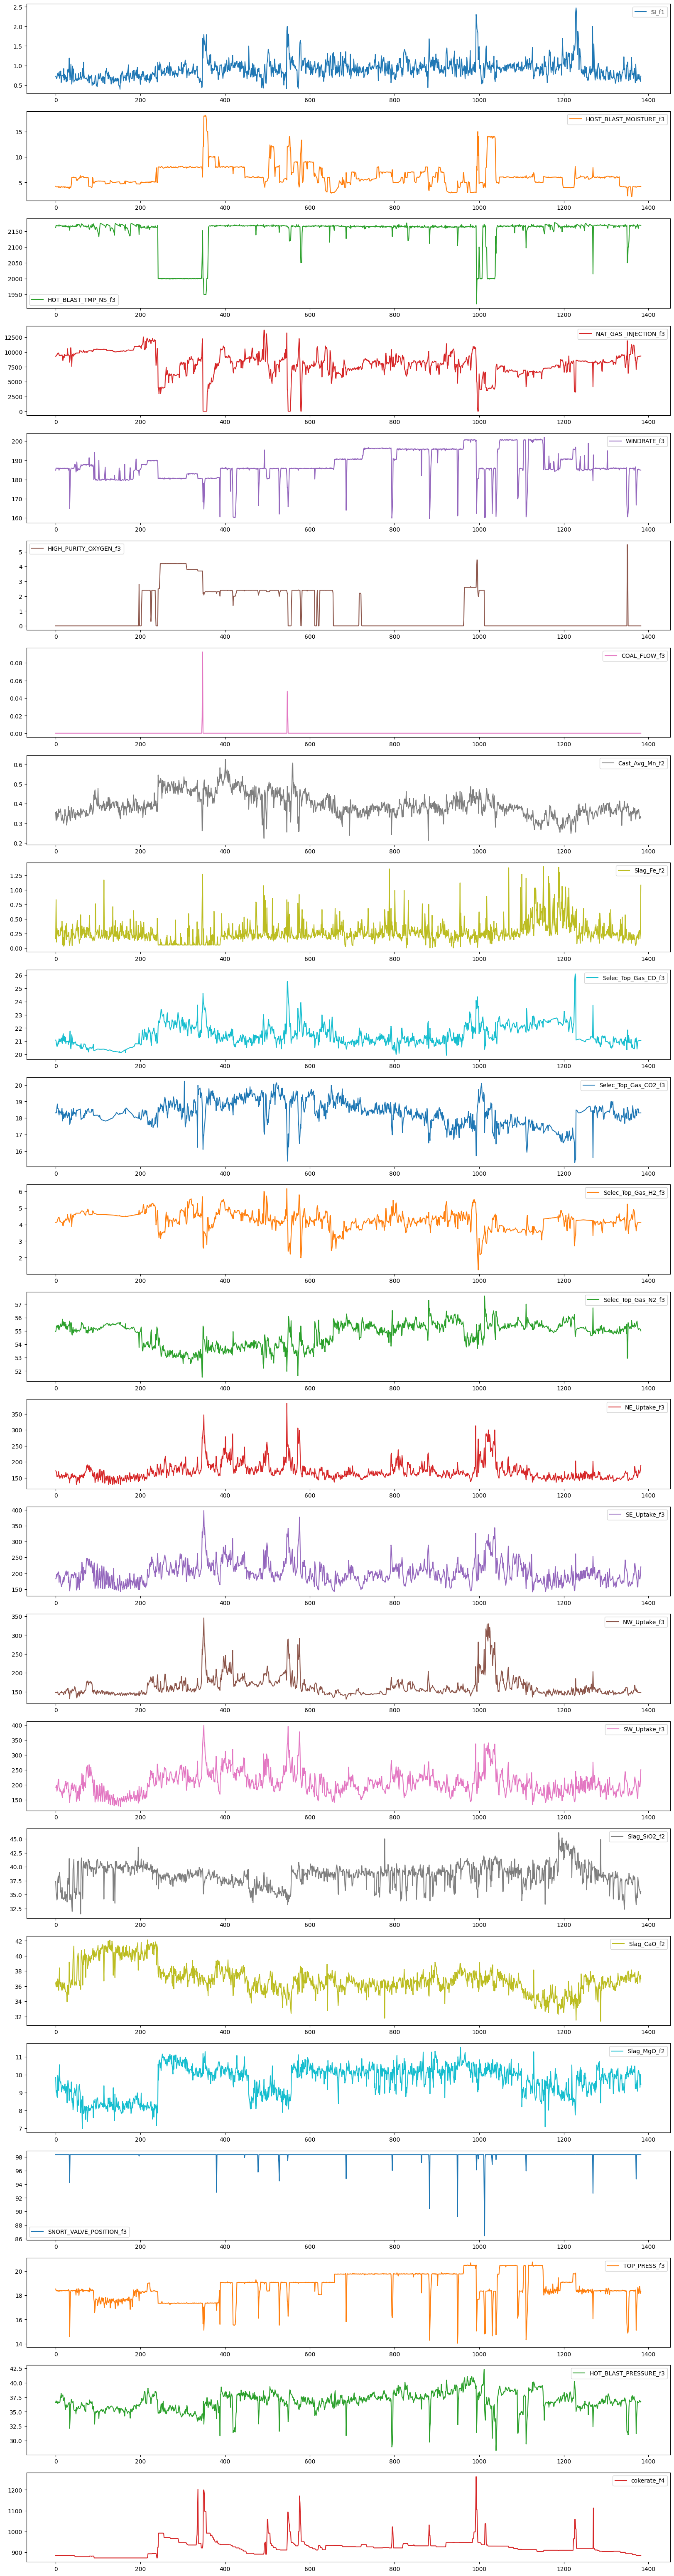

In [14]:

for_RNN_data_CIVS.plot( kind='line', subplots=True, figsize=(20,80),
        sharex=False, sharey=False, legend=True )


In [15]:

print(for_RNN_data_CIVS.shape)


(1383, 24)



## Parameters


In [16]:

pd.options.display.max_columns = None



## Standardize (Scaling)


In [17]:

def standardize_x_scales( data_gpt_pd ):


    data_gpt = torch.tensor(data_gpt_pd.values).float()
        
    epsilon = 0.0001

    print( data_gpt.shape)        
    
    x_means      = data_gpt .mean(0,  keepdim=True)
    x_deviations = data_gpt .std( 0,  keepdim=True) + epsilon

    ## x_train_tr_scaled = (x_train_tr - x_means) / x_deviations
    ## y_test_tr_scaled  = (y_test_tr  - y_means) / y_deviations
    
    return data_gpt, x_means, x_deviations


In [18]:

## x_means      = simple_x_train.mean(0, keepdim=True ) 
## x_deviations = simple_x_train.std( 0, keepdim=True) + epsilon



## Shift and create batches


In [19]:

def get_batch( data_gpt ):
    
    ix = torch.randint(   len(data_gpt) - block_size, (batch_size,)   )

    ## ix = [ int( tensor1.item() ) for tensor1 in ix ]
    ## print(ix.shape)
    ## print(ix)
    ## print(ix[1])
    ## print(  type(ix[1])  )
    ## print( len(data_gpt) - block_size )
    ## print(  block_size )
    ## print(  (batch_size,)  )
    
    x  = torch.stack(    [  data_gpt[   i   : i+block_size    ]   for i in ix ]    ) 
    y  = torch.stack(    [  data_gpt[   i+1 : i+1+block_size  ]   for i in ix ]    )
    
    x, y = x.to(device), y.to(device)

    return x, y


In [20]:

'''

train_CIVS_tr, x_means, x_standard_devs = standardize_x_scales( train_CIVS )

train_CIVS_tr_scaled = ( train_CIVS_tr - x_means ) / x_standard_devs

bt_train_x, bt_train_y = get_batch( train_CIVS_tr_scaled )

bt_train_x.shape

bt_train_y.shape

x_means

'''


'\n\ntrain_CIVS_tr, x_means, x_standard_devs = standardize_x_scales( train_CIVS )\n\ntrain_CIVS_tr_scaled = ( train_CIVS_tr - x_means ) / x_standard_devs\n\nbt_train_x, bt_train_y = get_batch( train_CIVS_tr_scaled )\n\nbt_train_x.shape\n\nbt_train_y.shape\n\nx_means\n\n'


## Estimate loss - No Training


In [21]:

@torch.no_grad()    ## for efficient processing
def estimate_loss( model, criterion ):
    
    out = {}
    model.eval()   ## set to no training
    
    for split in ['train', 'test']:
        losses = torch.zeros(eval_iters)
        for k in range( eval_iters ):
            X, Y = get_batch( split )
            logits  = model(X, Y)
            B, T, E  = logits.shape
            pred     = logits.view( B*T, E)
            y_train  = Y.view(B*T, E)
            loss =  criterion( pred, y_train )
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()  ## back to training

    return out



## NN Architectures


In [22]:

class Head(nn.Module):

    def __init__(self, head_size):
        super().__init__()
        
        self.key   = nn.Linear(n_embd, head_size, bias=False)  ## [512, 64]
        self.query = nn.Linear(n_embd, head_size, bias=False)  ## [512, 64]
        self.value = nn.Linear(n_embd, head_size, bias=False)  ## [512, 64]

        tril_def = torch.tril( torch.ones(block_size, block_size) )  ## [40, 40]
        
        self.register_buffer(
                  'tril', 
                  tril_def
               )
        
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        
        B, T, E = x.shape   ## [batch_size, 40, 512]
        
        k = self.key(   x )            ## k = (B, T, 64)
        q = self.query( x )            ## q = (B, T, 64)

        E2 = 64     ## I think this is 64 and not 512
        ## (B, T, E) @ (B, E, T)  -> (B, T, T)
        wei = q @ k.transpose(-2, -1) * E2 ** -0.5        
        
        wei = wei.masked_fill(
                      self.tril[:T, :T] == 0, 
                      float('-inf')
        )   
        
        ## (B, T, T)
        wei = F.softmax( wei, dim= -1 )         ## (B, T, T)
        wei = self.dropout(   wei   )
        
        ## perform weighted aggregation of values
        
        v   = self.value(  x  )   ## x = (B, 40, E)
        out = wei @ v             ## (B, T, T) @ (B, T, 64) -> (B, T, 64)
        
        return out
        


In [23]:

class FeedForward(nn.Module):

    def __init__(self, n_embd):         ## 512
        
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),      ## [512, 4*512]
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd),      ## [4*512, 512]
            nn.Dropout(dropout),
        )
        
    def forward(self, x):
        return self.net(x)


In [24]:

class MultiHeadAttention(nn.Module):

    def __init__(self, num_heads, head_size):    ## (8, 64)
        super().__init__()
        self.heads = nn.ModuleList(  [ Head(head_size) for _ in range(num_heads) ] )
        self.proj  = nn.Linear(n_embd, n_embd)   ## 512, 512
        self.dropout = nn.Dropout(dropout)
    
    def forward(self, x):
        out = torch.cat(   [ h(x) for h in self.heads ], dim = -1   )
        out = self.proj(  out   )
        out = self.dropout(   out   )
        return out


In [25]:

class Block(nn.Module):
    
    def __init__(self, n_embd, n_head):     ## (512, 8)
        super().__init__()
        head_size = n_embd // n_head        ## 64
        self.sa   = MultiHeadAttention(n_head, head_size)
        self.ffwd = FeedForward( n_embd)    ## 512
        self.ln1  = nn.LayerNorm(n_embd)
        self.ln2  = nn.LayerNorm(n_embd)
        
    def forward(self, x):
        x = x + self.sa(     self.ln1(x)      )
        x = x + self.ffwd(   self.ln2(x)      )
        return x


In [26]:

class Time_Series_GPT(nn.Module):
    
    def __init__(self, seq_length, input_size, output_size):
        
        super().__init__()
        
        self.output_size= output_size
        self.seq_length = seq_length
        self.input_size = input_size

        
        ## self.token_embedding_table = nn.Embedding(vocab_size, n_embd)   ## [65, 512]
        self.pos_emb_table         = nn.Embedding(block_size, n_embd)     ## [block, 512]
        
        self.blocks = nn.Sequential(
                *[   Block(n_embd, n_head=n_head) for _ in range(n_layer)    ]
        )
        
        self.ln_f        = nn.LayerNorm(  n_embd    )        
        self.lm_ffw_head = nn.Linear(n_embd, 24)  ## [512, 65] # FFW Layer

        self.map_24_512 = nn.Linear(24, 512)  ## [24, 512] # rc remove
        

    def forward(self,  idx, targets):

        ## print( idx.shape      )
        ## print( targets.shape  )

        B = idx.shape[0]       ## 8
        T = idx.shape[1]       ## 20
        
        ## B, T = idx.shape     ## (Batch, 40)
        ## ids and targets are both (B, T) tensors of integers
        ## tok_emb = self.token_embedding_table(idx)  

        idx = self.map_24_512( idx )

        tok_emb = idx       ## (8, 20, 24)
        pos_emb = self.pos_emb_table( torch.arange(T, device=device) )  

        ## print("blue")
        ## print(tok_emb.shape)
        ## print(pos_emb.shape)
        
        x = tok_emb + pos_emb    ## [B, T, E] or [64, 40, 512], now [8, 20, 24]

        ## self.map_24_512 = nn.Linear(24, 512)  ## [24, 512] # rc remove
        
        x = self.blocks(  x  )   ## (B, T, E)   
        x = self.ln_f(    x  )   ## (B, T, E)   ## norm
        logits = self.lm_ffw_head(x)         ## [B, 40, 65] 
        
        return logits
        
        
    def generate(self, idx, max_new_tokens):    ## idx is (B, T)
        for _ in range(max_new_tokens):
            ## crop idx to the last block_size tokens
            idx_cond = idx[:, -block_size:, :]
            print(idx_cond.shape)
            logits = self(idx_cond, 0 )    ## ## get preds
            logits = logits[:, -1, :]    ## focus on last one (B, E)
            logits = logits.unsqueeze(0)
            print(logits.shape)
            ## probs = F.softmax(logits, dim= -1)    ## (B, E) get probs
            ## idx_next = torch.multinomial(probs, num_samples=1)     ## (B, 1) selected
            idx = torch.cat(  (idx, logits), dim=1  )   ## (B, T+1) append sample to running sequence
            print(idx.shape)
        return idx
            


In [27]:

def train_model_GPT( train_CIVS_2 ):
 
    
    model  = Time_Series_GPT(block_size, 24, 24)
    model  = model.to( device )
    
    optimizer       = torch.optim.Adam(     model.parameters(), lr=learning_rate   )
    ## optimizer    = torch.optim.RMSprop(  model.parameters(), lr=learning_rate   )

    ## criterion       = nn.MSELoss()
    criterion       = nn.L1Loss()
    ## criterion_kl    = nn.KLDivLoss(reduction="batchmean")
    
    history = {'loss': [], 'test_loss': []}

    ## train_CIVS_tr, x_means, x_standard_devs = standardize_x_scales( train_CIVS )
    
    train_CIVS_tr, x_means, x_standard_devs = standardize_x_scales( train_CIVS_2 )

    train_CIVS_tr_scaled = ( train_CIVS_tr - x_means ) / x_standard_devs
        
    model.train()
    
    for batch_i, epoch in enumerate( range(max_iters) ):

        ## xb, yb = get_batch('train')
        xb, yb    = get_batch( train_CIVS_tr_scaled )

        logits   = model( xb, yb )

        B, T, E  = logits.shape
        
        pred           = logits.view( B*T, E)
        y_train        = yb.view(B*T, E)

        ## loss_cost = 0.0
        ## loss =  ( 1.0-loss_cost ) * criterion( pred, y_train ) + ( loss_cost ) * criterion( pred[:, 0], y_train[:, 0]  ) 

        #######################################################
        ## ind1 = random.randrange(0, y_train.shape[0] - 3)
        ## ind2 = ind1 + 3
        ## loss =  criterion( pred[ind1:ind2, 0], y_train[ind1:ind2, 0] )
        #######################################################

        loss =  criterion( pred, y_train )      ## seems better
        
        ## loss = criterion( pred[:, 0], y_train[:, 0]  ) 
        
        optimizer.zero_grad(set_to_none=True)           ## zero out
        loss.backward()
        optimizer.step()

        history['loss'].append(  loss.item()  )

        if batch_i % 500 == 0:
            print(batch_i, "train loss = ", loss.item() )

    
    return model, history, x_means, x_standard_devs



## Parameters


In [28]:

torch.manual_seed(256)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

block_size        = 15   ## 20     ## 4          ## 40      ## N tokens in sequence
batch_size        = 16 
max_iters         = 2000   ## 5000
eval_interval     = 500     
learning_rate     = 0.0001
eval_iters        = 300
vocab_size        = 88  ## 65

## every id for a given token is embedded to vector of this size

n_embd            = 512   ## 24        ## 512       ## 24 for time series, silicon is 0           
n_head            = 8         ## 8 attention heads
n_layer           = 6         ## 6 eoncoder layers
dropout           = 0.2



## Utility Functions


In [29]:

def GPT_get_batch_test( test_data ):
    
    ## x_time_series = torch.tensor(test_data.values).float()

    x_time_series = test_data

    print( x_time_series.shape )

    x  = torch.stack(   [   x_time_series[ 0 : -1    ]    ]    ) 
    y  = torch.stack(   [   x_time_series[ 1 :       ]    ]   )
    
    x, y = x.to(device), y.to(device)

    return x, y


In [30]:

def GPT_generate_inference(model, x_test, which_feature, string_feature, train_CIVS_2_a ):

    xb_test, yb_test = GPT_get_batch_test( x_test )
    
    print(xb_test.shape)
    print(yb_test.shape)

    input_test_x = xb_test[ :,  : 5 ]
    print("input to m.generate")
    print(input_test_x.shape)


    pred_20_seq = model.generate( input_test_x, 14 )

    print("shape of model generated output: ")
    print(pred_20_seq.shape)

    
    y_pred_gpt     = pred_20_seq.detach().cpu().numpy() 
    y_real_gpt     =     yb_test.detach().cpu().numpy() 

    print(index_to_slice)
    find_index = index_to_slice + 395
    SI_data = SI_lookup_for_RNN_data_CIVS.to_numpy()[find_index:find_index+19, 0]
    print(SI_data.shape)
    print(x_test.shape)
    
    
    print(y_pred_gpt.shape)
    print(y_real_gpt.shape)

    
    y_real_gpt = y_real_gpt.squeeze(0)
    y_pred_gpt = y_pred_gpt.squeeze(0)

    print( "unscaling" )

    print(y_pred_gpt.shape)
    print(y_real_gpt.shape)

    l_real = y_real_gpt[ :, 0]
    l_pred = y_pred_gpt[ :, 0]

    l_SI_data_real = SI_data

    si_mean         = x_means[0, 0].numpy()
    si_standard_dev = x_standard_devs[0, 0].numpy()

    print("these: ")
    print( x_means.shape )
    print( l_pred.shape )
    print( si_standard_dev.shape )
    print( si_mean.shape )
    print( si_standard_dev )
    print( si_mean)
    print( l_pred )
    print(  )
    

    ## y_descaled = y_scaled * self.y_deviations + self.y_means
    l_pred        = l_pred   * si_standard_dev   + si_mean
    l_real        = l_real   * si_standard_dev   + si_mean

    print( l_pred )
    
    print("unscale si end")


    eval_criterion = nn.MSELoss()

    mse_eval_bins = eval_criterion(
                          torch.FloatTensor( l_pred ), 
                          torch.FloatTensor( l_real )
    )

    print( l_pred  )
    print( l_real )

    print( l_pred.shape  )
    print( l_real.shape  )

    
    print( string_feature )
    print(f'Test MSE Loss: {mse_eval_bins.item():.4f}')
    print(l_real)
    print(l_pred)
    print(l_SI_data_real)
    print( "Testing R**2: ", r2_score(  l_real,  l_pred     )  )


    #######################################

    x = [ i for i in range(len(l_real)) ] 
    print(len(x))

    l_SI_data_pred = []
    www3 = SI_data = SI_lookup_for_RNN_data_CIVS.to_numpy()[find_index - 1, 0]
    the_curr_val = www3 ##l_SI_data_real[0]  ### www3
    for i in range( len(l_pred) ):
        the_curr_val = the_curr_val + l_pred[i]
        l_SI_data_pred.append( the_curr_val )

    ## l_SI_data_real = np.roll(l_SI_data_real, -1)

    plt.scatter(x, l_real, label = "real", color='red') 
    plt.plot(   x, l_real, label = "real", color='red') 
    plt.plot(   x, l_SI_data_real, label = "real", color='red') 
 
    ##print( l_pred[1:].shape )
    ##print( l_pred[0].shape )
    ## l_pred  = np.concatenate( ( l_pred[1:, ], l_pred[0] ) )
    
    l_pred = np.roll(l_pred, -1)

    

    ## l_SI_data_pred = np.roll(l_SI_data_pred, 0)
    
    plt.scatter(x, l_pred, label = "pred", color='blue') 
    plt.plot(   x, l_pred, label = "pred", color='blue') 
    plt.plot(   x, l_SI_data_pred, label = "pred", color='blue') 
    
    plt.legend() 
    plt.show()

    ##########################################

    train_plot = torch.tensor(train_CIVS_2_a.values).float().numpy()
    print( train_plot.shape )
    train_real_plot = train_plot[:, 0]
    ## l_real  = np.concatenate( ( train_real_plot[1: ], train_real_plot[:1] ) )
    l_real  = np.concatenate( ( train_real_plot, l_real ) )
    l_pred  = np.concatenate( ( train_real_plot, l_pred ) )
    ######################################

    x = [ i for i in range(len(l_real)) ] 
    print(len(x))

    x_delta = [ i for i in range(len(l_SI_data_real)) ] 
    print(len(x_delta))

    fig, ax = plt.subplots(2, 1) 
    ax[0].set_title(f'GPT Generate')
    ##ax[0].plot(history_GPT['loss'],     'k--',   label='loss'      )
    ##ax[0].plot(history_GPT['test_loss'], 'k',    label='test_loss'  )
    ax[0].scatter(x, l_real, label = "real", color='red') 
    ax[0].plot(   x, l_real, label = "real", color='red') 
    ax[0].scatter(x, l_pred, label = "pred", color='blue') 
    ax[0].plot(   x, l_pred, label = "pred", color='blue') 
    ax[0].legend()
    
    ax[1].set_title(f"GPT")
    ax[1].scatter(x_delta, l_SI_data_real, label = "real", color='red') 
    ax[1].plot(   x_delta, l_SI_data_real, label = "real", color='red') 
    ax[1].scatter(x_delta, l_SI_data_pred, label = "pred", color='blue') 
    ax[1].plot(   x_delta, l_SI_data_pred, label = "pred", color='blue') 
    fig.tight_layout()
    ax[1].legend(); plt.show()


In [31]:

def function_train_rc(  train_data  ):
    train_CIVS_2 = train_data
    si_GPT, history_GPT, x_means, x_standard_devs = train_model_GPT( train_CIVS_2 )

    fig, ax = plt.subplots(2, 1) 
    ax[0].set_title(f'GPT  Train  Loss  per epoch')
    ax[0].plot(history_GPT['loss'],     'k--',   label='loss'      )
    ax[0].plot(history_GPT['test_loss'], 'k',    label='test_loss'  )
    ax[0].legend()
    ax[1].set_title(f"GPT")

    fig.tight_layout()
    ax[1].legend(); plt.show()

    return si_GPT, history_GPT, x_means, x_standard_devs 

    

In [32]:

def function_test_rc( train_data, test_CIVS, si_GPT, x_means, x_standard_devs):
    train_CIVS_2 = train_data
    
    print(  test_CIVS.shape )
    print( train_data.shape )
    ## print( train_data[ -5: ] )

    frames           = [ train_data[ -5: ], test_CIVS ]
    test_CIVS_concat = pd.concat( frames )
    print( test_CIVS_concat.shape )

    test_CIVS_tr = torch.tensor(test_CIVS_concat.values).float()
    test_CIVS_tr_scaled = ( test_CIVS_tr - x_means ) / x_standard_devs
    print(  test_CIVS_tr_scaled.shape )

    batch_x_test = test_CIVS_tr_scaled
    print( batch_x_test.shape )
    GPT_generate_inference(   si_GPT,  batch_x_test, 0 , "SI", train_CIVS_2 )


In [33]:

'''
SI_data = SI_lookup_for_RNN_data_CIVS.to_numpy()[1040:1054, 0]
print(SI_data.shape)
SI_data
'''


'\nSI_data = SI_lookup_for_RNN_data_CIVS.to_numpy()[1040:1054, 0]\nprint(SI_data.shape)\nSI_data\n'


## The Data


In [34]:

for_RNN_data_CIVS


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
0     0.719500                4.242439          2161.425209   
1     0.710486                4.174343          2168.238915   
2     0.666106                4.126144          2167.779119   
3     0.675145                4.120736          2166.974740   
4     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1378  0.762500                4.204430          2169.361647   
1379  0.646000                4.208539          2169.079601   
1380  0.654667                4.212648          2168.797556   
1381  0.591667                4.217784          2168.444999   
1382  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0               9306.840913   184.818611                    0.0           0.0   
1               9336.364456   185.993447                    0.0           0.0   
2               9419.200115   185.828474                    0.0           0.0   
3               9564.165802   185.924481                    0.0           0.0   
4               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1378            9297.484543   185.046491                    0.0           0.0   
1379            9312.779010   185.053796                    0.0           0.0   
1380            9303.753420   185.007919                    0.0           0.0   
1381            9333.448101   184.942435                    0.0           0.0   
1382            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
0              0.354        0.16            21.080431             18.313322   
1              0.313        0.83            20.996415             18.311768   
2              0.360        0.10            20.749627             18.341701   
3              0.319        0.34            20.609259             18.644476   
4              0.335        0.28            20.617383             18.845791   
...              ...         ...                  ...                   ...   
1378           0.343        0.30            21.039583             18.308225   
1379           0.324        0.30            21.043999             18.308776   
1380           0.325        0.16            21.048415             18.309327   
1381           0.335        0.26            21.053935             18.310016   
1382           0.328        1.08            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
0                4.131228            54.940123    171.769513    182.533770   
1                4.133911            55.072779    170.595469    183.725050   
2                4.137632            55.375043    167.017421    195.812061   
3                4.142824            55.341884    154.214917    188.028883   
4                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1378             4.129485            55.162782    167.619915    185.900341   
1379             4.129674            55.162767    164.706552    182.408576   
1380             4.129862            55.140373    166.903493    181.684649   
1381             4.130097            55.098014    175.524144    195.202191   
1382             4.130380            55.003376    189.407795    220.149599   

      NW_Uptake_f3  SW_Uptake_f3  Slag_SiO2_f2  Slag_CaO_f2  Slag_MgO_f2  \
0       148.126483    192.512412     37.369999    36.439999         9.86   
1       148.161842    192.366046     35.540001    35.970001         9.03   
2       147.562523    198.423474     34.849998    36.590000         9.13   
3       147.807509    179.116839     34.009998    35.900002         8.82   
4       149.0


## Delta of SI


In [35]:

delta_for_RNN_data_CIVS      = for_RNN_data_CIVS.copy()
SI_lookup_for_RNN_data_CIVS  = for_RNN_data_CIVS.copy()


In [36]:

delta_for_RNN_data_CIVS 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
0     0.719500                4.242439          2161.425209   
1     0.710486                4.174343          2168.238915   
2     0.666106                4.126144          2167.779119   
3     0.675145                4.120736          2166.974740   
4     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1378  0.762500                4.204430          2169.361647   
1379  0.646000                4.208539          2169.079601   
1380  0.654667                4.212648          2168.797556   
1381  0.591667                4.217784          2168.444999   
1382  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0               9306.840913   184.818611                    0.0           0.0   
1               9336.364456   185.993447                    0.0           0.0   
2               9419.200115   185.828474                    0.0           0.0   
3               9564.165802   185.924481                    0.0           0.0   
4               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1378            9297.484543   185.046491                    0.0           0.0   
1379            9312.779010   185.053796                    0.0           0.0   
1380            9303.753420   185.007919                    0.0           0.0   
1381            9333.448101   184.942435                    0.0           0.0   
1382            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
0              0.354        0.16            21.080431             18.313322   
1              0.313        0.83            20.996415             18.311768   
2              0.360        0.10            20.749627             18.341701   
3              0.319        0.34            20.609259             18.644476   
4              0.335        0.28            20.617383             18.845791   
...              ...         ...                  ...                   ...   
1378           0.343        0.30            21.039583             18.308225   
1379           0.324        0.30            21.043999             18.308776   
1380           0.325        0.16            21.048415             18.309327   
1381           0.335        0.26            21.053935             18.310016   
1382           0.328        1.08            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
0                4.131228            54.940123    171.769513    182.533770   
1                4.133911            55.072779    170.595469    183.725050   
2                4.137632            55.375043    167.017421    195.812061   
3                4.142824            55.341884    154.214917    188.028883   
4                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1378             4.129485            55.162782    167.619915    185.900341   
1379             4.129674            55.162767    164.706552    182.408576   
1380             4.129862            55.140373    166.903493    181.684649   
1381             4.130097            55.098014    175.524144    195.202191   
1382             4.130380            55.003376    189.407795    220.149599   

      NW_Uptake_f3  SW_Uptake_f3  Slag_SiO2_f2  Slag_CaO_f2  Slag_MgO_f2  \
0       148.126483    192.512412     37.369999    36.439999         9.86   
1       148.161842    192.366046     35.540001    35.970001         9.03   
2       147.562523    198.423474     34.849998    36.590000         9.13   
3       147.807509    179.116839     34.009998    35.900002         8.82   
4       149.0

In [37]:

delta_for_RNN_data_CIVS .insert(loc = 0,
                                column = 'delta_SI',
                                value = 0 )



In [38]:

for_RNN_data_CIVS


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
0     0.719500                4.242439          2161.425209   
1     0.710486                4.174343          2168.238915   
2     0.666106                4.126144          2167.779119   
3     0.675145                4.120736          2166.974740   
4     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1378  0.762500                4.204430          2169.361647   
1379  0.646000                4.208539          2169.079601   
1380  0.654667                4.212648          2168.797556   
1381  0.591667                4.217784          2168.444999   
1382  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0               9306.840913   184.818611                    0.0           0.0   
1               9336.364456   185.993447                    0.0           0.0   
2               9419.200115   185.828474                    0.0           0.0   
3               9564.165802   185.924481                    0.0           0.0   
4               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1378            9297.484543   185.046491                    0.0           0.0   
1379            9312.779010   185.053796                    0.0           0.0   
1380            9303.753420   185.007919                    0.0           0.0   
1381            9333.448101   184.942435                    0.0           0.0   
1382            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
0              0.354        0.16            21.080431             18.313322   
1              0.313        0.83            20.996415             18.311768   
2              0.360        0.10            20.749627             18.341701   
3              0.319        0.34            20.609259             18.644476   
4              0.335        0.28            20.617383             18.845791   
...              ...         ...                  ...                   ...   
1378           0.343        0.30            21.039583             18.308225   
1379           0.324        0.30            21.043999             18.308776   
1380           0.325        0.16            21.048415             18.309327   
1381           0.335        0.26            21.053935             18.310016   
1382           0.328        1.08            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
0                4.131228            54.940123    171.769513    182.533770   
1                4.133911            55.072779    170.595469    183.725050   
2                4.137632            55.375043    167.017421    195.812061   
3                4.142824            55.341884    154.214917    188.028883   
4                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1378             4.129485            55.162782    167.619915    185.900341   
1379             4.129674            55.162767    164.706552    182.408576   
1380             4.129862            55.140373    166.903493    181.684649   
1381             4.130097            55.098014    175.524144    195.202191   
1382             4.130380            55.003376    189.407795    220.149599   

      NW_Uptake_f3  SW_Uptake_f3  Slag_SiO2_f2  Slag_CaO_f2  Slag_MgO_f2  \
0       148.126483    192.512412     37.369999    36.439999         9.86   
1       148.161842    192.366046     35.540001    35.970001         9.03   
2       147.562523    198.423474     34.849998    36.590000         9.13   
3       147.807509    179.116839     34.009998    35.900002         8.82   
4       149.0

In [39]:

delta_for_RNN_data_CIVS


delta_SI     SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
0            0  0.719500                4.242439          2161.425209   
1            0  0.710486                4.174343          2168.238915   
2            0  0.666106                4.126144          2167.779119   
3            0  0.675145                4.120736          2166.974740   
4            0  0.776831                4.120331          2166.384674   
...        ...       ...                     ...                  ...   
1378         0  0.762500                4.204430          2169.361647   
1379         0  0.646000                4.208539          2169.079601   
1380         0  0.654667                4.212648          2168.797556   
1381         0  0.591667                4.217784          2168.444999   
1382         0  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0               9306.840913   184.818611                    0.0           0.0   
1               9336.364456   185.993447                    0.0           0.0   
2               9419.200115   185.828474                    0.0           0.0   
3               9564.165802   185.924481                    0.0           0.0   
4               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1378            9297.484543   185.046491                    0.0           0.0   
1379            9312.779010   185.053796                    0.0           0.0   
1380            9303.753420   185.007919                    0.0           0.0   
1381            9333.448101   184.942435                    0.0           0.0   
1382            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
0              0.354        0.16            21.080431             18.313322   
1              0.313        0.83            20.996415             18.311768   
2              0.360        0.10            20.749627             18.341701   
3              0.319        0.34            20.609259             18.644476   
4              0.335        0.28            20.617383             18.845791   
...              ...         ...                  ...                   ...   
1378           0.343        0.30            21.039583             18.308225   
1379           0.324        0.30            21.043999             18.308776   
1380           0.325        0.16            21.048415             18.309327   
1381           0.335        0.26            21.053935             18.310016   
1382           0.328        1.08            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
0                4.131228            54.940123    171.769513    182.533770   
1                4.133911            55.072779    170.595469    183.725050   
2                4.137632            55.375043    167.017421    195.812061   
3                4.142824            55.341884    154.214917    188.028883   
4                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1378             4.129485            55.162782    167.619915    185.900341   
1379             4.129674            55.162767    164.706552    182.408576   
1380             4.129862            55.140373    166.903493    181.684649   
1381             4.130097            55.098014    175.524144    195.202191   
1382             4.130380            55.003376    189.407795    220.149599   

      NW_Uptake_f3  SW_Uptake_f3  Slag_SiO2_f2  Slag_CaO_f2  Slag_MgO_f2  \
0       148.126483    192.512412     37.369999    36.439999         9.86   
1       148.161842    192.366046     35.540001    35.970001         9.03   
2       147.562523    198.423474     34.84

In [40]:

## merge_date_key = ''
## i_6000 = 0
## merge_date_key = list_dates_6000f[ i_6000 ]


    
for index, row in delta_for_RNN_data_CIVS.iterrows():

    if index > 1:
        ## if row["MM_Timestamp_f1"] <= merge_date_key and row['Timestamp_f1'] == 'abc':
        delta_for_RNN_data_CIVS.at[index,'delta_SI']= delta_for_RNN_data_CIVS.at[index,'SI_f1'] - delta_for_RNN_data_CIVS.at[index-1,'SI_f1'] 
        ## print(delta_for_RNN_data_CIVS.at[index,'SI_f1'])

        
## merge_date_key = list_dates_6000f[ i_6000 ] 
## MinByMin_137MB_data_CIVS.at[index, 'Timestamp_f1'] = merge_date_key
        
## if index  % 50000 == 0:
## print(index )
 


In [41]:

delta_for_RNN_data_CIVS


delta_SI     SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
0     0.000000  0.719500                4.242439          2161.425209   
1     0.000000  0.710486                4.174343          2168.238915   
2    -0.044380  0.666106                4.126144          2167.779119   
3     0.009040  0.675145                4.120736          2166.974740   
4     0.101686  0.776831                4.120331          2166.384674   
...        ...       ...                     ...                  ...   
1378  0.109500  0.762500                4.204430          2169.361647   
1379 -0.116500  0.646000                4.208539          2169.079601   
1380  0.008667  0.654667                4.212648          2168.797556   
1381 -0.063000  0.591667                4.217784          2168.444999   
1382  0.133000  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0               9306.840913   184.818611                    0.0           0.0   
1               9336.364456   185.993447                    0.0           0.0   
2               9419.200115   185.828474                    0.0           0.0   
3               9564.165802   185.924481                    0.0           0.0   
4               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1378            9297.484543   185.046491                    0.0           0.0   
1379            9312.779010   185.053796                    0.0           0.0   
1380            9303.753420   185.007919                    0.0           0.0   
1381            9333.448101   184.942435                    0.0           0.0   
1382            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
0              0.354        0.16            21.080431             18.313322   
1              0.313        0.83            20.996415             18.311768   
2              0.360        0.10            20.749627             18.341701   
3              0.319        0.34            20.609259             18.644476   
4              0.335        0.28            20.617383             18.845791   
...              ...         ...                  ...                   ...   
1378           0.343        0.30            21.039583             18.308225   
1379           0.324        0.30            21.043999             18.308776   
1380           0.325        0.16            21.048415             18.309327   
1381           0.335        0.26            21.053935             18.310016   
1382           0.328        1.08            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
0                4.131228            54.940123    171.769513    182.533770   
1                4.133911            55.072779    170.595469    183.725050   
2                4.137632            55.375043    167.017421    195.812061   
3                4.142824            55.341884    154.214917    188.028883   
4                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1378             4.129485            55.162782    167.619915    185.900341   
1379             4.129674            55.162767    164.706552    182.408576   
1380             4.129862            55.140373    166.903493    181.684649   
1381             4.130097            55.098014    175.524144    195.202191   
1382             4.130380            55.003376    189.407795    220.149599   

      NW_Uptake_f3  SW_Uptake_f3  Slag_SiO2_f2  Slag_CaO_f2  Slag_MgO_f2  \
0       148.126483    192.512412     37.369999    36.439999         9.86   
1       148.161842    192.366046     35.540001    35.970001         9.03   
2       147.562523    198.423474     34.84

In [42]:

l_delta = ['delta_SI',
 'HOST_BLAST_MOISTURE_f3',
 'HOT_BLAST_TMP_NS_f3',
 'NAT_GAS _INJECTION_f3',
 'WINDRATE_f3',
 'HIGH_PURITY_OXYGEN_f3',
 'COAL_FLOW_f3',
 'Cast_Avg_Mn_f2',
 'Slag_Fe_f2',
 'Selec_Top_Gas_CO_f3',
 'Selec_Top_Gas_CO2_f3',
 'Selec_Top_Gas_H2_f3',
 'Selec_Top_Gas_N2_f3',
 'NE_Uptake_f3',
 'SE_Uptake_f3',
 'NW_Uptake_f3',
 'SW_Uptake_f3',
 'Slag_SiO2_f2',
 'Slag_CaO_f2',
 'Slag_MgO_f2',
 'SNORT_VALVE_POSITION_f3',
 'TOP_PRESS_f3',
 'HOT_BLAST_PRESSURE_f3',
 'cokerate_f4']


In [43]:

delta_for_RNN_data_CIVS = delta_for_RNN_data_CIVS[ l_delta]


In [44]:

delta_for_RNN_data_CIVS


delta_SI  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
0     0.000000                4.242439          2161.425209   
1     0.000000                4.174343          2168.238915   
2    -0.044380                4.126144          2167.779119   
3     0.009040                4.120736          2166.974740   
4     0.101686                4.120331          2166.384674   
...        ...                     ...                  ...   
1378  0.109500                4.204430          2169.361647   
1379 -0.116500                4.208539          2169.079601   
1380  0.008667                4.212648          2168.797556   
1381 -0.063000                4.217784          2168.444999   
1382  0.133000                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0               9306.840913   184.818611                    0.0           0.0   
1               9336.364456   185.993447                    0.0           0.0   
2               9419.200115   185.828474                    0.0           0.0   
3               9564.165802   185.924481                    0.0           0.0   
4               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1378            9297.484543   185.046491                    0.0           0.0   
1379            9312.779010   185.053796                    0.0           0.0   
1380            9303.753420   185.007919                    0.0           0.0   
1381            9333.448101   184.942435                    0.0           0.0   
1382            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
0              0.354        0.16            21.080431             18.313322   
1              0.313        0.83            20.996415             18.311768   
2              0.360        0.10            20.749627             18.341701   
3              0.319        0.34            20.609259             18.644476   
4              0.335        0.28            20.617383             18.845791   
...              ...         ...                  ...                   ...   
1378           0.343        0.30            21.039583             18.308225   
1379           0.324        0.30            21.043999             18.308776   
1380           0.325        0.16            21.048415             18.309327   
1381           0.335        0.26            21.053935             18.310016   
1382           0.328        1.08            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
0                4.131228            54.940123    171.769513    182.533770   
1                4.133911            55.072779    170.595469    183.725050   
2                4.137632            55.375043    167.017421    195.812061   
3                4.142824            55.341884    154.214917    188.028883   
4                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1378             4.129485            55.162782    167.619915    185.900341   
1379             4.129674            55.162767    164.706552    182.408576   
1380             4.129862            55.140373    166.903493    181.684649   
1381             4.130097            55.098014    175.524144    195.202191   
1382             4.130380            55.003376    189.407795    220.149599   

      NW_Uptake_f3  SW_Uptake_f3  Slag_SiO2_f2  Slag_CaO_f2  Slag_MgO_f2  \
0       148.126483    192.512412     37.369999    36.439999         9.86   
1       148.161842    192.366046     35.540001    35.970001         9.03   
2       147.562523    198.423474     34.849998    36.590000         9.13   
3       147.807509    179.116839     34.009998    35.900002         8.82   
4       14

In [45]:

for_RNN_data_CIVS = delta_for_RNN_data_CIVS



## Pick slice randomly


In [46]:

training_chunk = 400


In [47]:

length_n  = int( for_RNN_data_CIVS.shape[0] )

length_n


1383


## Run 1


In [48]:

the_range = training_chunk + block_size

index_to_slice = random.randrange(0, length_n - the_range)

index_to_slice


21

In [49]:

print( for_RNN_data_CIVS.shape[0] )
print( index_to_slice )
print( index_to_slice + the_range )


1383
21
436


In [50]:

sliced_chunk_CIVS = for_RNN_data_CIVS[ index_to_slice : index_to_slice + the_range]


In [51]:

sliced_chunk_CIVS


delta_SI  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
21   0.151182                4.017187          2165.363181   
22  -0.112688                4.079758          2163.435339   
23   0.076939                4.133852          2163.824140   
24  -0.057564                4.079761          2168.424261   
25  -0.102816                4.067763          2163.980868   
..        ...                     ...                  ...   
431 -0.018116                7.993446          2167.826820   
432  0.110329                7.967217          2166.925305   
433 -0.100476                7.988753          2166.596345   
434  0.131541                8.048851          2170.361132   
435 -0.253527                8.011790          2166.866039   

     NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
21             9584.624272   185.894607               0.000000           0.0   
22             9341.501005   185.635108               0.000000           0.0   
23             9493.249835   185.826237               0.000000           0.0   
24             9495.259178   185.729931               0.000000           0.0   
25             9492.289650   185.871936               0.000000           0.0   
..                     ...          ...                    ...           ...   
431            8317.958736   185.683885               2.398868           0.0   
432            8362.162041   185.836134               2.400847           0.0   
433            8323.314810   185.911045               2.401074           0.0   
434            8633.020982   185.410738               2.394813           0.0   
435            8779.241049   185.751124               2.398496           0.0   

     Cast_Avg_Mn_f2  Slag_Fe_f2  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
21            0.324        0.05            21.030777             18.217489   
22            0.370        0.24            20.952860             18.030111   
23            0.341        0.38            21.295018             18.145983   
24            0.339        0.30            20.827732             18.323554   
25            0.333        0.14            20.965102             18.172987   
..              ...         ...                  ...                   ...   
431           0.514        0.23            20.883191             19.118110   
432           0.509        0.15            20.948040             19.219682   
433           0.507        0.37            21.053069             19.228164   
434           0.465        0.40            21.183811             19.510058   
435           0.490        0.19            21.017401             19.386336   

     Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
21              4.209399            55.527007    151.694183    187.593528   
22              4.252692            55.654407    158.685930    194.883766   
23              4.245211            55.199310    153.462448    195.580790   
24              4.342779            55.503176    166.646839    204.770837   
25              4.302688            55.342040    162.519706    207.567473   
..                   ...                  ...           ...           ...   
431             4.861479            53.889427    184.133158    221.739154   
432             4.818373            53.725555    186.148636    230.368458   
433             4.841169            53.812497    184.087278    223.258385   
434             4.706052            53.623342    195.190322    225.415893   
435             4.645422            53.683329    186.791125    224.319096   

     NW_Uptake_f3  SW_Uptake_f3  Slag_SiO2_f2  Slag_CaO_f2  Slag_MgO_f2  \
21     150.311324    180.538353     34.259998    36.419998         9.38   
22     150.547982    200.710310     35.540001    35.680000         9.48   
23     145.017717    198.966598     33.959999    35.279999         8.98   
24     151.231141    212.821051     34.470001    35.259998         9.10   
25     155.453189    204.333071     35.040001    35.200001    


## Train and test


In [52]:

n = block_size

print( n )


15


In [53]:

train_CIVS       = sliced_chunk_CIVS[   : -n ] 
test_CIVS        = sliced_chunk_CIVS[ -n:   ]


In [54]:

print( train_CIVS.shape )
print( test_CIVS.shape )


(400, 24)
(15, 24)


In [55]:

test_CIVS 


delta_SI  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
421 -0.032151                8.007756          2167.646180   
422  0.106505                7.998398          2169.708823   
423 -0.124415                7.976535          2167.611984   
424  0.128740                7.980548          2168.019487   
425 -0.082663                8.047930          2167.798536   
426  0.039570                8.053027          2169.691226   
427  0.008765                8.059798          2167.892088   
428  0.072908                8.071666          2167.593288   
429 -0.104678                8.064609          2166.602129   
430 -0.038001                8.029378          2166.838724   
431 -0.018116                7.993446          2167.826820   
432  0.110329                7.967217          2166.925305   
433 -0.100476                7.988753          2166.596345   
434  0.131541                8.048851          2170.361132   
435 -0.253527                8.011790          2166.866039   

     NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
421            7312.863577   160.430964               1.999845           0.0   
422            7353.907009   160.216901               1.998351           0.0   
423            7373.358801   160.289010               1.999091           0.0   
424            7138.947625   160.184386               1.999904           0.0   
425            7291.761132   163.556537               2.061228           0.0   
426            7493.669422   169.580602               2.200058           0.0   
427            7713.075748   175.825191               2.238094           0.0   
428            8397.986887   185.725203               2.400255           0.0   
429            8460.588076   185.844692               2.400949           0.0   
430            8417.200728   185.903575               2.400092           0.0   
431            8317.958736   185.683885               2.398868           0.0   
432            8362.162041   185.836134               2.400847           0.0   
433            8323.314810   185.911045               2.401074           0.0   
434            8633.020982   185.410738               2.394813           0.0   
435            8779.241049   185.751124               2.398496           0.0   

     Cast_Avg_Mn_f2  Slag_Fe_f2  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
421           0.471        0.20            20.738903             19.239768   
422           0.481        0.16            20.584766             19.440844   
423           0.503        0.17            20.752086             18.907527   
424           0.481        0.16            20.712206             19.148169   
425           0.523        0.28            20.556598             19.104193   
426           0.500        0.30            20.838033             18.783110   
427           0.485        0.18            20.918231             19.047397   
428           0.508        0.19            20.863689             19.329220   
429           0.512        0.22            21.024451             19.176420   
430           0.492        0.16            21.014978             19.202492   
431           0.514        0.23            20.883191             19.118110   
432           0.509        0.15            20.948040             19.219682   
433           0.507        0.37            21.053069             19.228164   
434           0.465        0.40            21.183811             19.510058   
435           0.490        0.19            21.017401             19.386336   

     Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
421             4.710465            53.945412    163.828885    205.485967   
422             4.767495            53.937080    173.775219    222.768681   
423             4.863663            54.094441    177.093201    222.393486   
424             4.746804            54.096420    165.959590    205.500380   
425             4.733554            54.112225    187.485725    228.638684   
426             4.76

In [56]:

chunk300to400_train = train_CIVS[ 300  :  ] 
chunk200to400_train = train_CIVS[ 200  :  ]  
chunk100to400_train = train_CIVS[ 100  :  ] 
chunk000to400_train = train_CIVS[      :  ] 


In [57]:

print( chunk300to400_train.shape )
print( chunk200to400_train.shape )
print( chunk100to400_train.shape )
print( chunk000to400_train.shape )


(100, 24)
(200, 24)
(300, 24)
(400, 24)


torch.Size([100, 24])
0 train loss =  0.9191979765892029
500 train loss =  0.137130469083786
1000 train loss =  0.07494408637285233
1500 train loss =  0.05434101074934006


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


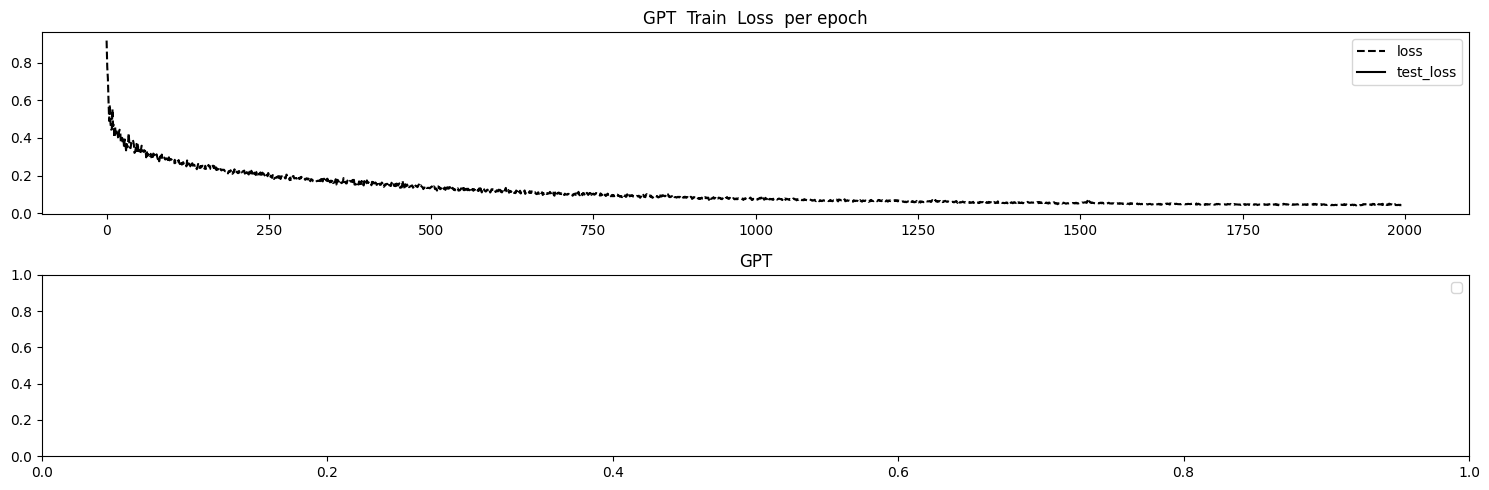

(15, 24)
(100, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

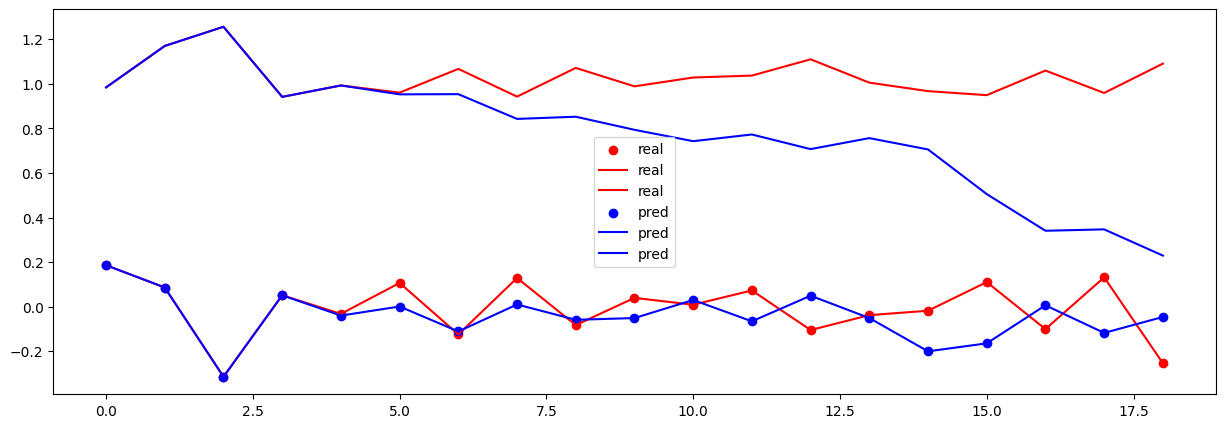

(100, 24)
119
19


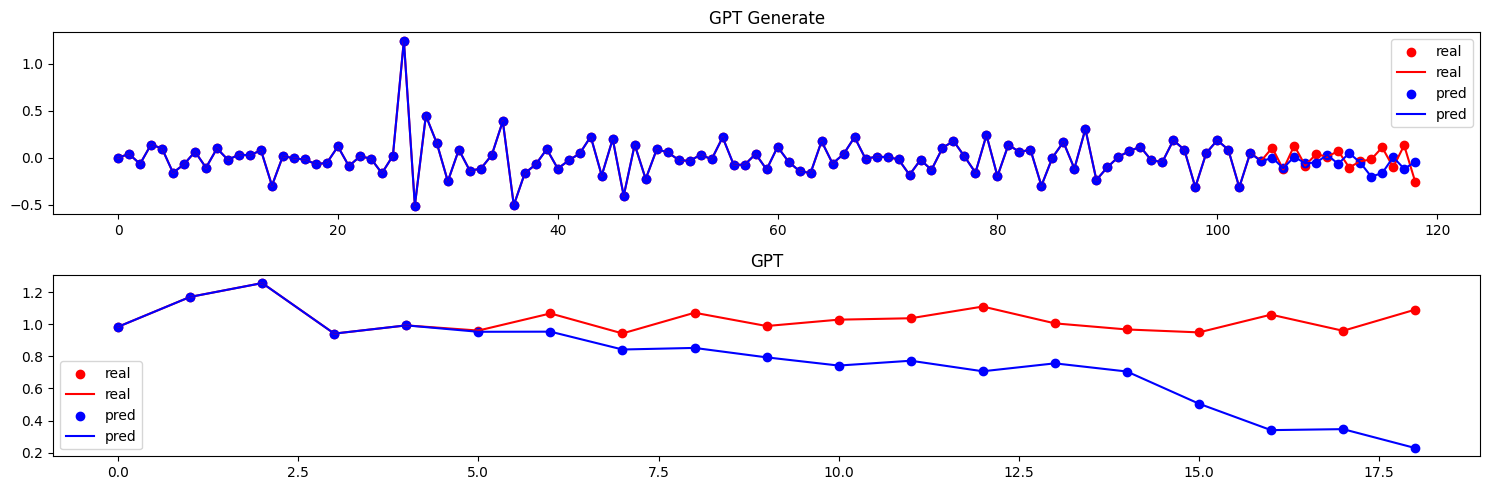

In [58]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk300to400_train )

function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )


torch.Size([200, 24])
0 train loss =  0.9037551879882812
500 train loss =  0.1831330806016922
1000 train loss =  0.11881190538406372
1500 train loss =  0.07370267063379288


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


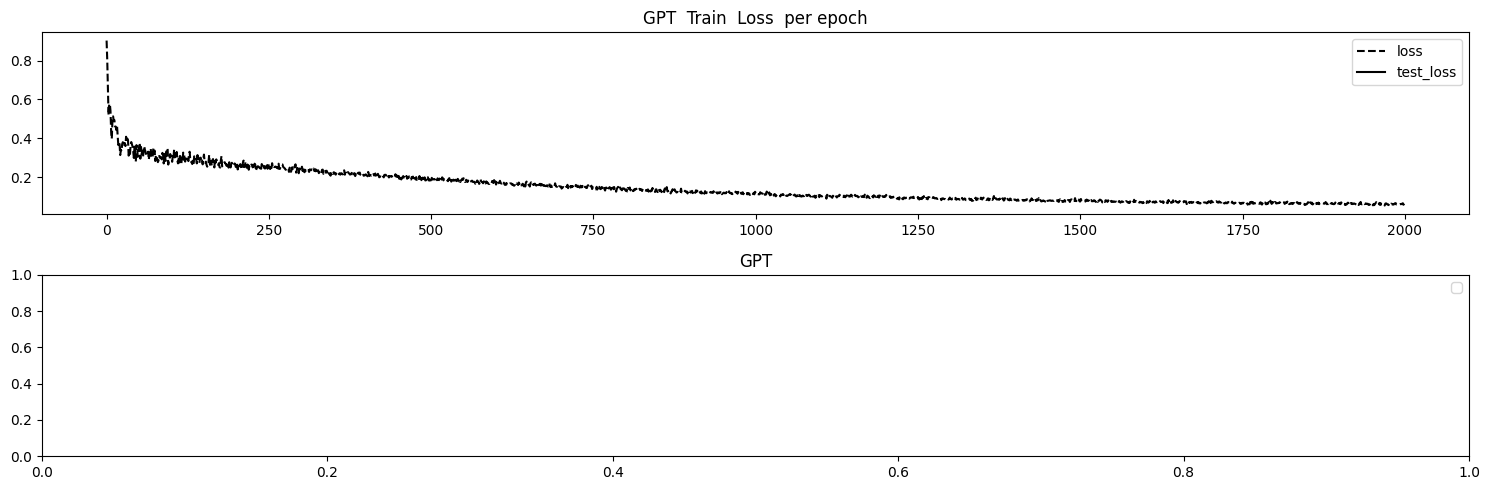

(15, 24)
(200, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

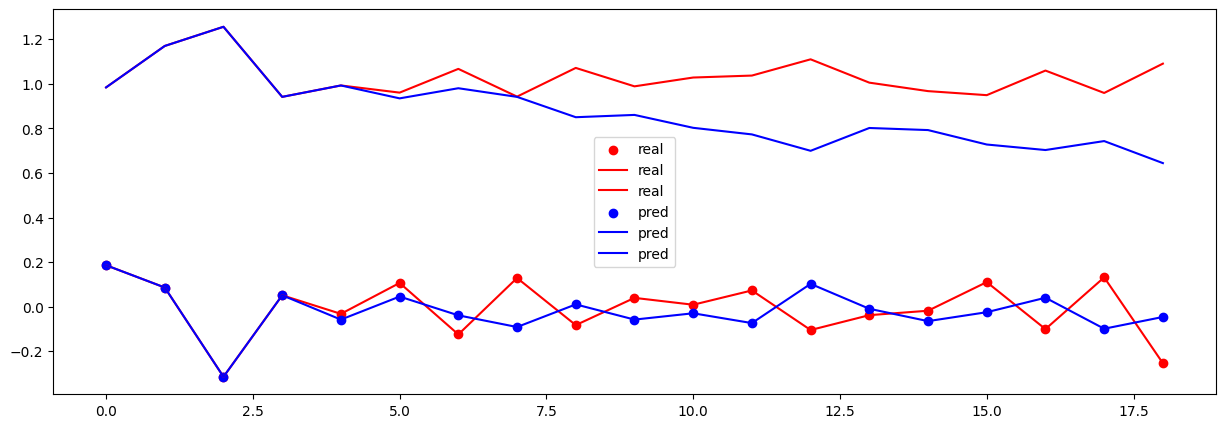

(200, 24)
219
19


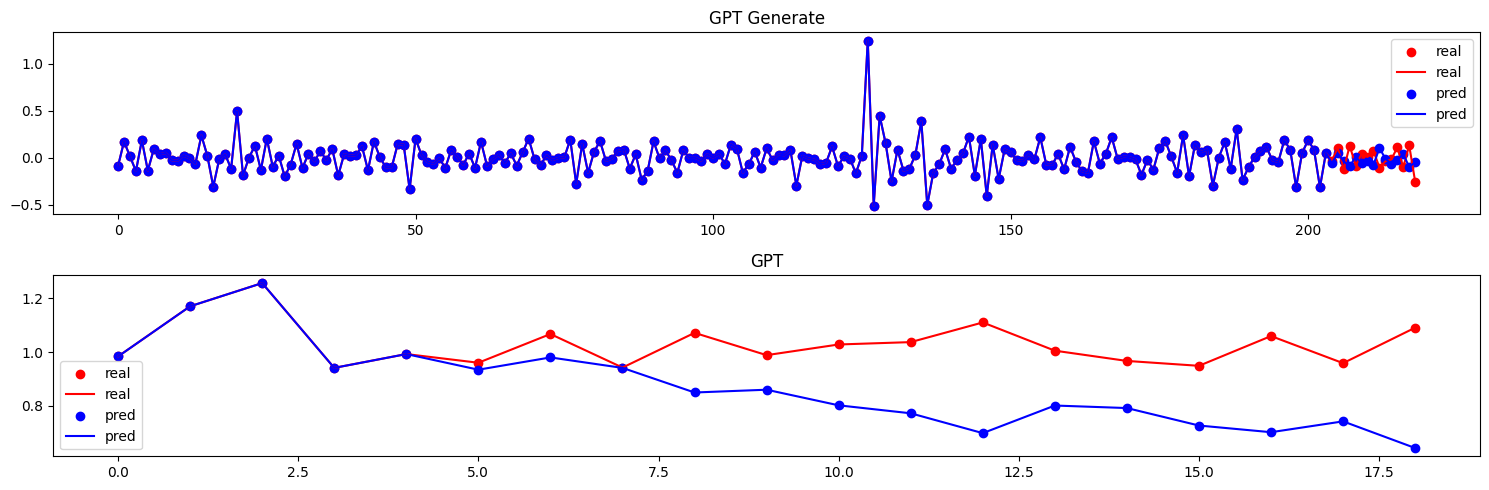

In [59]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk200to400_train )

function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )


(15, 24)
(200, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

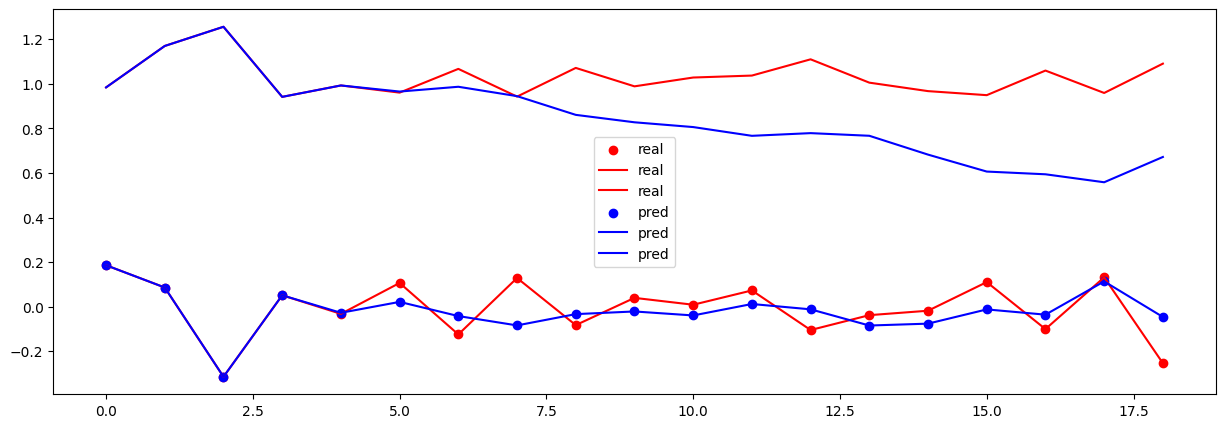

(200, 24)
219
19


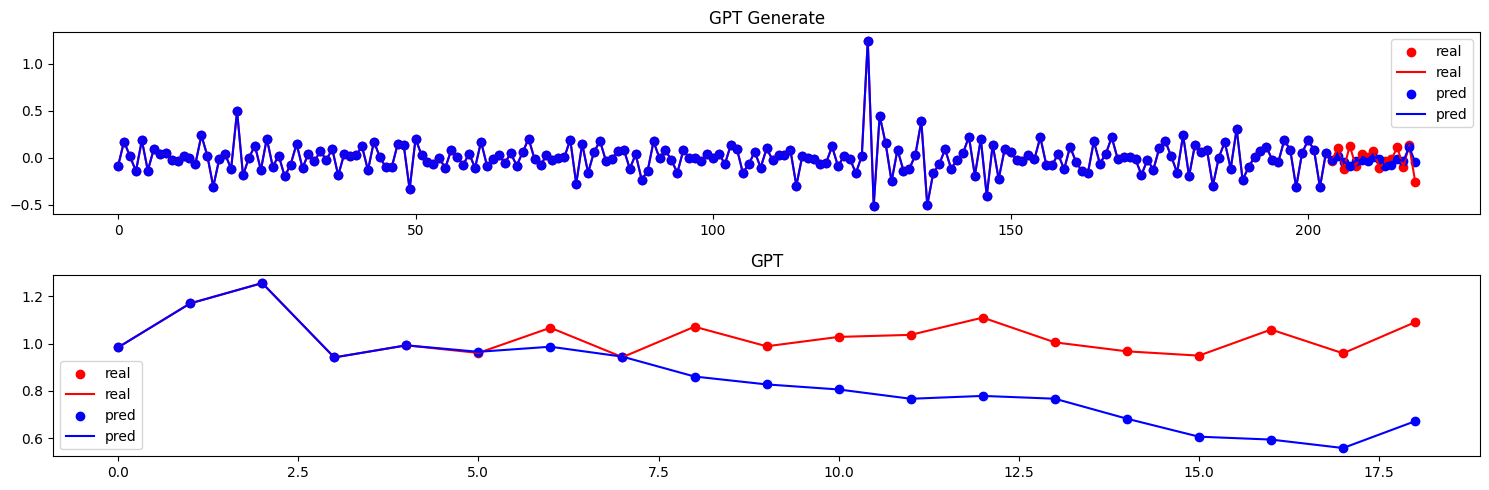

In [60]:

function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )


torch.Size([300, 24])
0 train loss =  0.8360583186149597
500 train loss =  0.20411114394664764
1000 train loss =  0.15058337152004242
1500 train loss =  0.09815595299005508


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


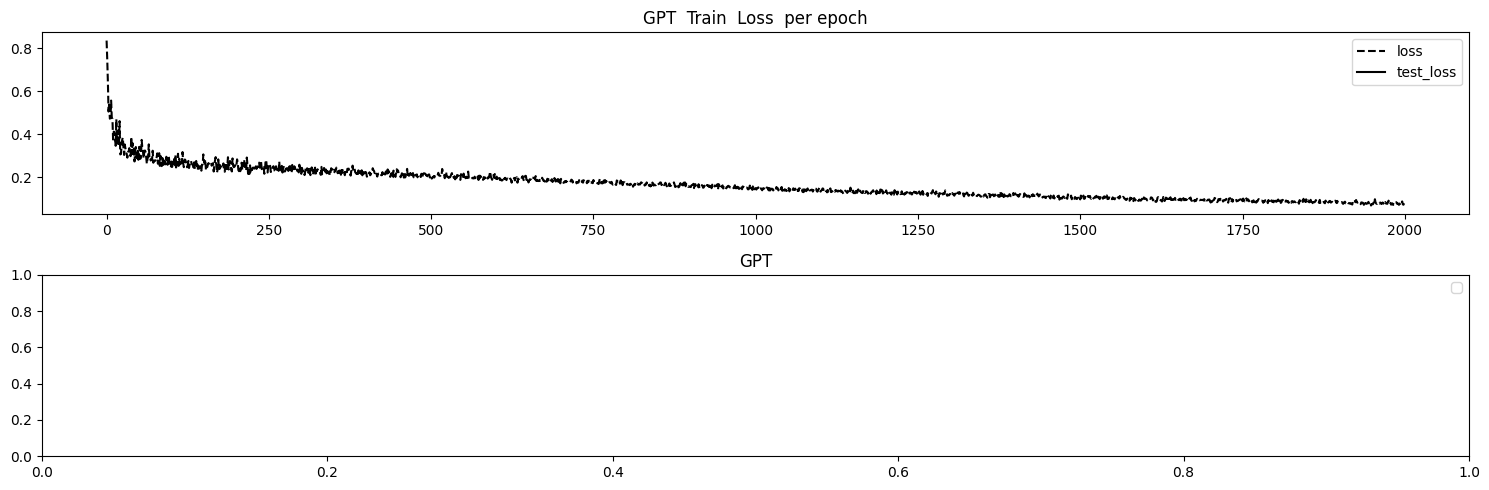

(15, 24)
(300, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

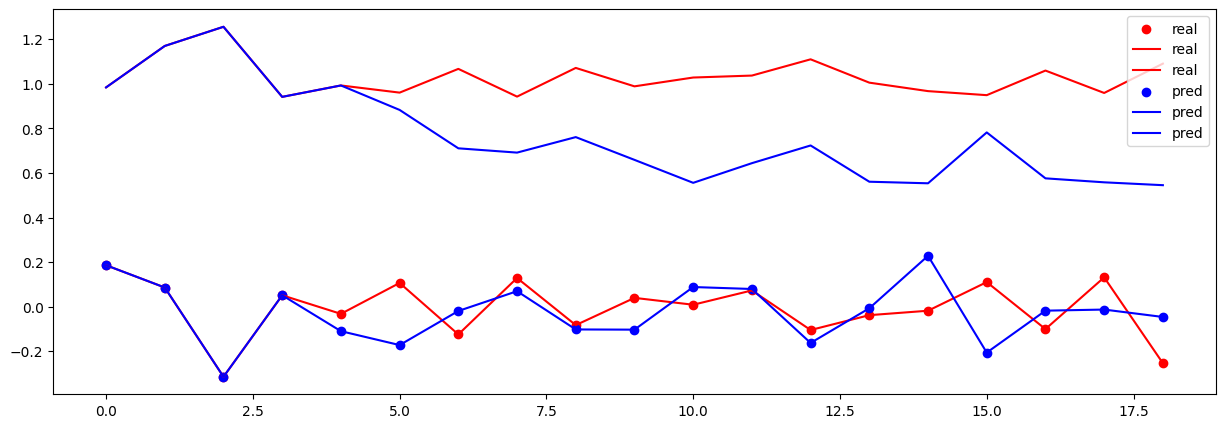

(300, 24)
319
19


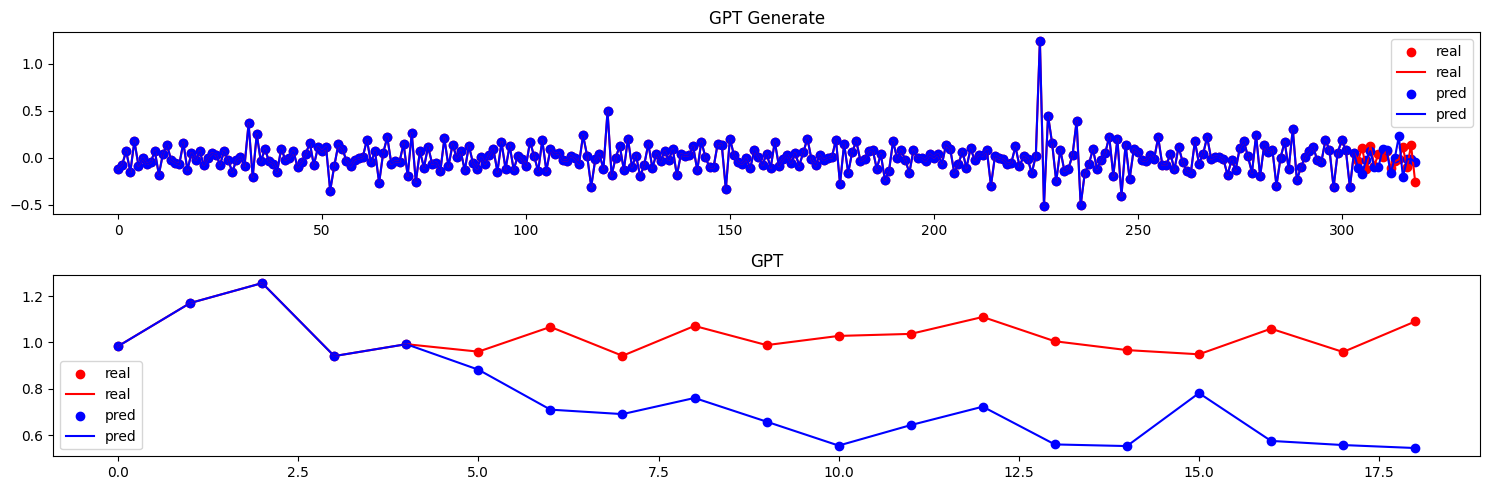

In [61]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk100to400_train  )

function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )


torch.Size([400, 24])
0 train loss =  0.8841000199317932
500 train loss =  0.23854389786720276
1000 train loss =  0.17988300323486328
1500 train loss =  0.13113127648830414


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


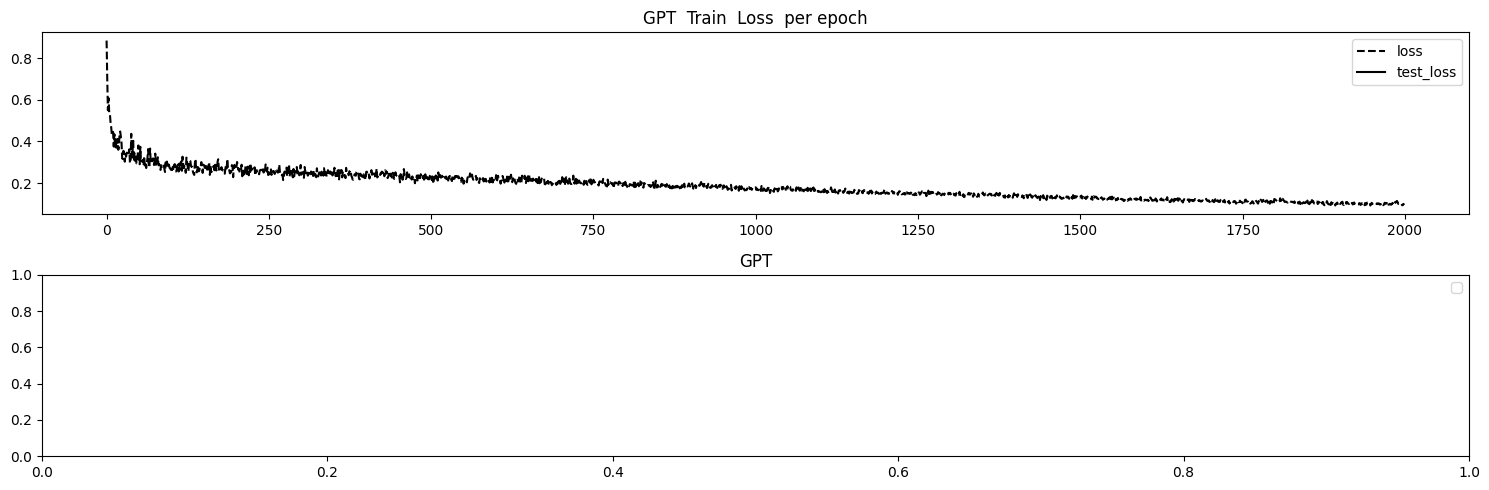

(15, 24)
(400, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

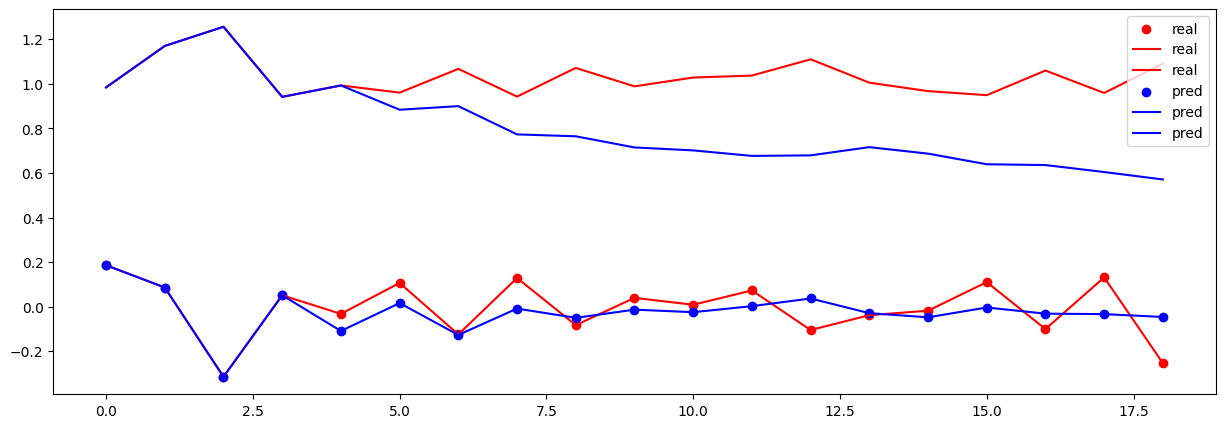

(400, 24)
419
19


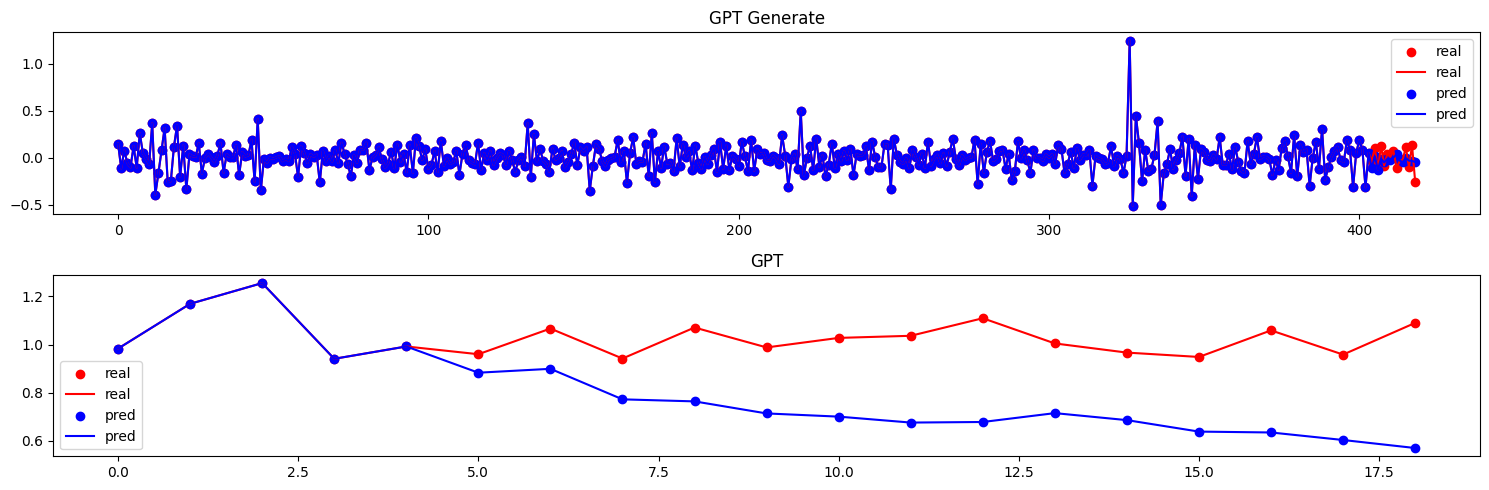

In [62]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk000to400_train )

function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )



## Run 2


In [63]:

the_range = training_chunk + block_size

index_to_slice = random.randrange(0, length_n - the_range)

index_to_slice

print( for_RNN_data_CIVS.shape[0] )
print( index_to_slice )
print( index_to_slice + the_range )

sliced_chunk_CIVS = for_RNN_data_CIVS[ index_to_slice : index_to_slice + the_range]

n = block_size

print( n )

train_CIVS       = sliced_chunk_CIVS[   : -n ] 
test_CIVS        = sliced_chunk_CIVS[ -n:   ]

chunk300to400_train = train_CIVS[ 300  :  ] 
chunk200to400_train = train_CIVS[ 200  :  ]  
chunk100to400_train = train_CIVS[ 100  :  ] 
chunk000to400_train = train_CIVS[      :  ]  


print( chunk300to400_train.shape )
print( chunk200to400_train.shape )
print( chunk100to400_train.shape )
print( chunk000to400_train.shape )





1383
237
652
15
(100, 24)
(200, 24)
(300, 24)
(400, 24)


torch.Size([100, 24])
0 train loss =  0.9171473383903503
500 train loss =  0.12930309772491455
1000 train loss =  0.06977615505456924
1500 train loss =  0.04992133378982544


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


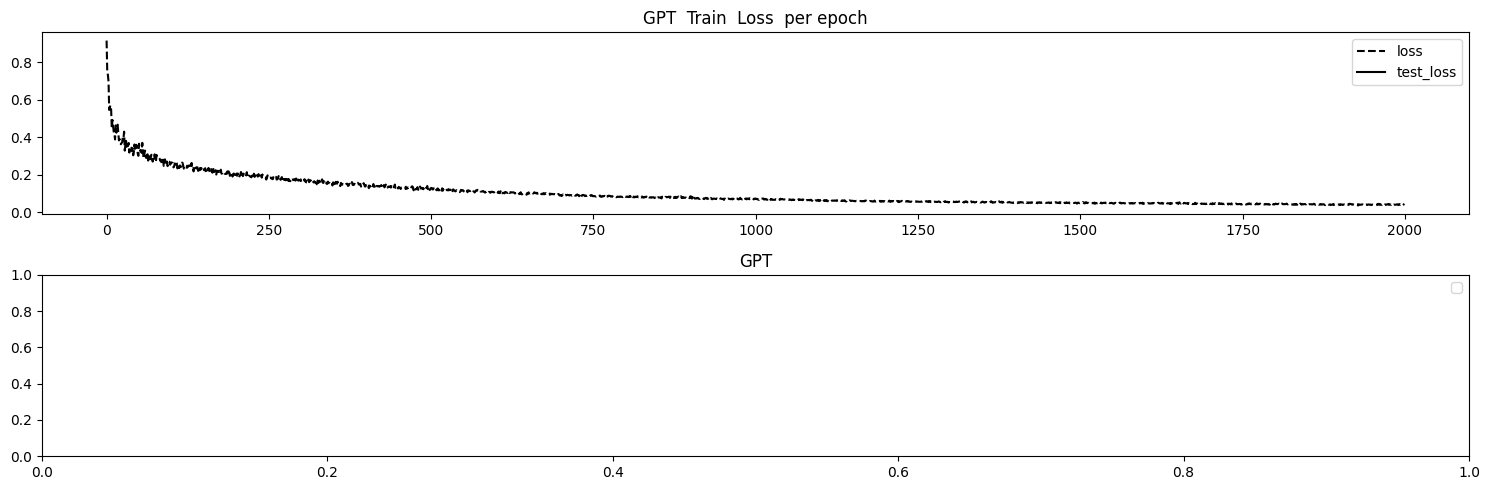

(15, 24)
(100, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

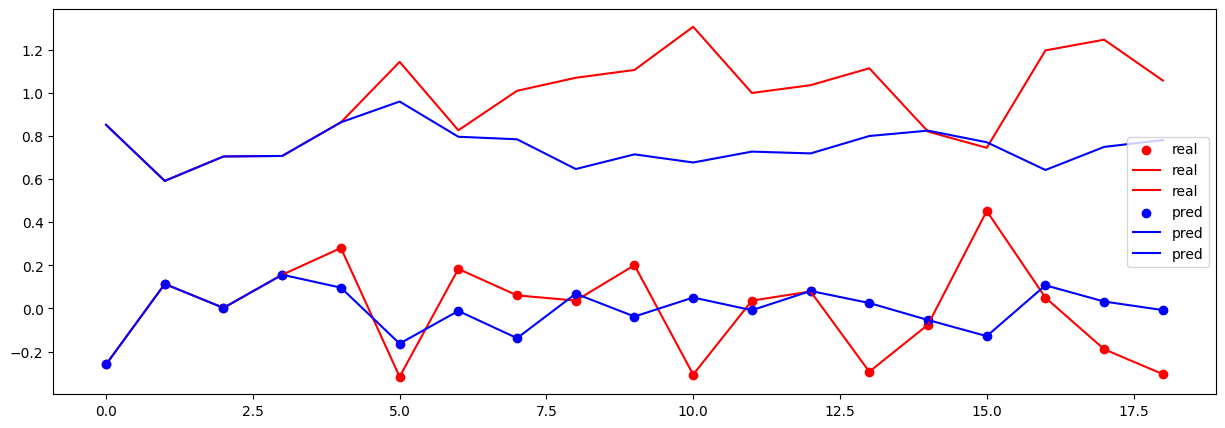

(100, 24)
119
19


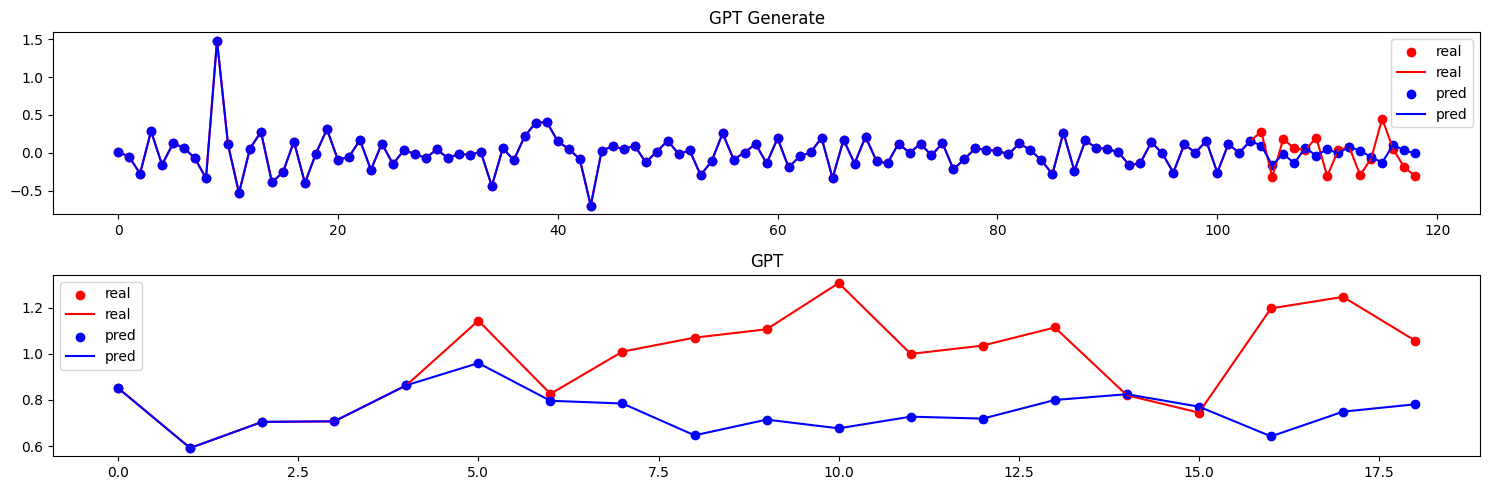

In [64]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk300to400_train )

function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )



torch.Size([200, 24])
0 train loss =  0.956770122051239
500 train loss =  0.19441458582878113
1000 train loss =  0.10609190165996552
1500 train loss =  0.07901576161384583


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


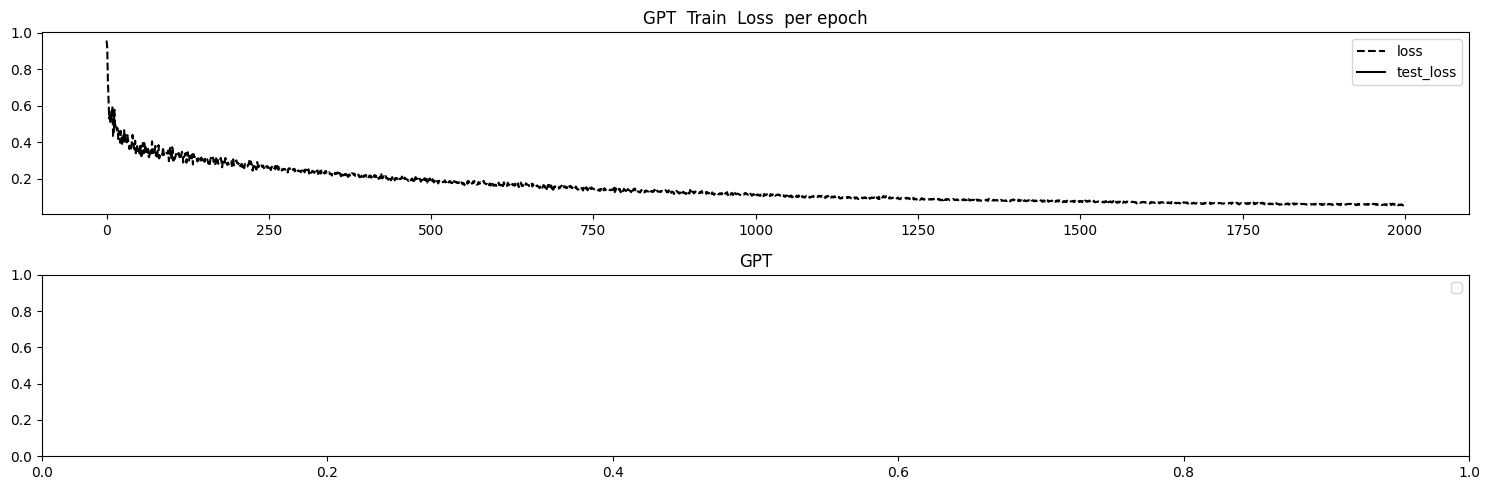

(15, 24)
(200, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

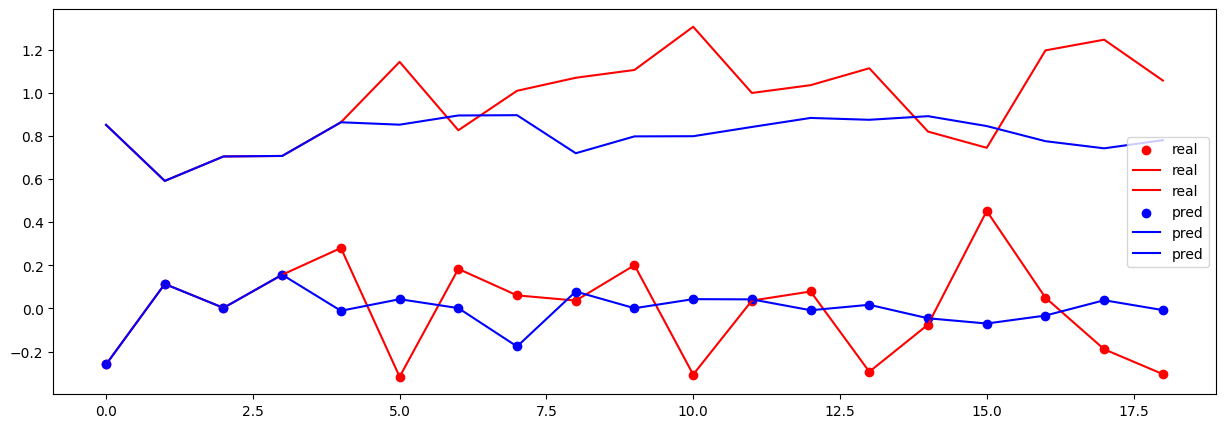

(200, 24)
219
19


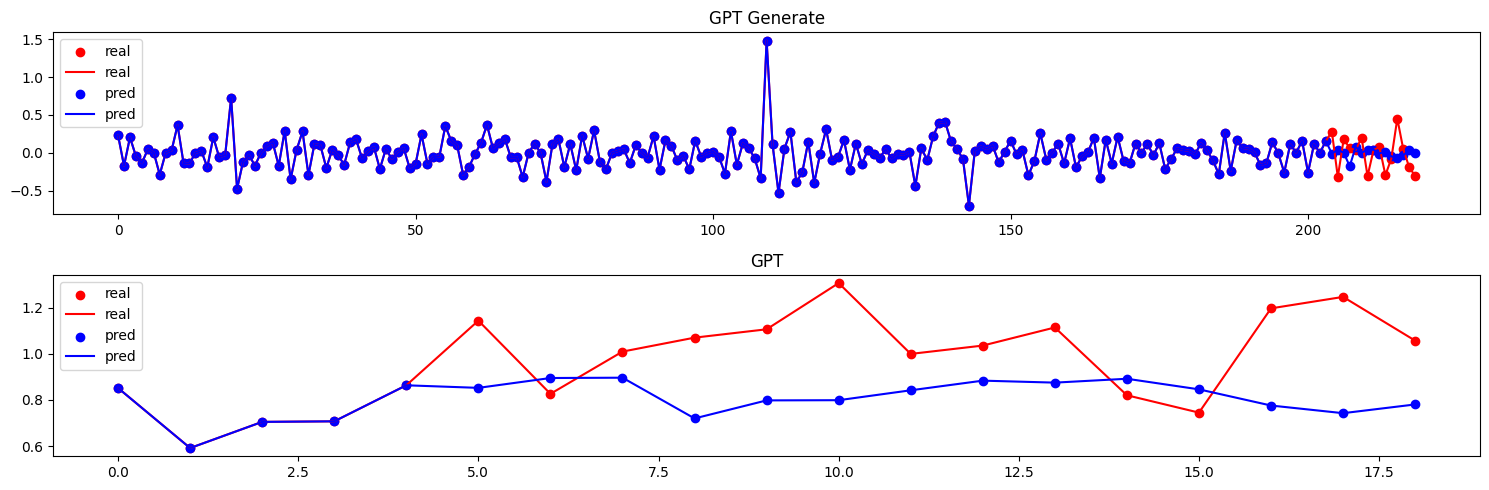

In [65]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk200to400_train )

function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )



torch.Size([300, 24])
0 train loss =  0.8667073845863342
500 train loss =  0.22054624557495117
1000 train loss =  0.14298784732818604
1500 train loss =  0.10399825125932693


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


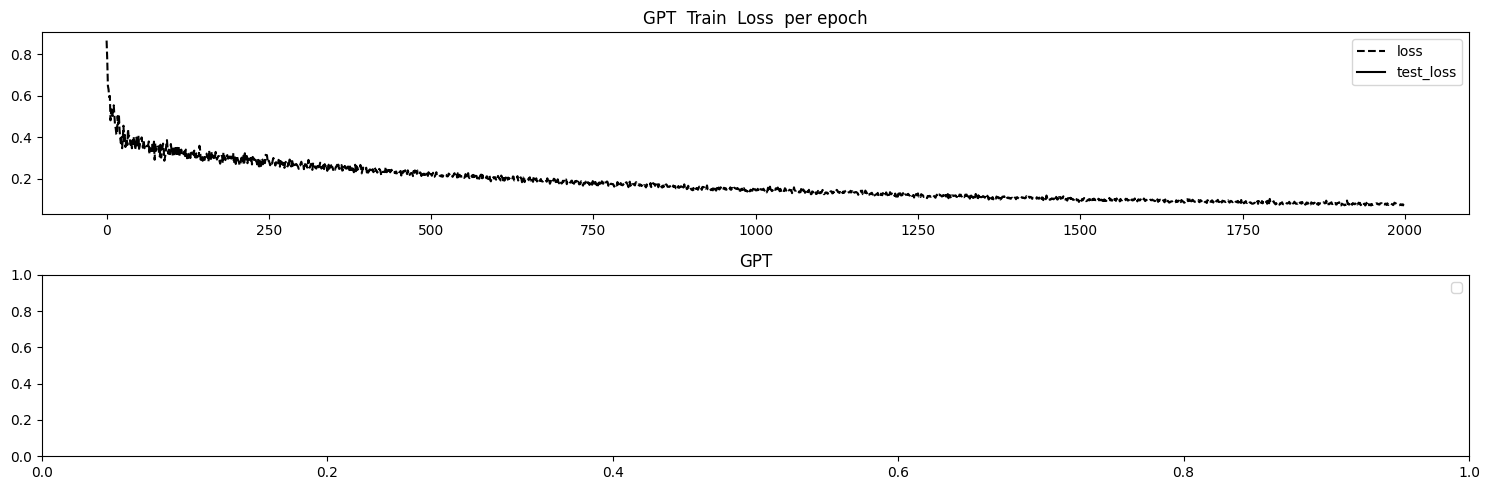

(15, 24)
(300, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

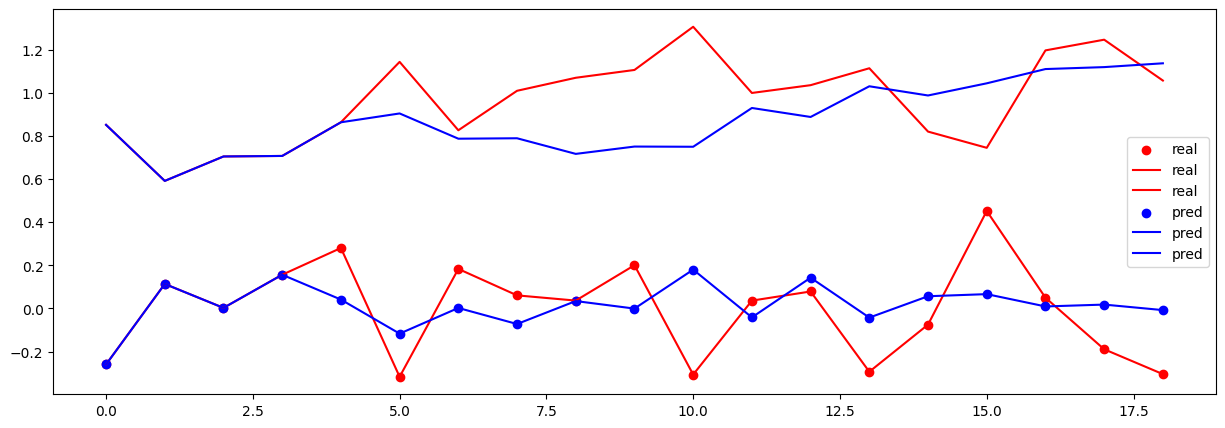

(300, 24)
319
19


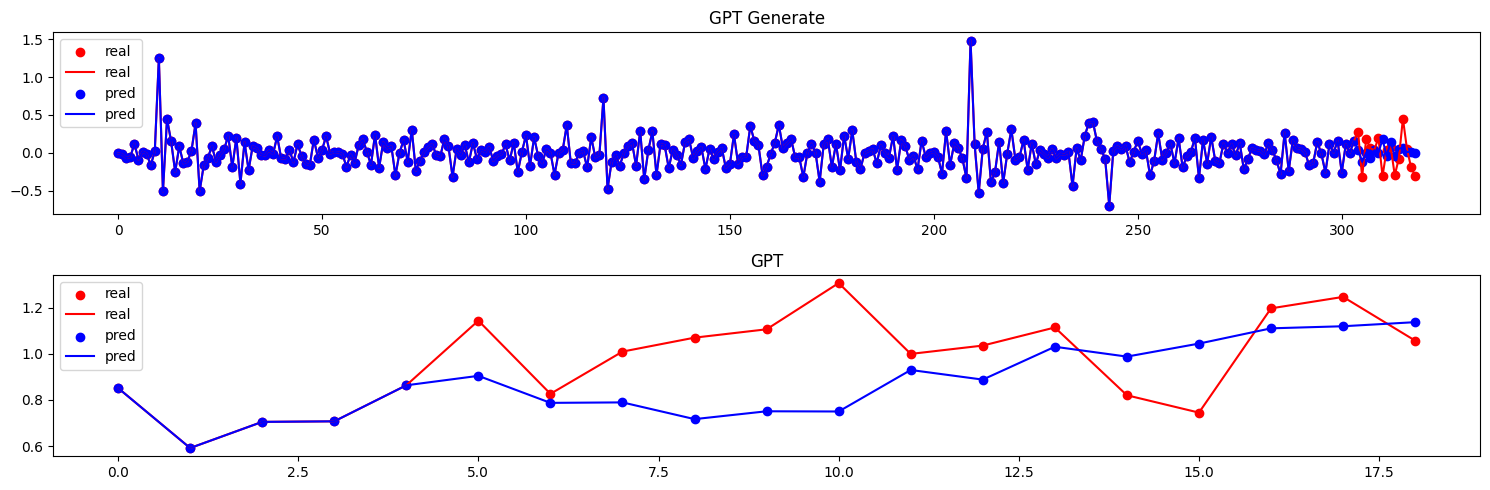

In [66]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk100to400_train  )

function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )


torch.Size([400, 24])
0 train loss =  0.8913543224334717
500 train loss =  0.25322479009628296
1000 train loss =  0.17293544113636017
1500 train loss =  0.12404707819223404


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


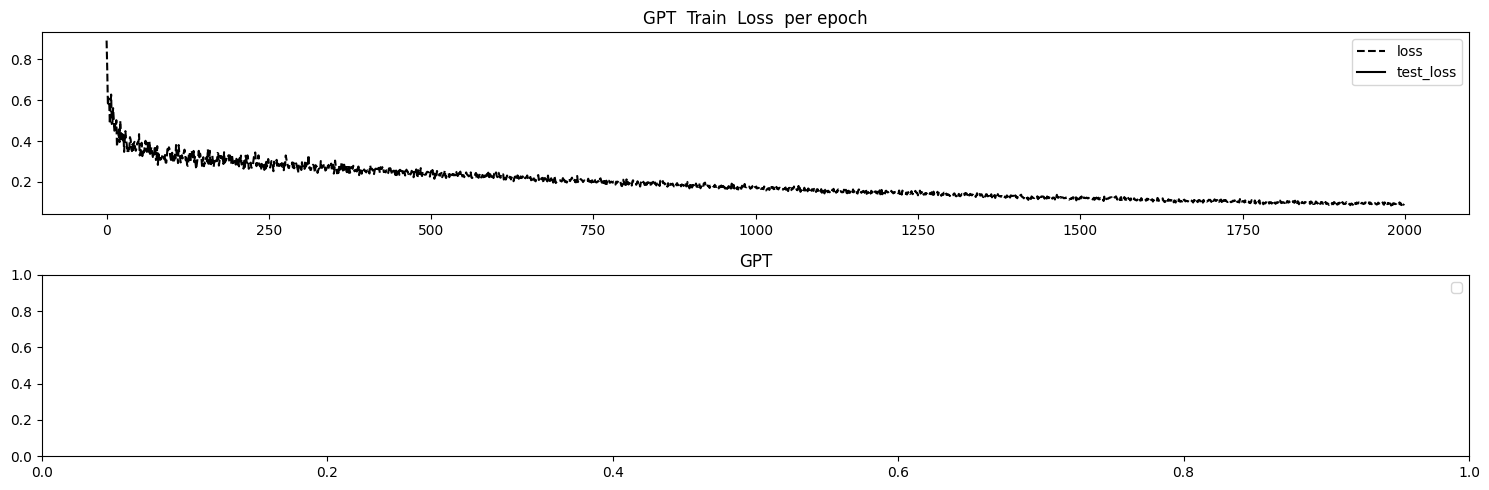

(15, 24)
(400, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

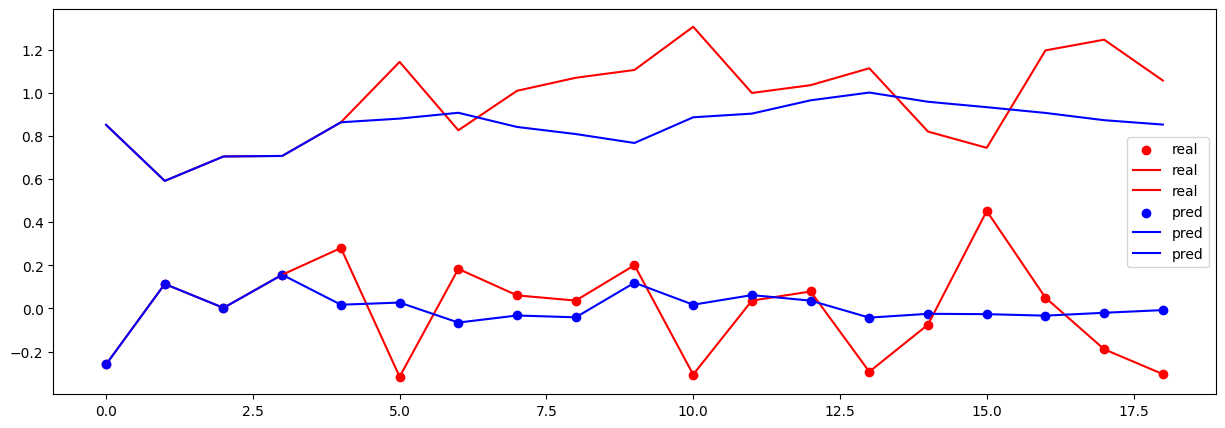

(400, 24)
419
19


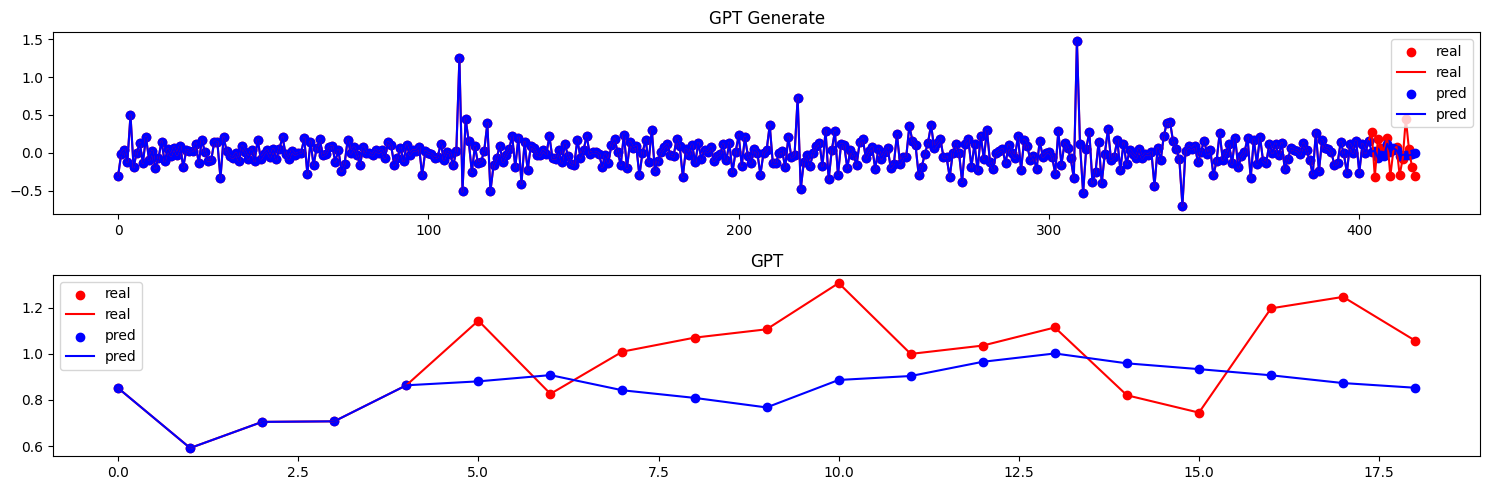

In [67]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk000to400_train )

function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )



## Run 3


In [68]:

the_range = training_chunk + block_size

index_to_slice = random.randrange(0, length_n - the_range)

index_to_slice

print( for_RNN_data_CIVS.shape[0] )
print( index_to_slice )
print( index_to_slice + the_range )

sliced_chunk_CIVS = for_RNN_data_CIVS[ index_to_slice : index_to_slice + the_range]

n = block_size

print( n )

train_CIVS       = sliced_chunk_CIVS[   : -n ] 
test_CIVS        = sliced_chunk_CIVS[ -n:   ]

chunk300to400_train = train_CIVS[ 300  :  ] 
chunk200to400_train = train_CIVS[ 200  :  ]  
chunk100to400_train = train_CIVS[ 100  :  ] 
chunk000to400_train = train_CIVS[      :  ] 


print( chunk300to400_train.shape )
print( chunk200to400_train.shape )
print( chunk100to400_train.shape )
print( chunk000to400_train.shape )



1383
431
846
15
(100, 24)
(200, 24)
(300, 24)
(400, 24)


torch.Size([100, 24])
0 train loss =  0.7725171446800232
500 train loss =  0.1175050139427185
1000 train loss =  0.06766834110021591
1500 train loss =  0.053082436323165894


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


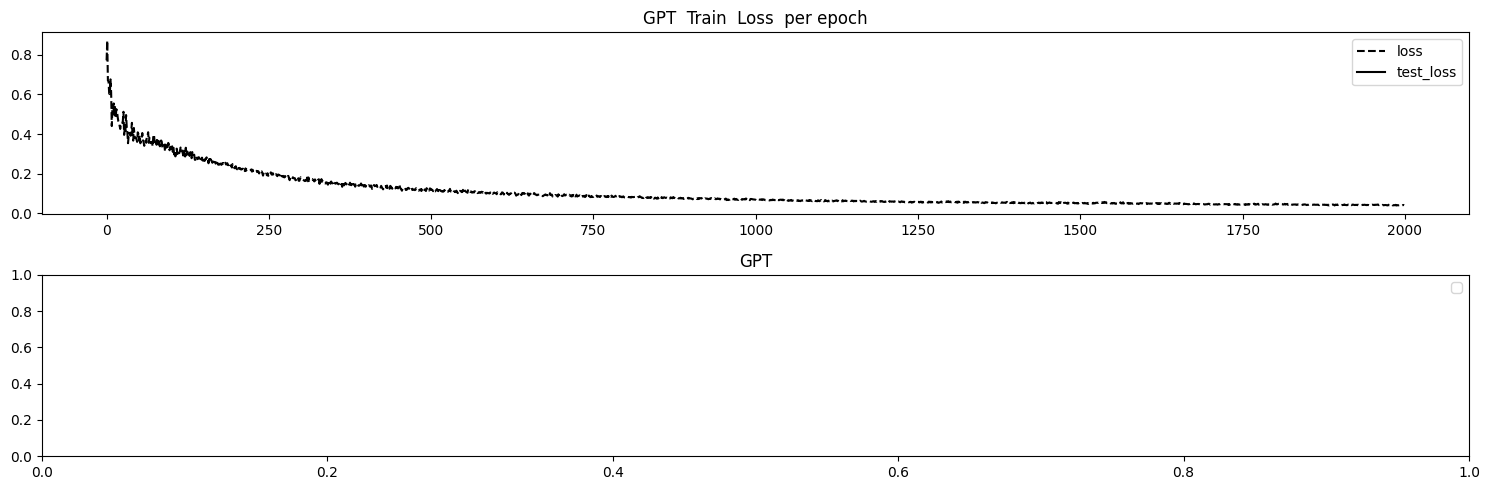

(15, 24)
(100, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

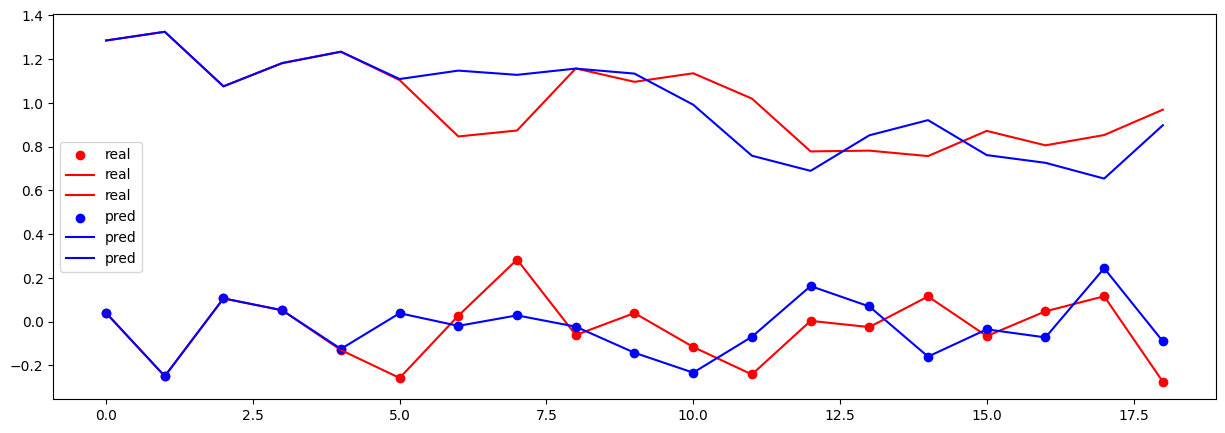

(100, 24)
119
19


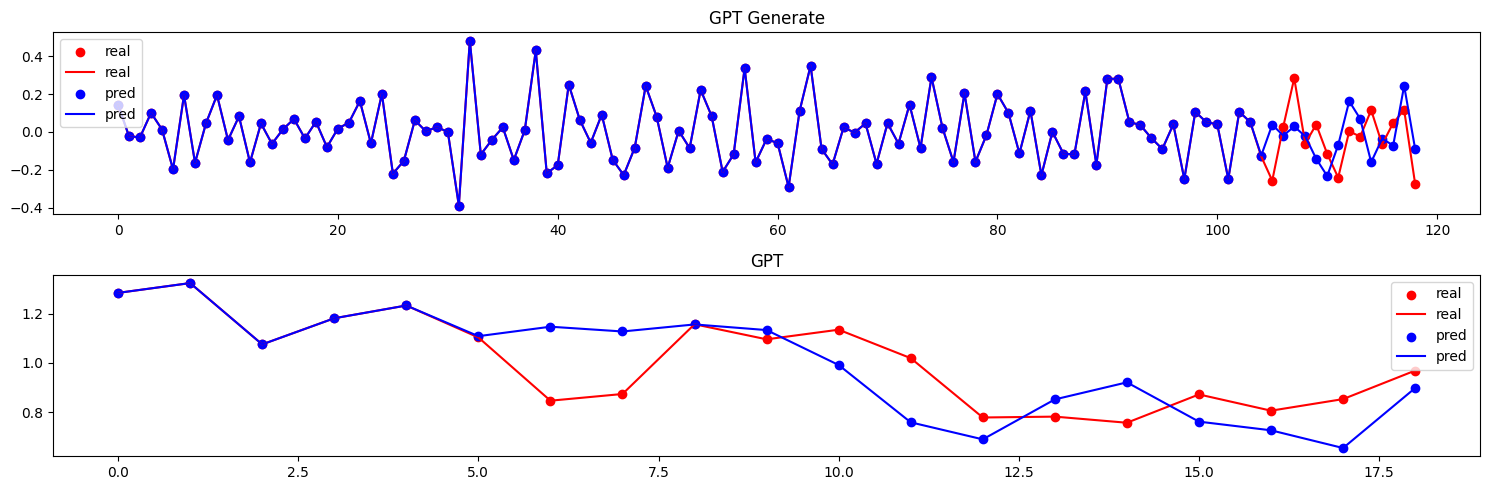

In [69]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk300to400_train )

function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )



torch.Size([200, 24])
0 train loss =  0.793867826461792
500 train loss =  0.19626681506633759
1000 train loss =  0.12222497910261154
1500 train loss =  0.07109777629375458


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


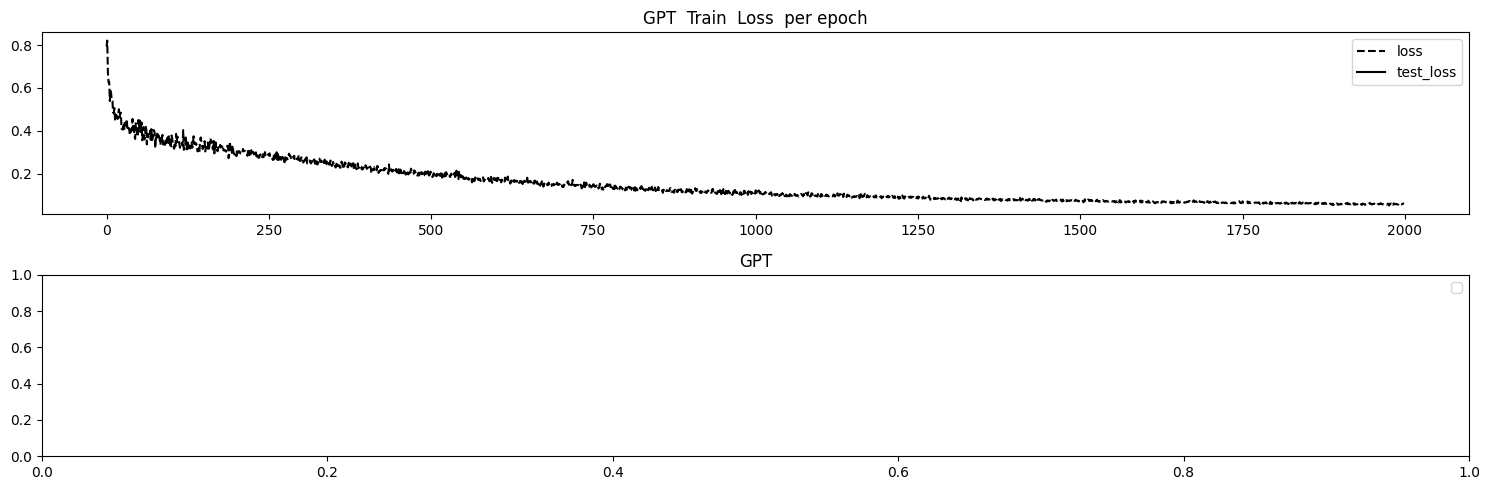

(15, 24)
(200, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

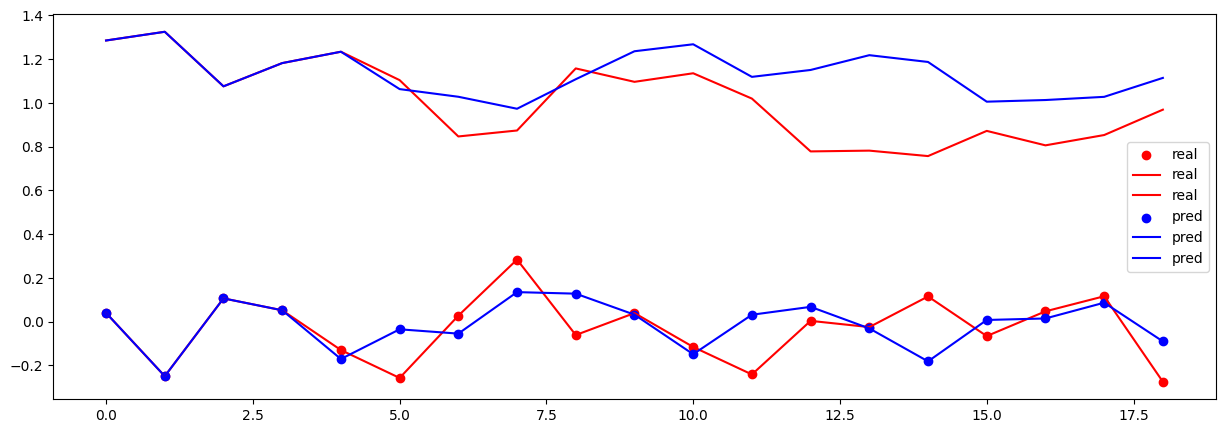

(200, 24)
219
19


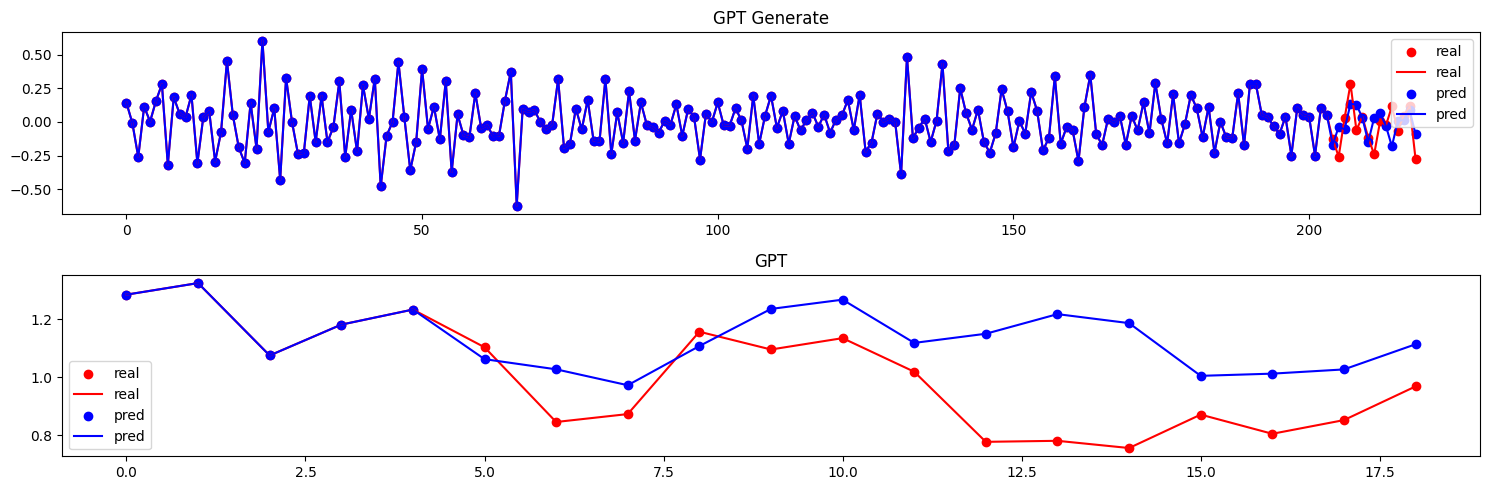

In [70]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk200to400_train )

function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )



torch.Size([300, 24])
0 train loss =  0.7522433400154114
500 train loss =  0.2404615879058838
1000 train loss =  0.156049907207489
1500 train loss =  0.09964852035045624


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


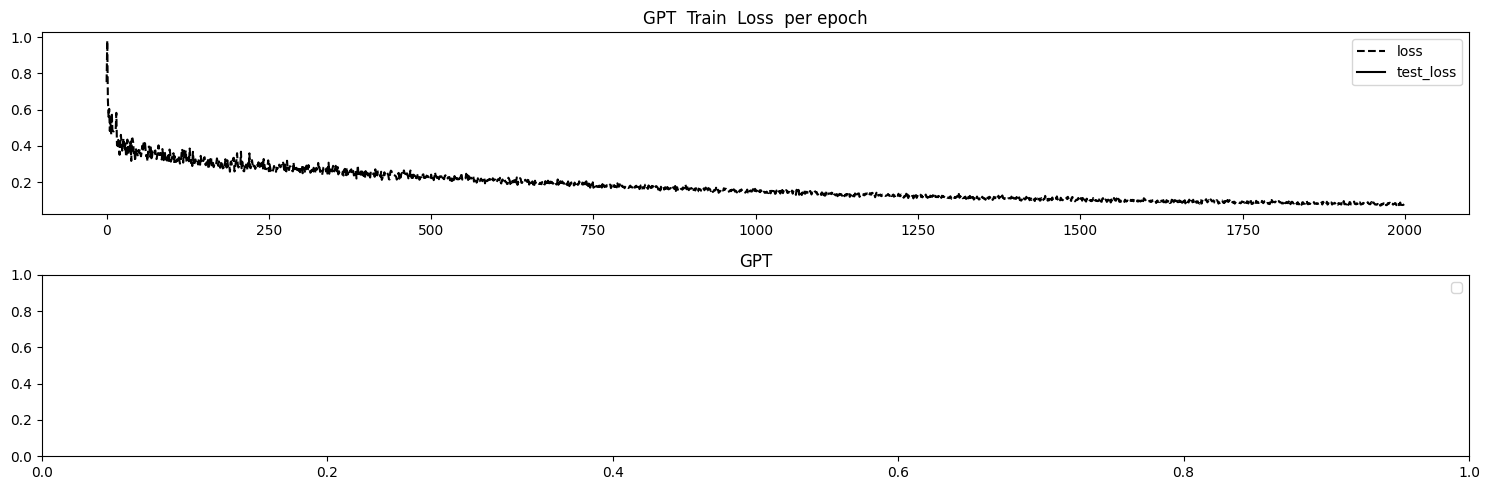

(15, 24)
(300, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

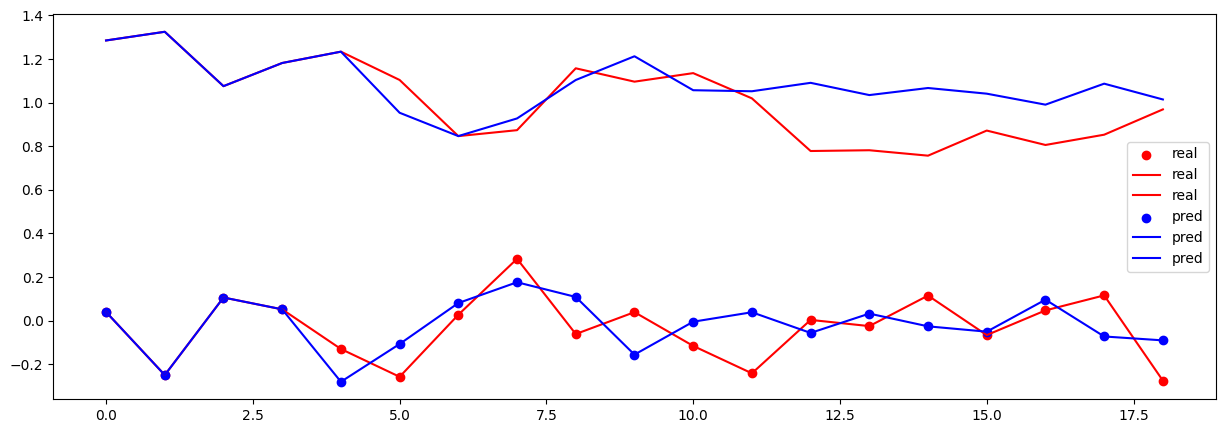

(300, 24)
319
19


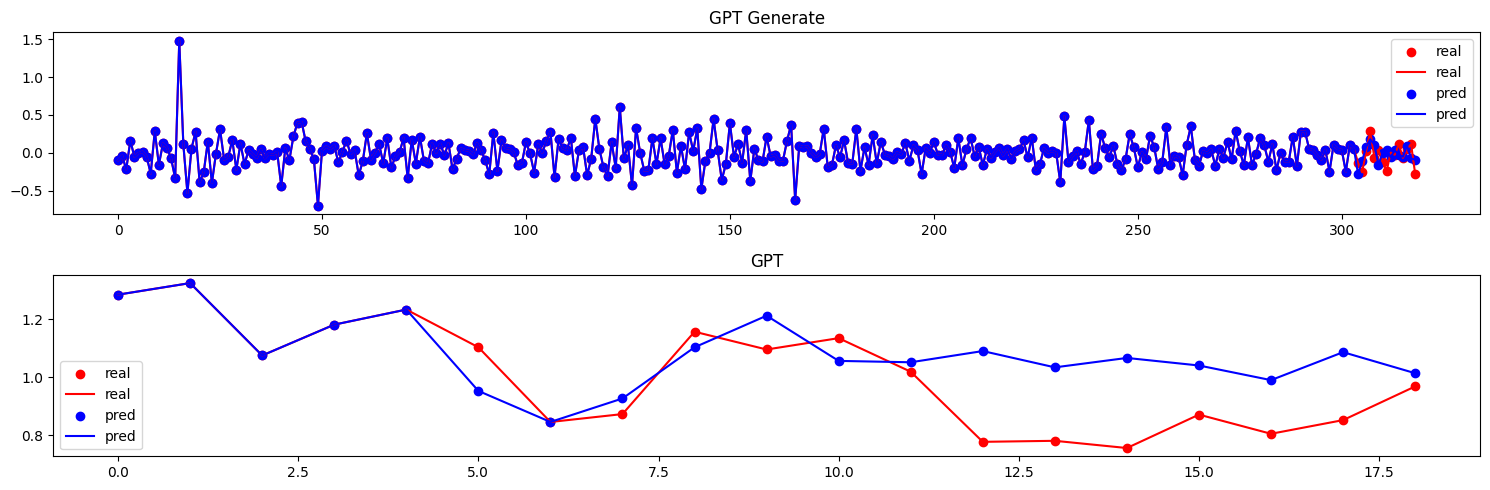

In [71]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk100to400_train  )

function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )


torch.Size([400, 24])
0 train loss =  0.8134470582008362
500 train loss =  0.24814385175704956
1000 train loss =  0.1746828407049179
1500 train loss =  0.11491373926401138


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


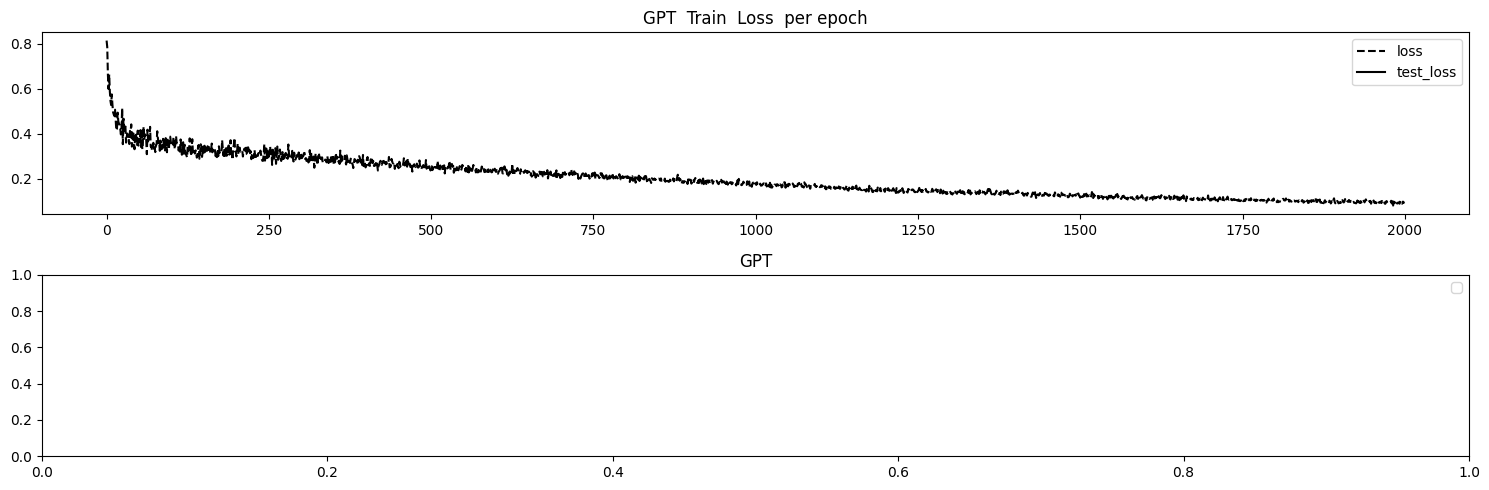

(15, 24)
(400, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

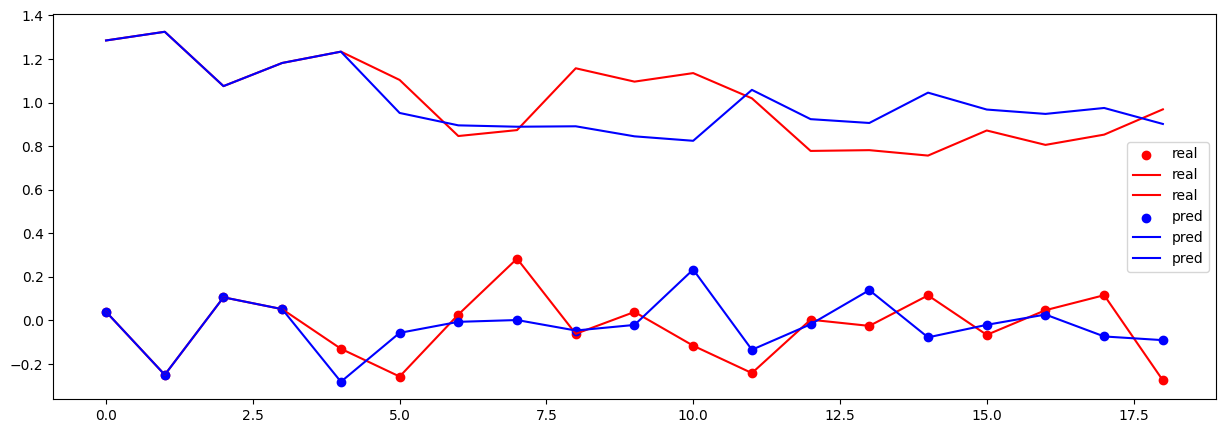

(400, 24)
419
19


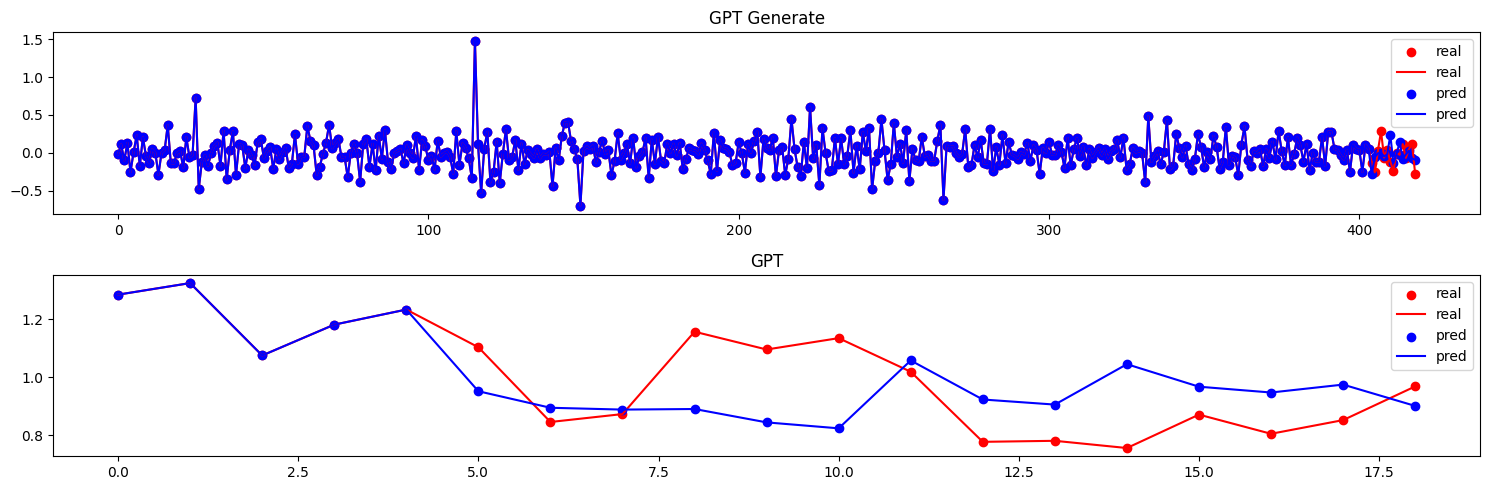

In [72]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk000to400_train )

function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )



## Run 4


In [73]:

the_range = training_chunk + block_size

index_to_slice = random.randrange(0, length_n - the_range)

index_to_slice

print( for_RNN_data_CIVS.shape[0] )
print( index_to_slice )
print( index_to_slice + the_range )

sliced_chunk_CIVS = for_RNN_data_CIVS[ index_to_slice : index_to_slice + the_range]

n = block_size

print( n )

train_CIVS       = sliced_chunk_CIVS[   : -n ] 
test_CIVS        = sliced_chunk_CIVS[ -n:   ]

chunk300to400_train = train_CIVS[ 300  :  ] 
chunk200to400_train = train_CIVS[ 200  :  ]  
chunk100to400_train = train_CIVS[ 100  :  ] 
chunk000to400_train = train_CIVS[      :  ] 


print( chunk300to400_train.shape )
print( chunk200to400_train.shape )
print( chunk100to400_train.shape )
print( chunk000to400_train.shape )


1383
916
1331
15
(100, 24)
(200, 24)
(300, 24)
(400, 24)


torch.Size([100, 24])
0 train loss =  0.7419632077217102
500 train loss =  0.13481725752353668
1000 train loss =  0.07003091275691986
1500 train loss =  0.05004245042800903


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


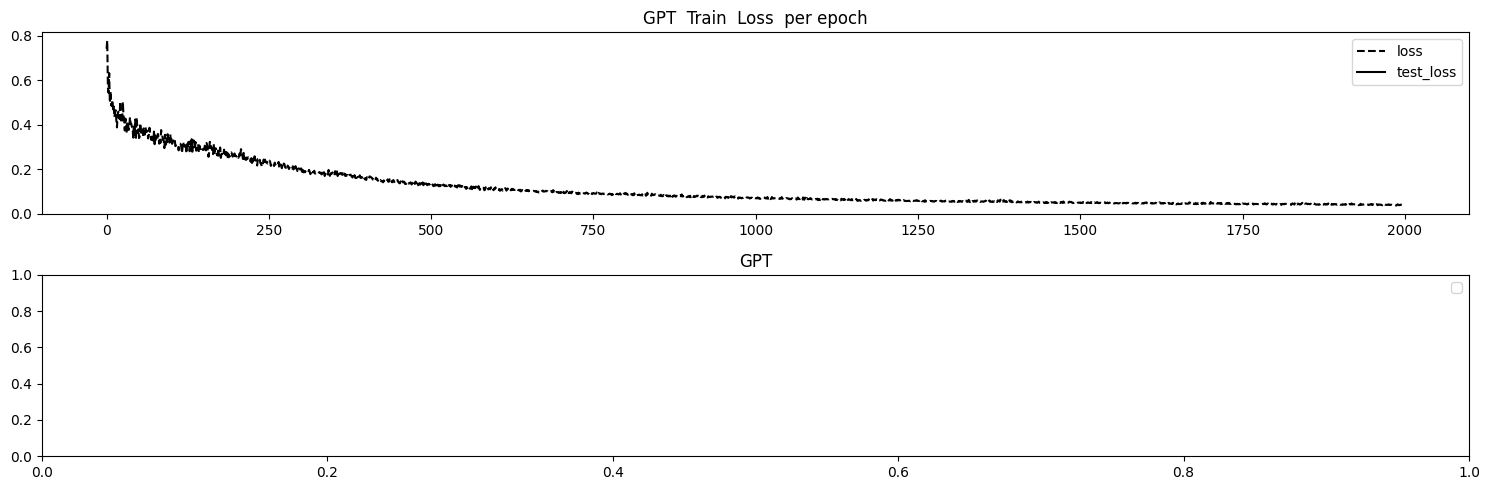

(15, 24)
(100, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

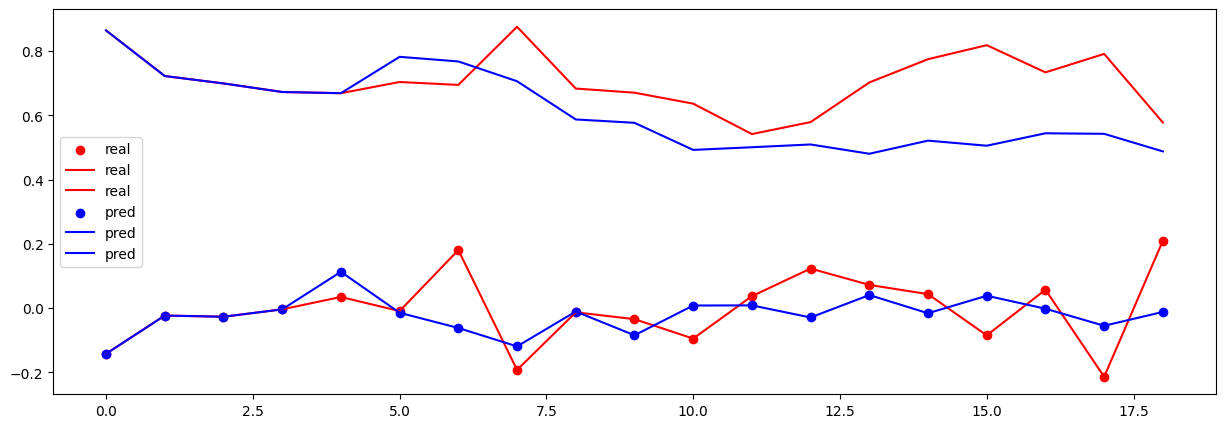

(100, 24)
119
19


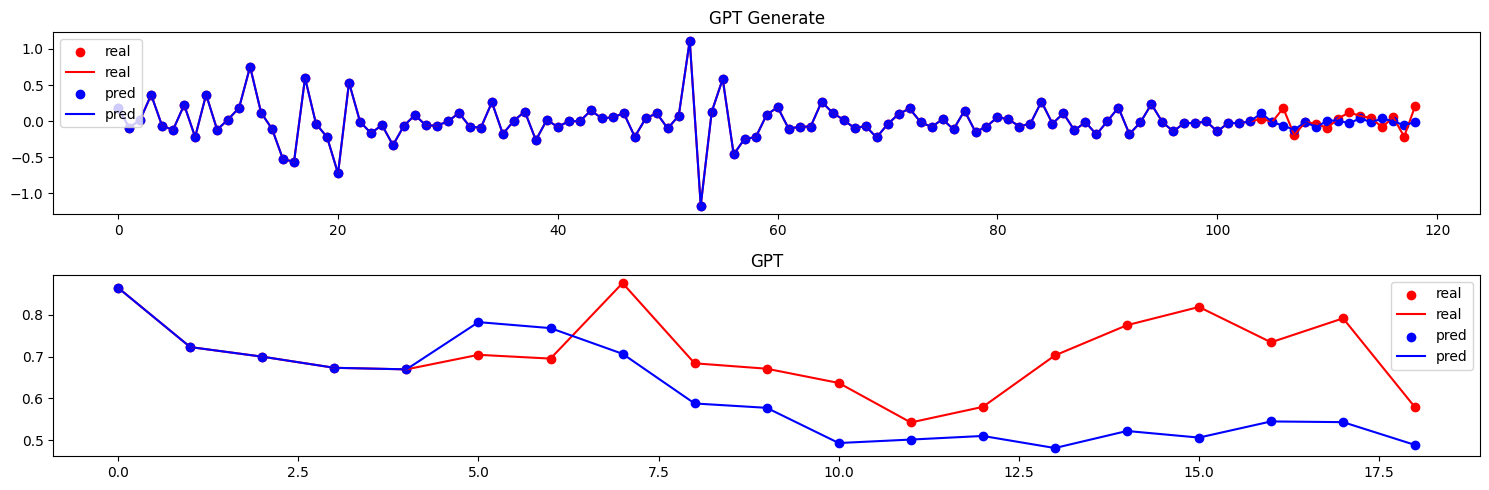

In [74]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk300to400_train )

function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )


torch.Size([200, 24])
0 train loss =  0.7685674428939819
500 train loss =  0.19312281906604767
1000 train loss =  0.10661029070615768
1500 train loss =  0.07936860620975494


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


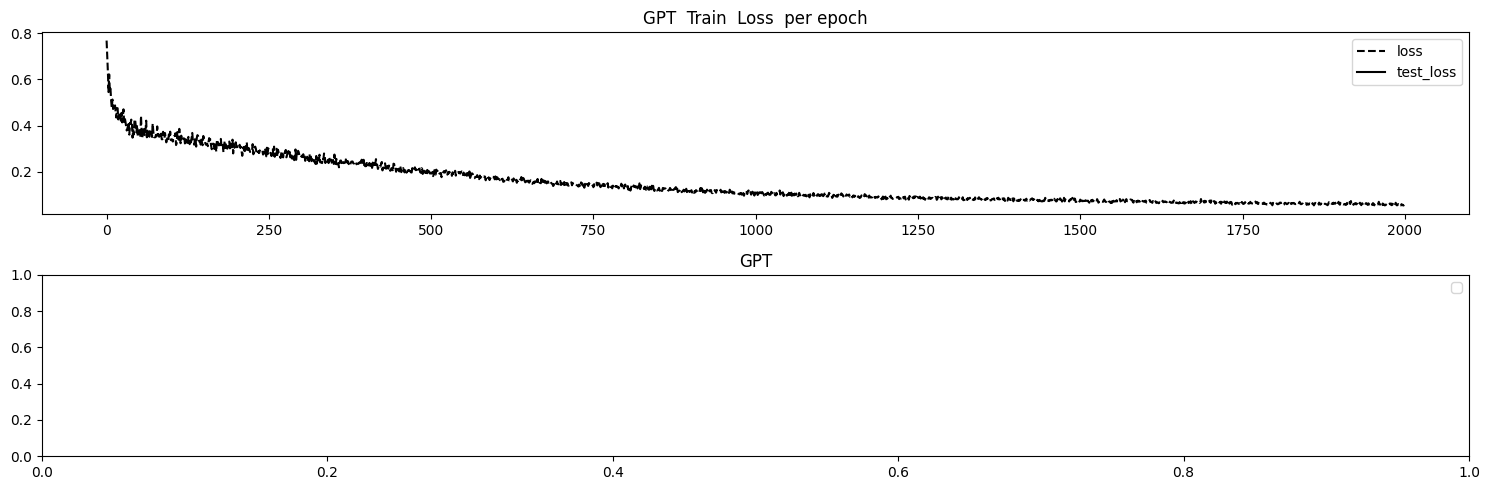

(15, 24)
(200, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

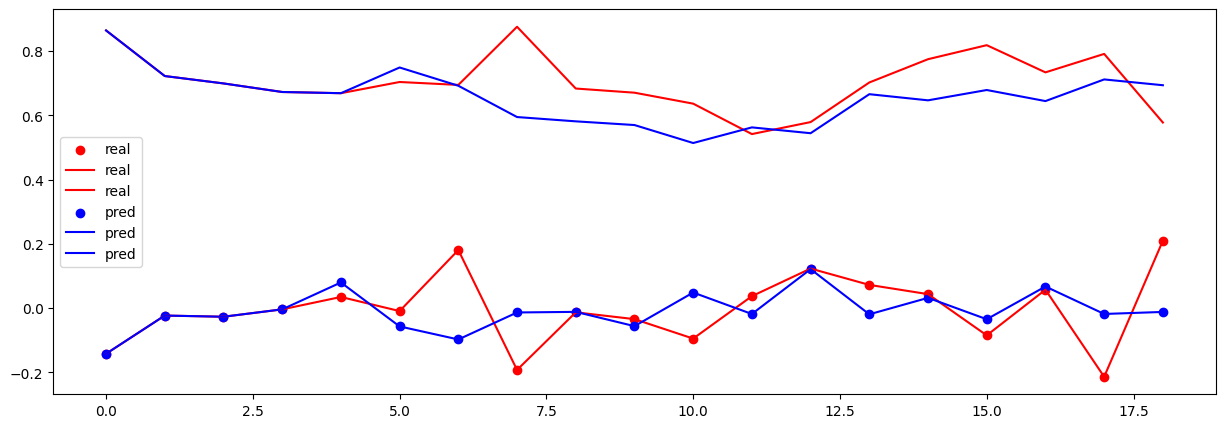

(200, 24)
219
19


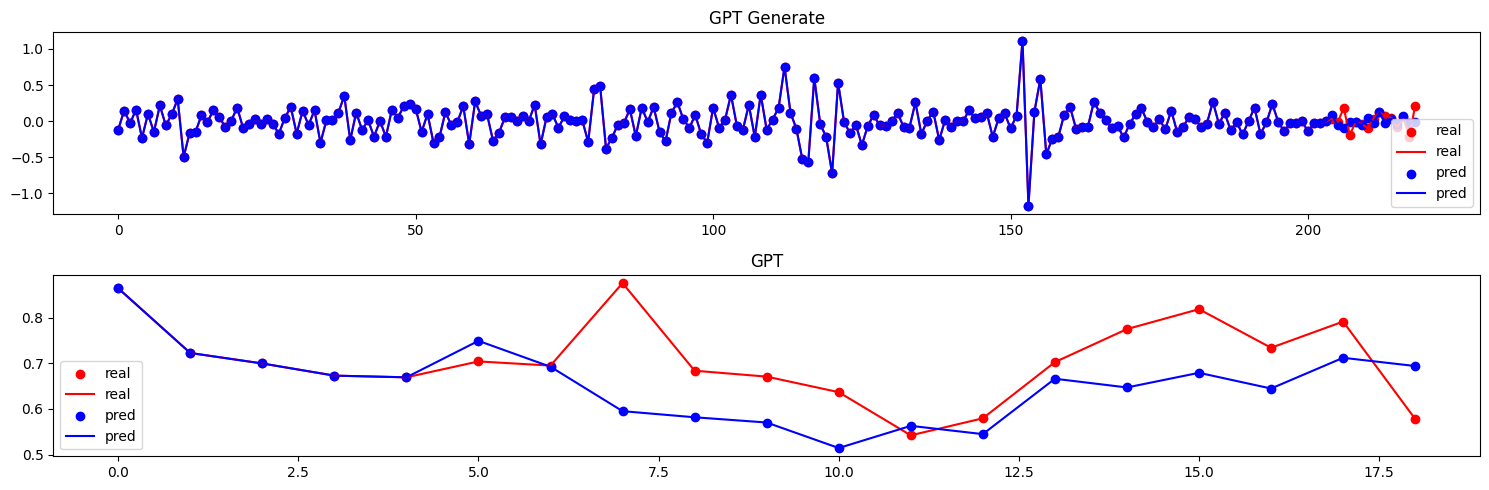

In [75]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk200to400_train )

function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )



torch.Size([300, 24])
0 train loss =  0.8165991306304932
500 train loss =  0.22895897924900055
1000 train loss =  0.15605072677135468
1500 train loss =  0.09446040540933609


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


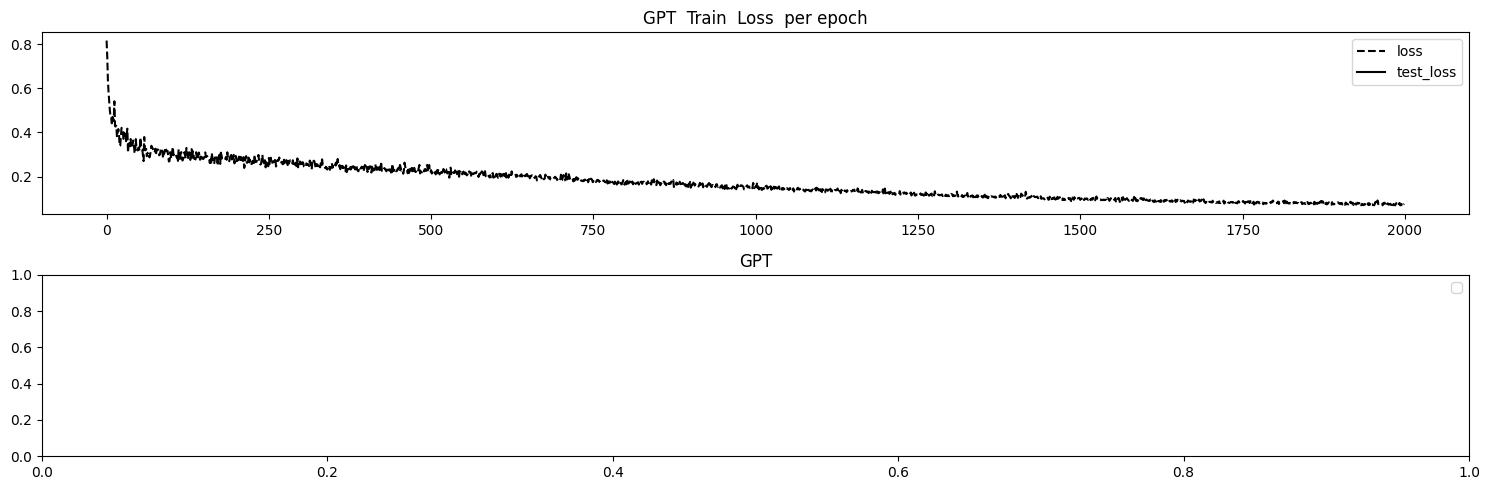

(15, 24)
(300, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

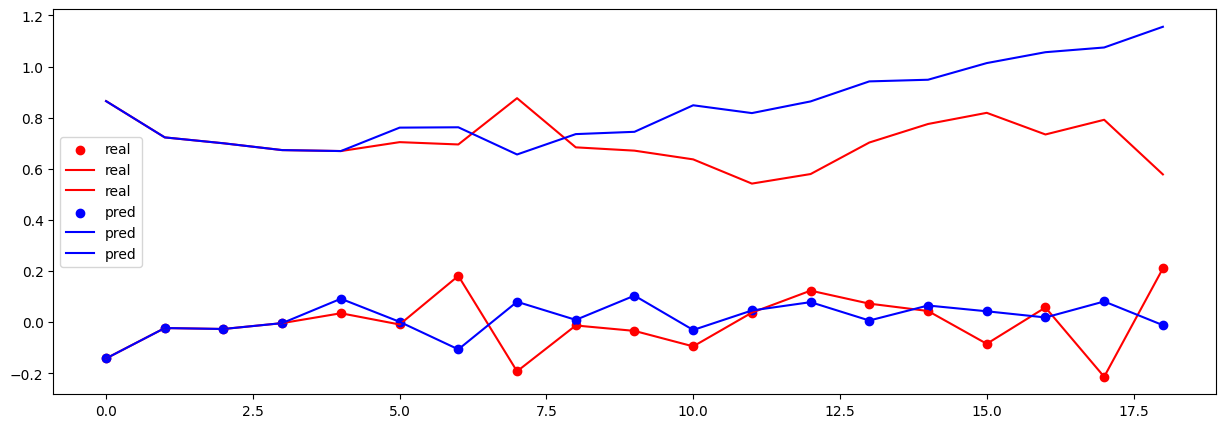

(300, 24)
319
19


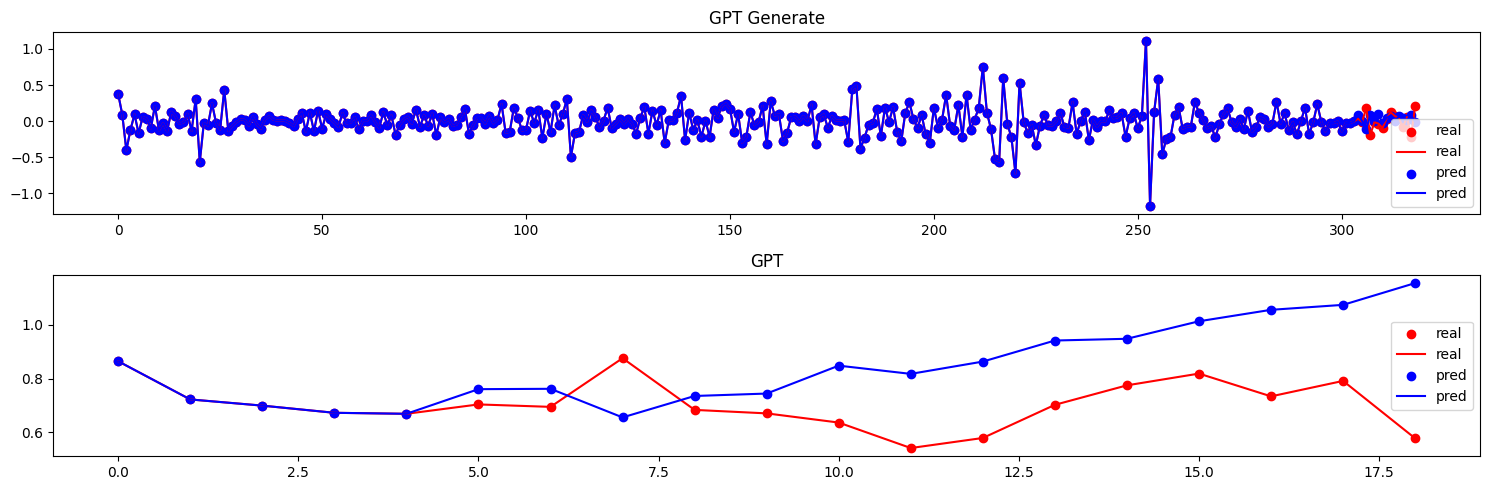

In [76]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk100to400_train  )

function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )



torch.Size([400, 24])
0 train loss =  0.7887866497039795
500 train loss =  0.2392236292362213
1000 train loss =  0.1801673322916031
1500 train loss =  0.1297641098499298


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


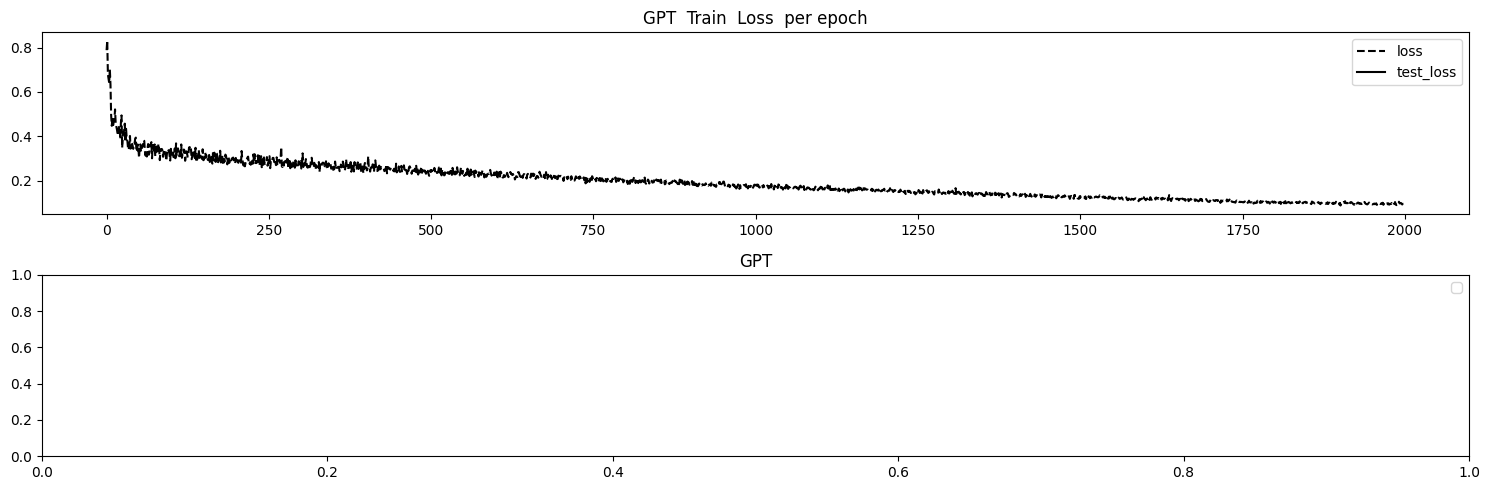

(15, 24)
(400, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

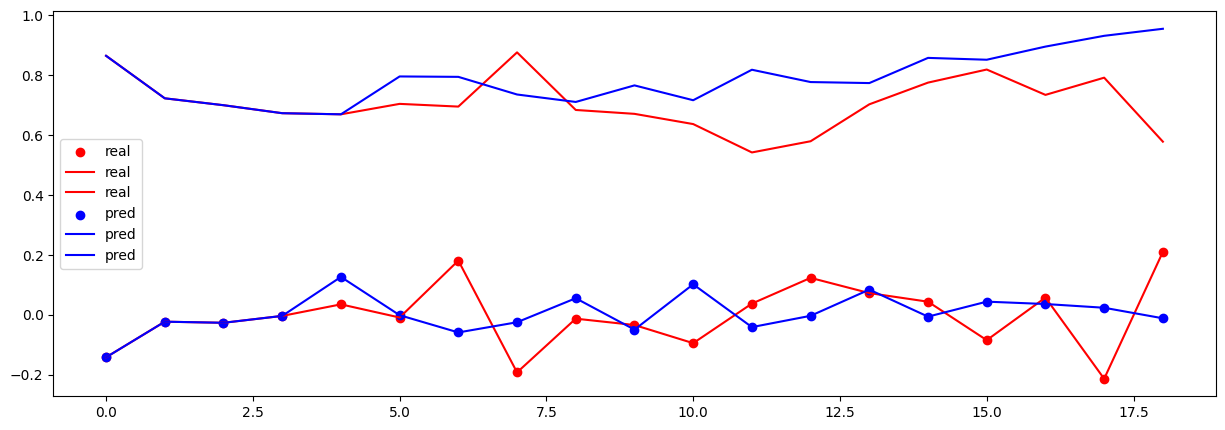

(400, 24)
419
19


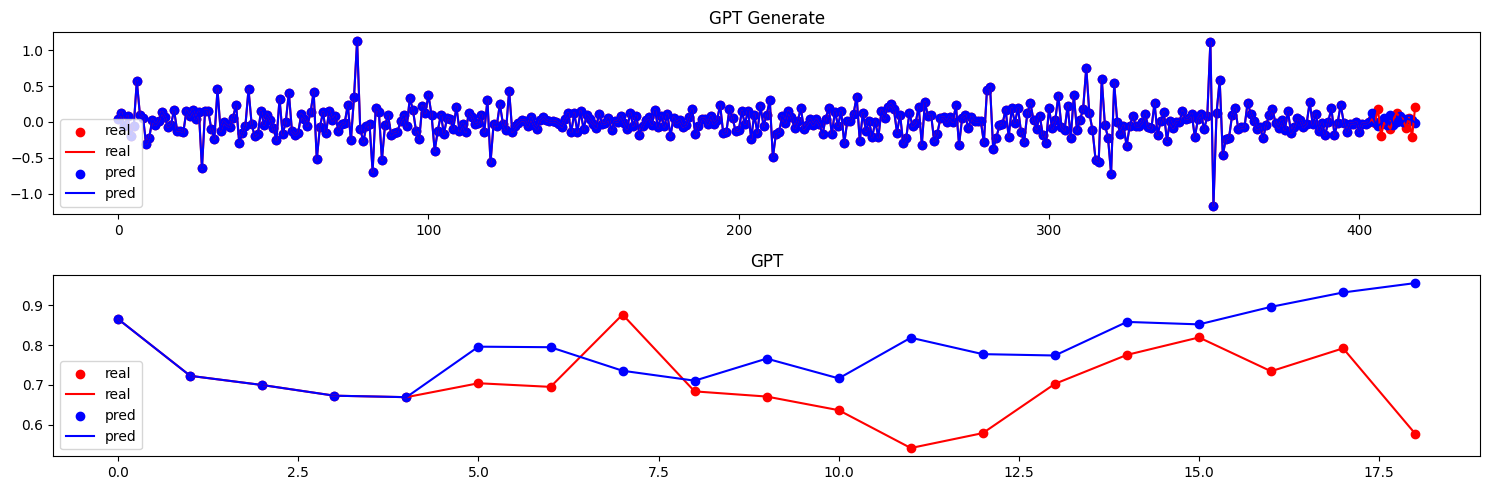

In [77]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk000to400_train )

function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )



## Run 5


In [78]:

the_range = training_chunk + block_size

index_to_slice = random.randrange(0, length_n - the_range)

index_to_slice

print( for_RNN_data_CIVS.shape[0] )
print( index_to_slice )
print( index_to_slice + the_range )

sliced_chunk_CIVS = for_RNN_data_CIVS[ index_to_slice : index_to_slice + the_range]

n = block_size

print( n )

train_CIVS       = sliced_chunk_CIVS[   : -n ] 
test_CIVS        = sliced_chunk_CIVS[ -n:   ]

chunk300to400_train = train_CIVS[ 300  :  ] 
chunk200to400_train = train_CIVS[ 200  :  ]  
chunk100to400_train = train_CIVS[ 100  :  ] 
chunk000to400_train = train_CIVS[      :  ] 


print( chunk300to400_train.shape )
print( chunk200to400_train.shape )
print( chunk100to400_train.shape )
print( chunk000to400_train.shape )


1383
873
1288
15
(100, 24)
(200, 24)
(300, 24)
(400, 24)


torch.Size([100, 24])
0 train loss =  0.7852033972740173
500 train loss =  0.11822418123483658
1000 train loss =  0.06606844067573547
1500 train loss =  0.05214182659983635


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


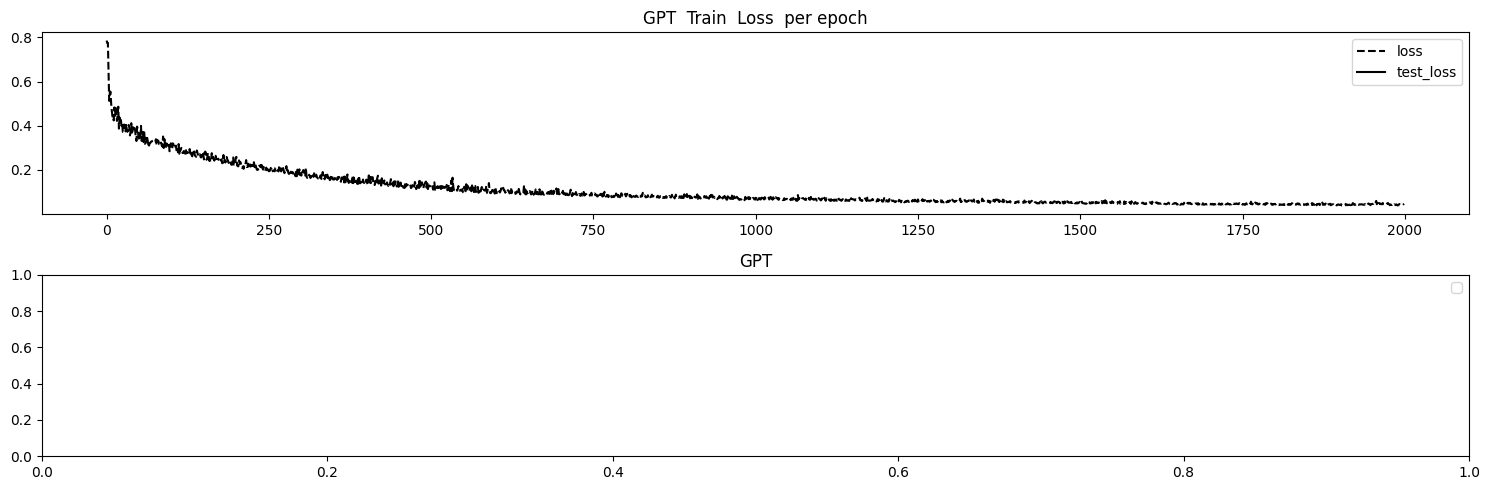

(15, 24)
(100, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

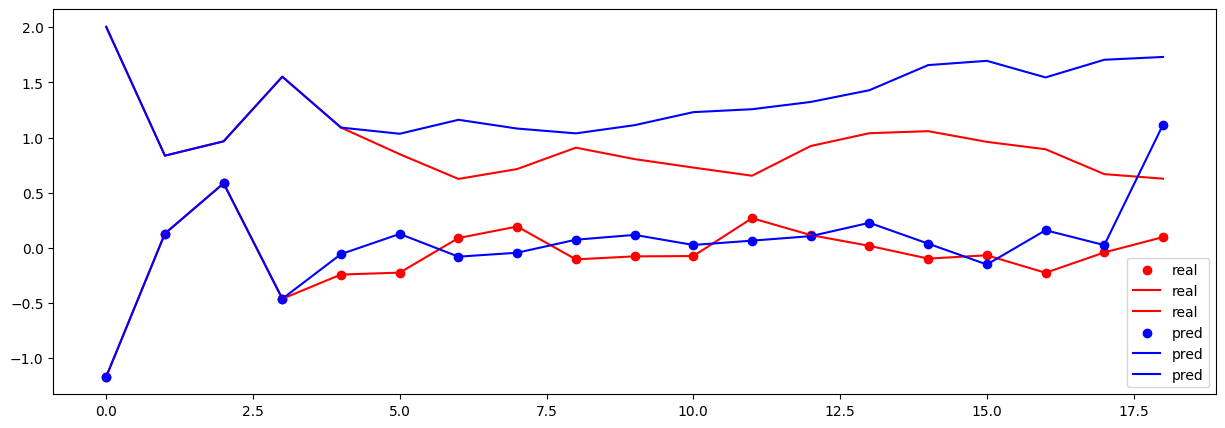

(100, 24)
119
19


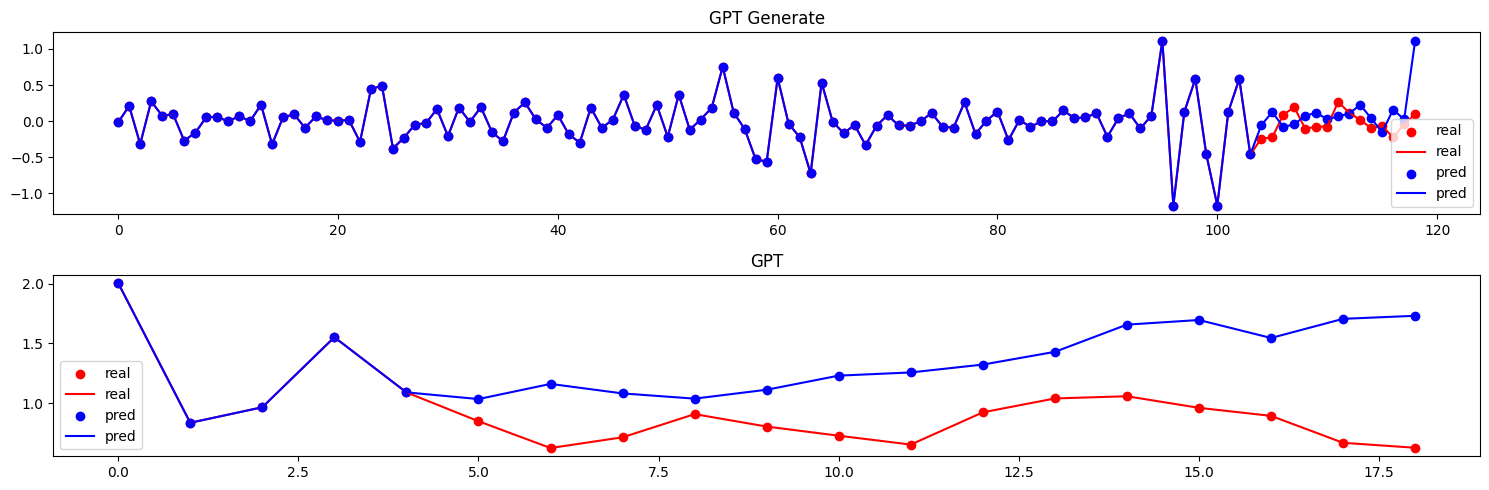

In [79]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk300to400_train )

function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )



torch.Size([200, 24])
0 train loss =  0.808089554309845
500 train loss =  0.18755526840686798
1000 train loss =  0.09874175488948822
1500 train loss =  0.07447586953639984


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


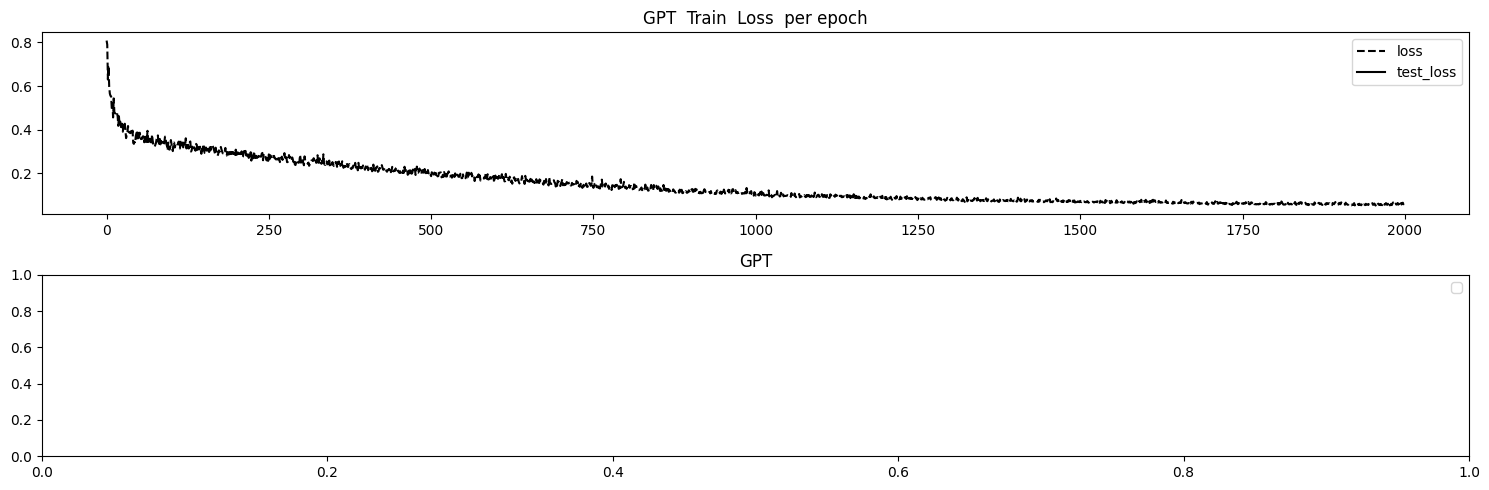

(15, 24)
(200, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

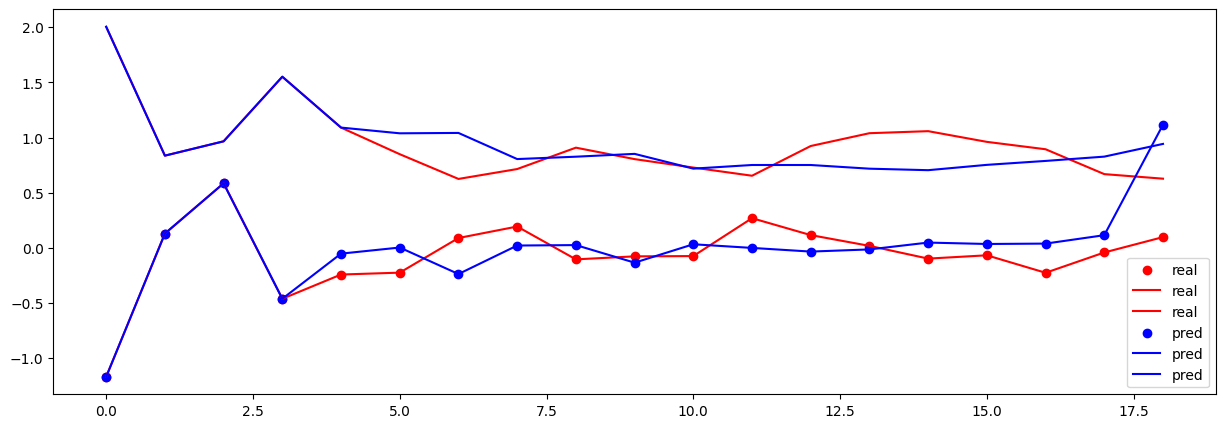

(200, 24)
219
19


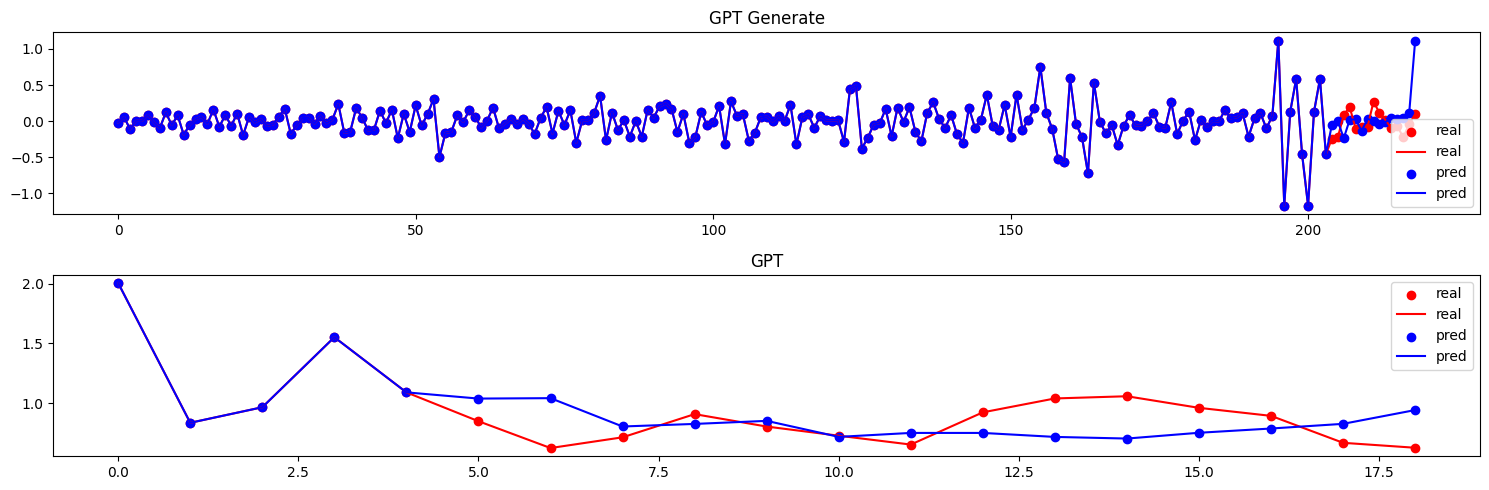

In [80]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk200to400_train )

function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )


torch.Size([300, 24])
0 train loss =  0.8671782612800598
500 train loss =  0.2178257405757904
1000 train loss =  0.1491176038980484
1500 train loss =  0.10629455000162125


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


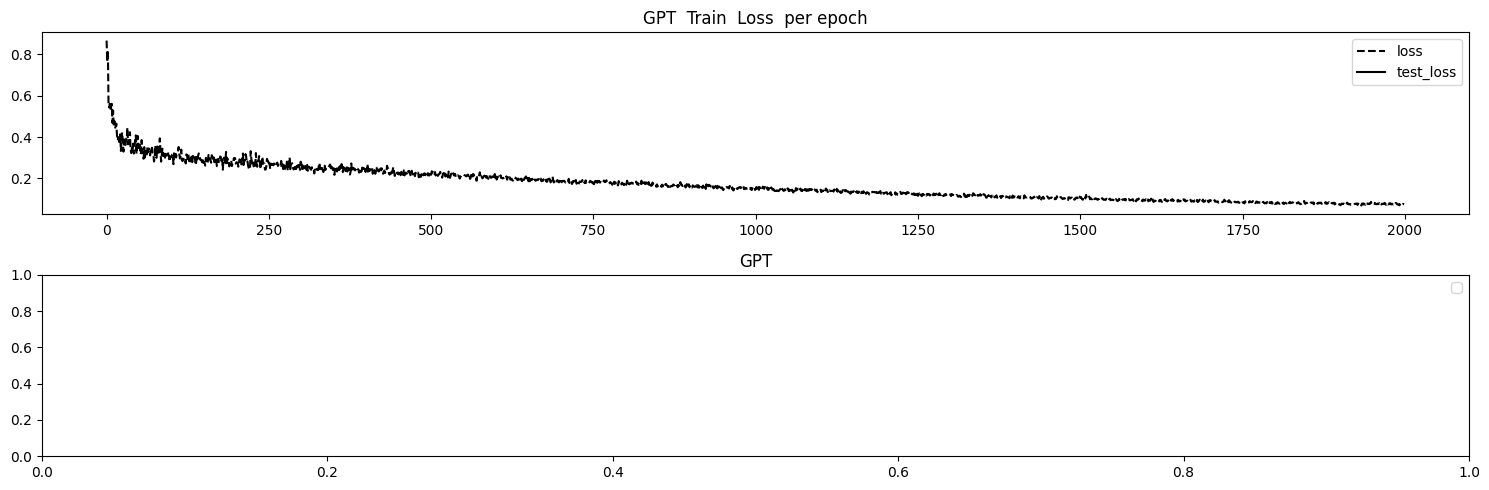

(15, 24)
(300, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

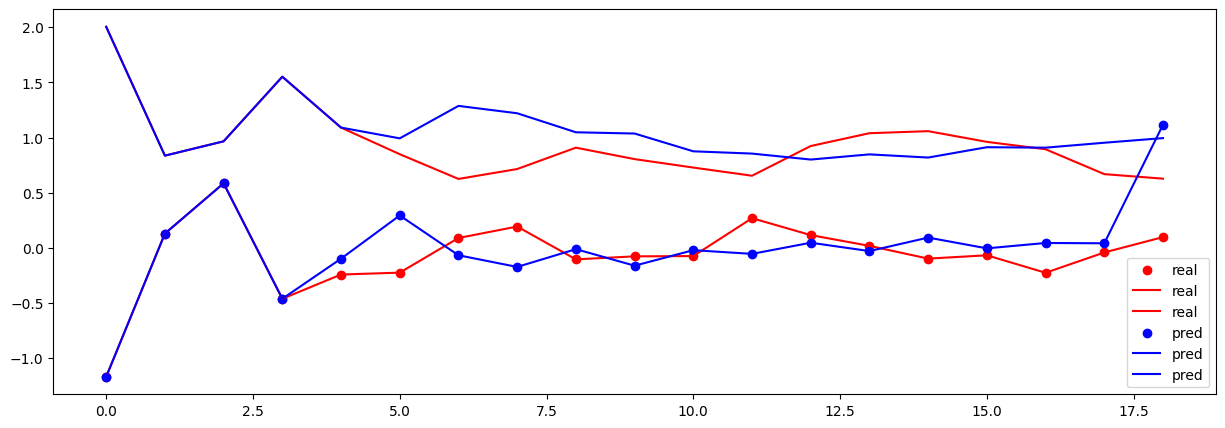

(300, 24)
319
19


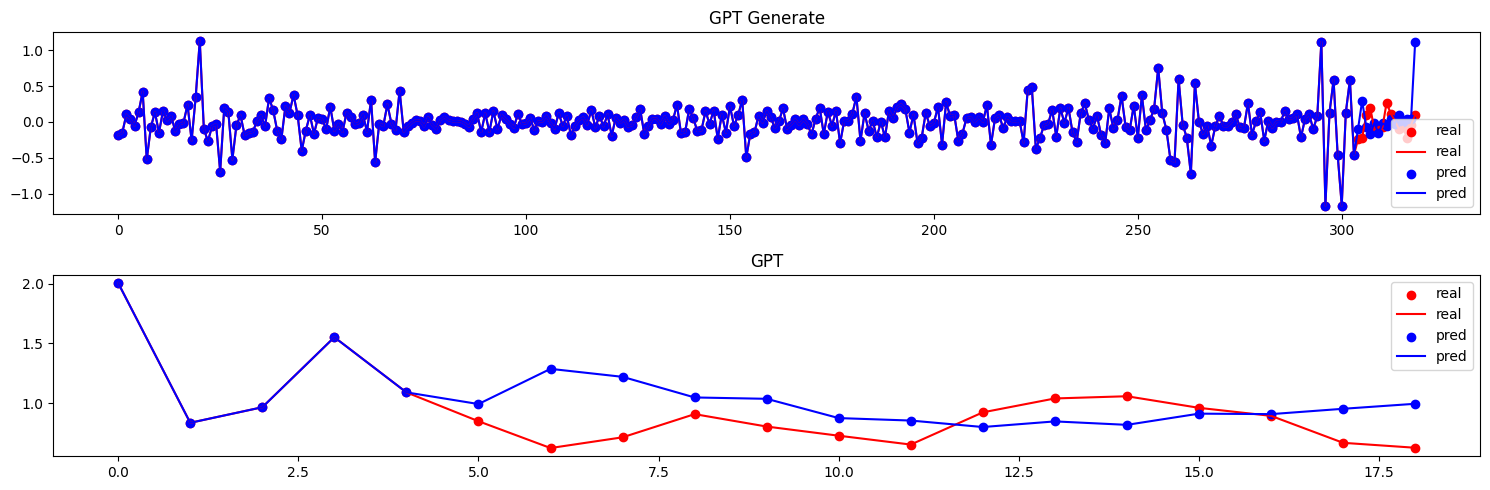

In [81]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk100to400_train  )

function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )


torch.Size([400, 24])
0 train loss =  0.8583717346191406
500 train loss =  0.22662237286567688
1000 train loss =  0.17237795889377594
1500 train loss =  0.12347843497991562


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


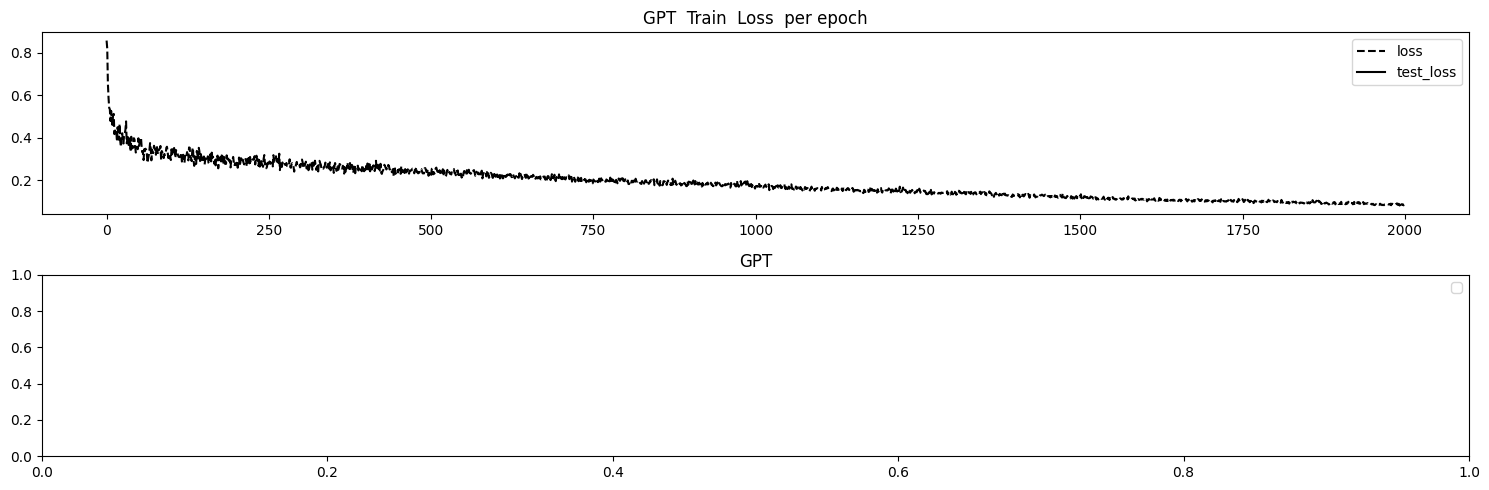

(15, 24)
(400, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

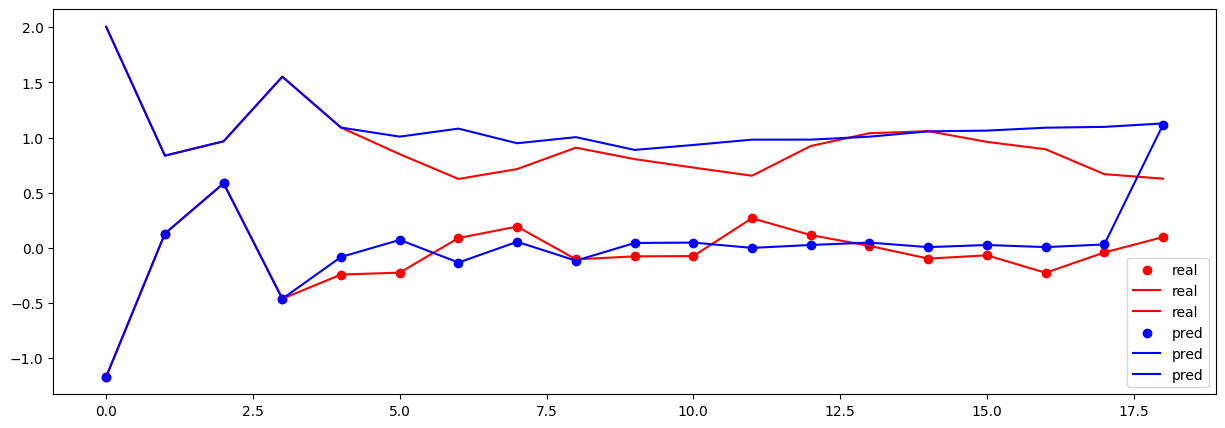

(400, 24)
419
19


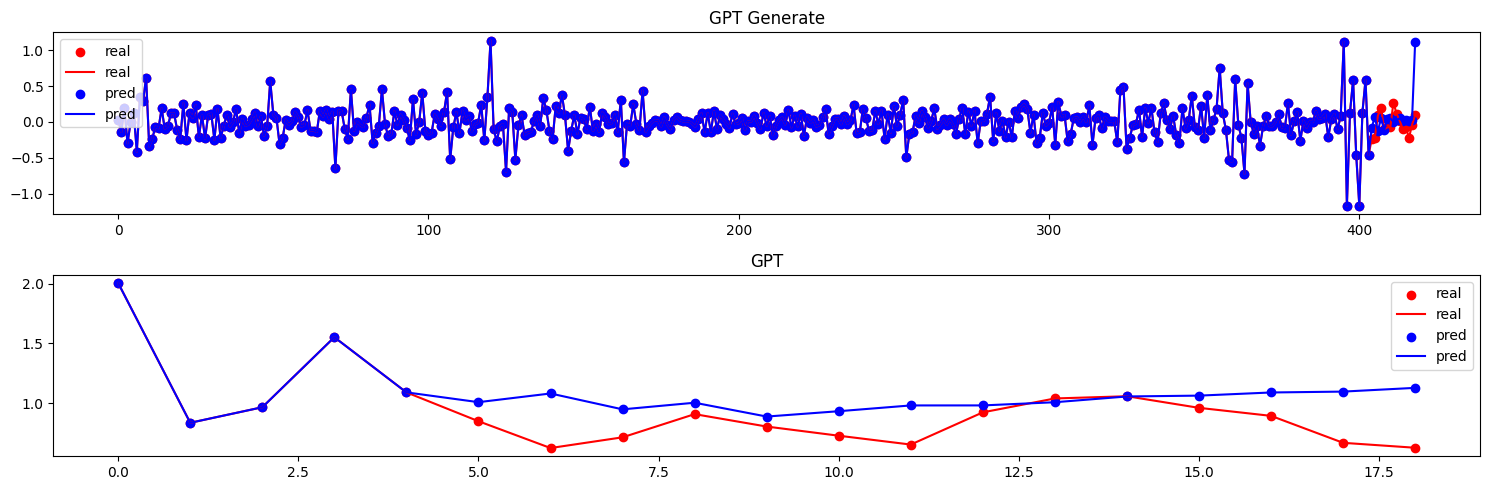

In [82]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk000to400_train )

function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )



## Run 6


In [83]:

the_range = training_chunk + block_size

index_to_slice = random.randrange(0, length_n - the_range)

index_to_slice

print( for_RNN_data_CIVS.shape[0] )
print( index_to_slice )
print( index_to_slice + the_range )

sliced_chunk_CIVS = for_RNN_data_CIVS[ index_to_slice : index_to_slice + the_range]

n = block_size

print( n )

train_CIVS       = sliced_chunk_CIVS[   : -n ] 
test_CIVS        = sliced_chunk_CIVS[ -n:   ]

chunk300to400_train = train_CIVS[ 300  :  ] 
chunk200to400_train = train_CIVS[ 200  :  ]  
chunk100to400_train = train_CIVS[ 100  :  ] 
chunk000to400_train = train_CIVS[      :  ] 


print( chunk300to400_train.shape )
print( chunk200to400_train.shape )
print( chunk100to400_train.shape )
print( chunk000to400_train.shape )


1383
516
931
15
(100, 24)
(200, 24)
(300, 24)
(400, 24)


torch.Size([100, 24])
0 train loss =  0.8224124908447266
500 train loss =  0.10811182856559753
1000 train loss =  0.06525391340255737
1500 train loss =  0.049533456563949585


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


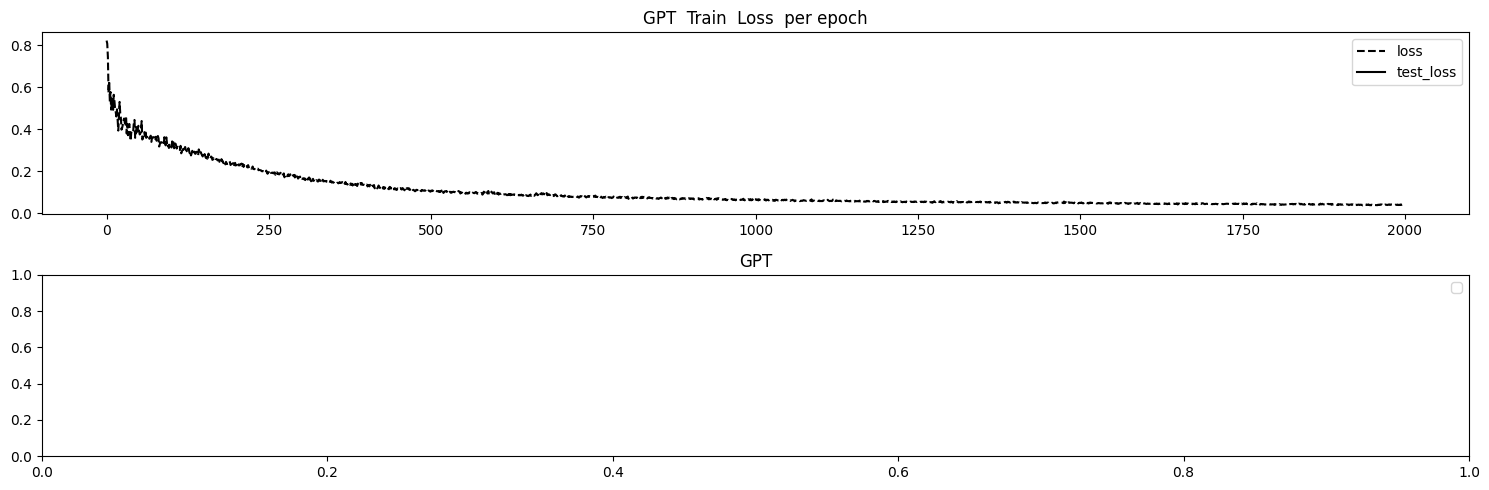

(15, 24)
(100, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

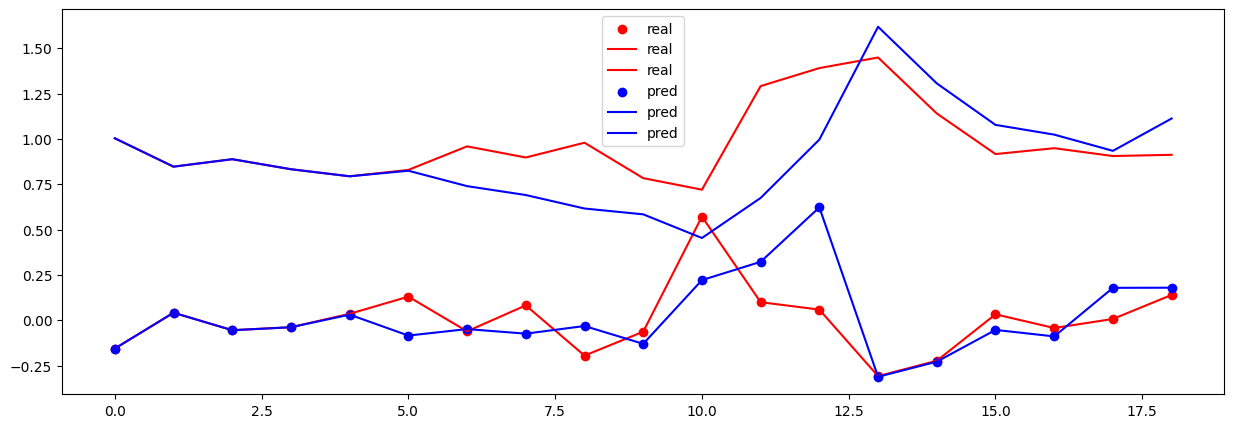

(100, 24)
119
19


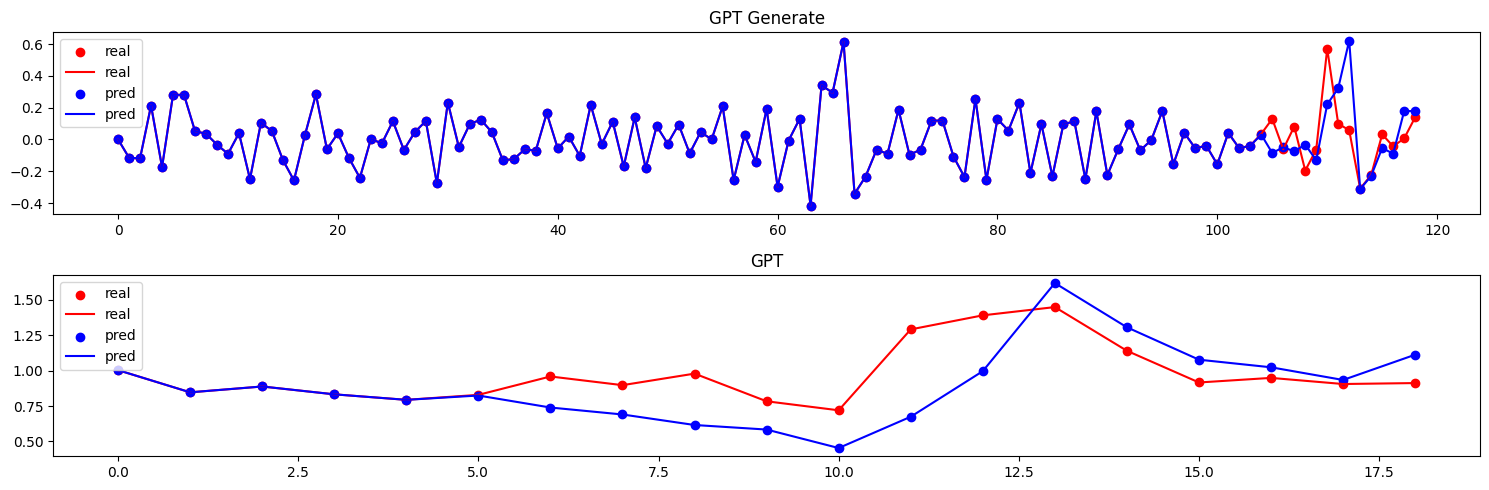

In [84]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk300to400_train )

function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )



torch.Size([200, 24])
0 train loss =  0.8934309482574463
500 train loss =  0.19089864194393158
1000 train loss =  0.09567176550626755
1500 train loss =  0.06725580245256424


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


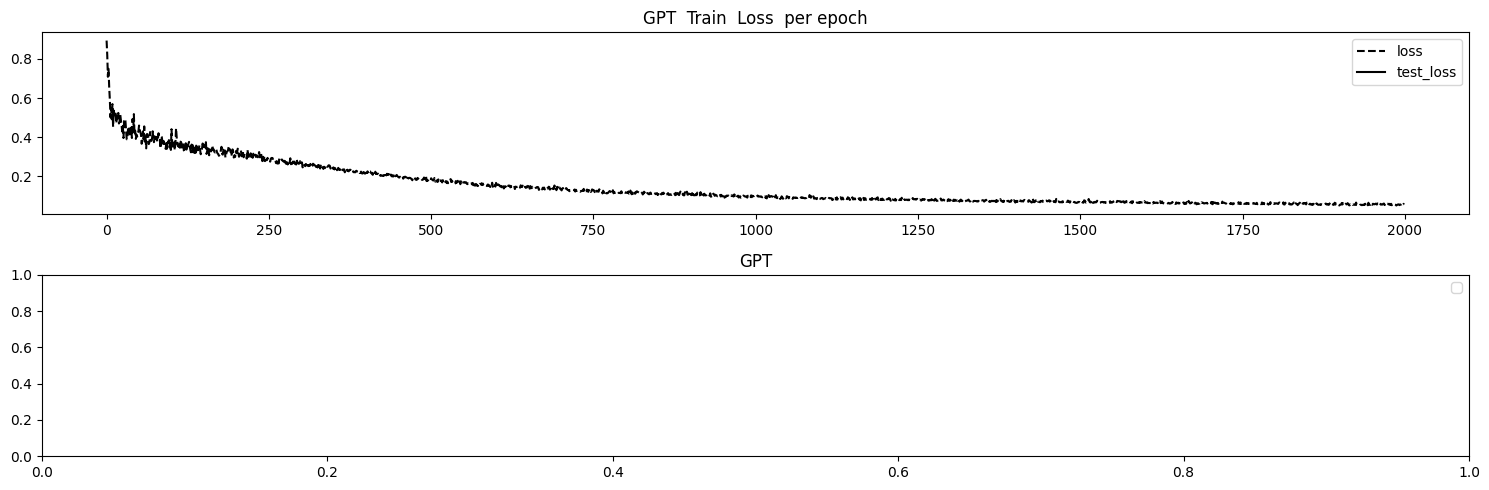

(15, 24)
(200, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

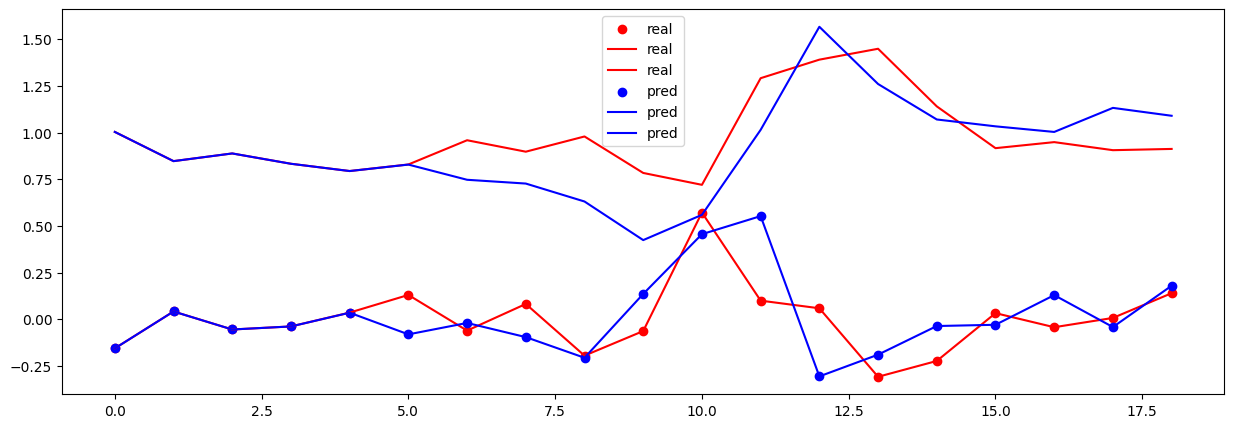

(200, 24)
219
19


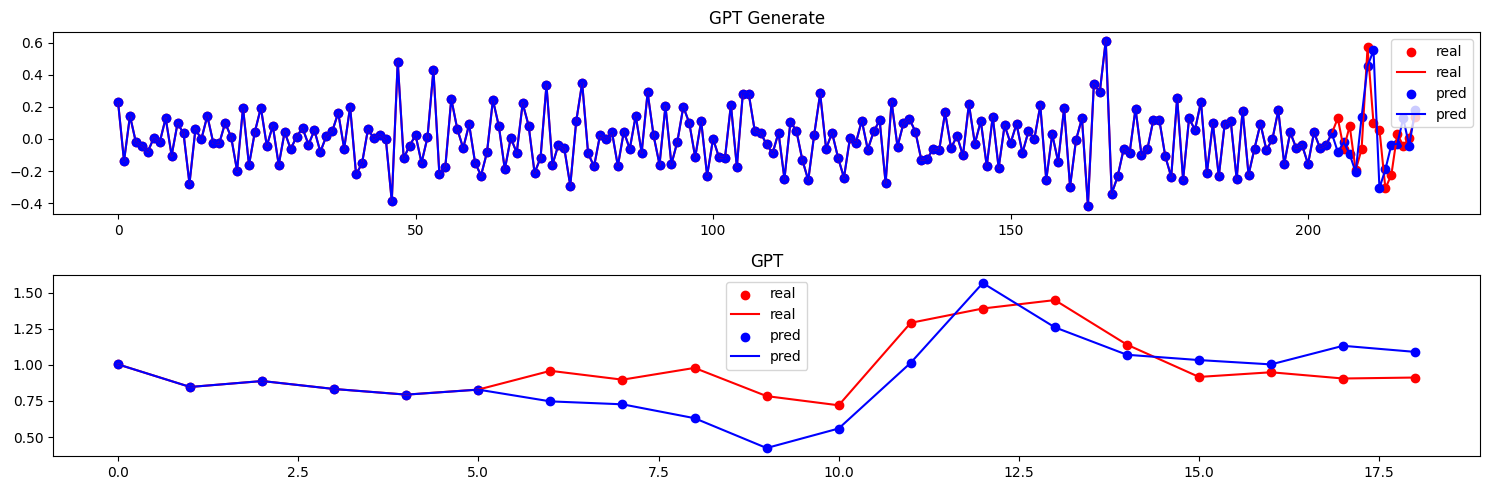

In [85]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk200to400_train )

function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )


torch.Size([300, 24])
0 train loss =  0.8219525218009949
500 train loss =  0.2470962554216385
1000 train loss =  0.1352393478155136
1500 train loss =  0.0878957137465477


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


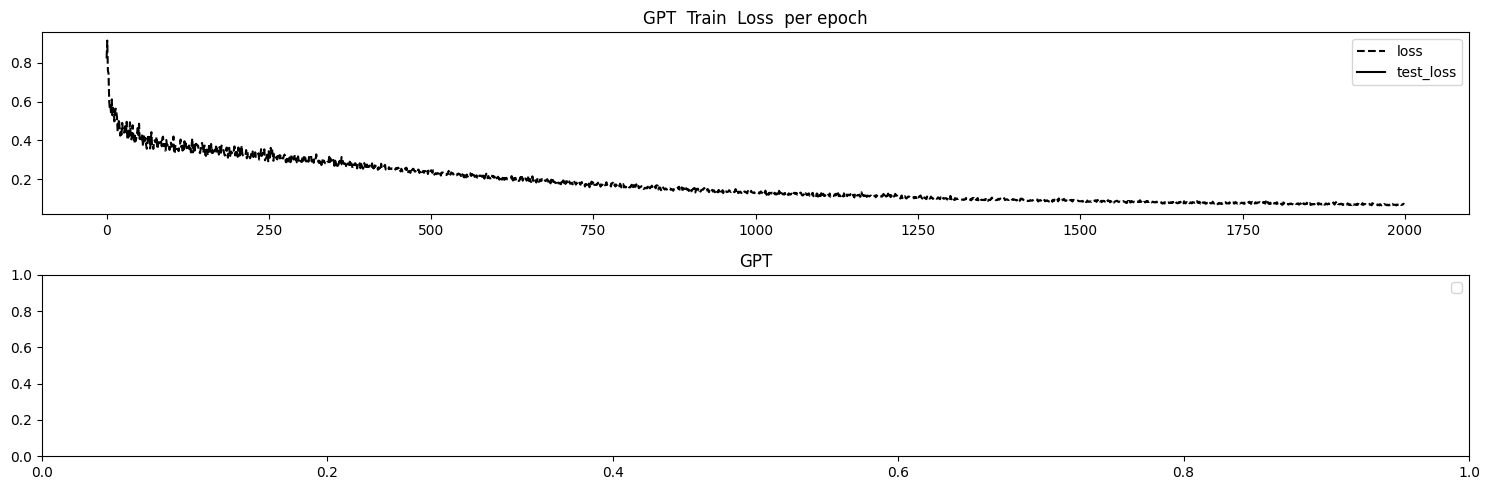

(15, 24)
(300, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

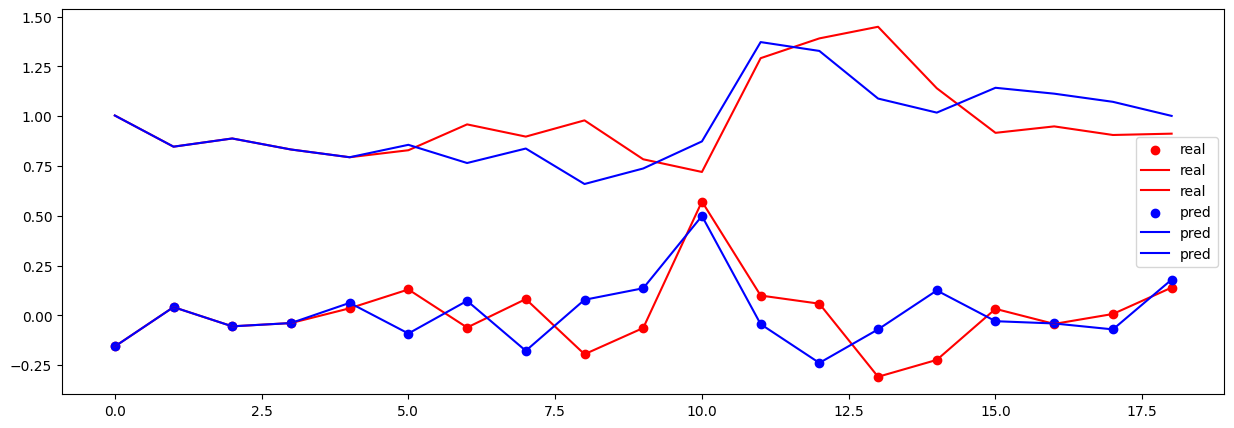

(300, 24)
319
19


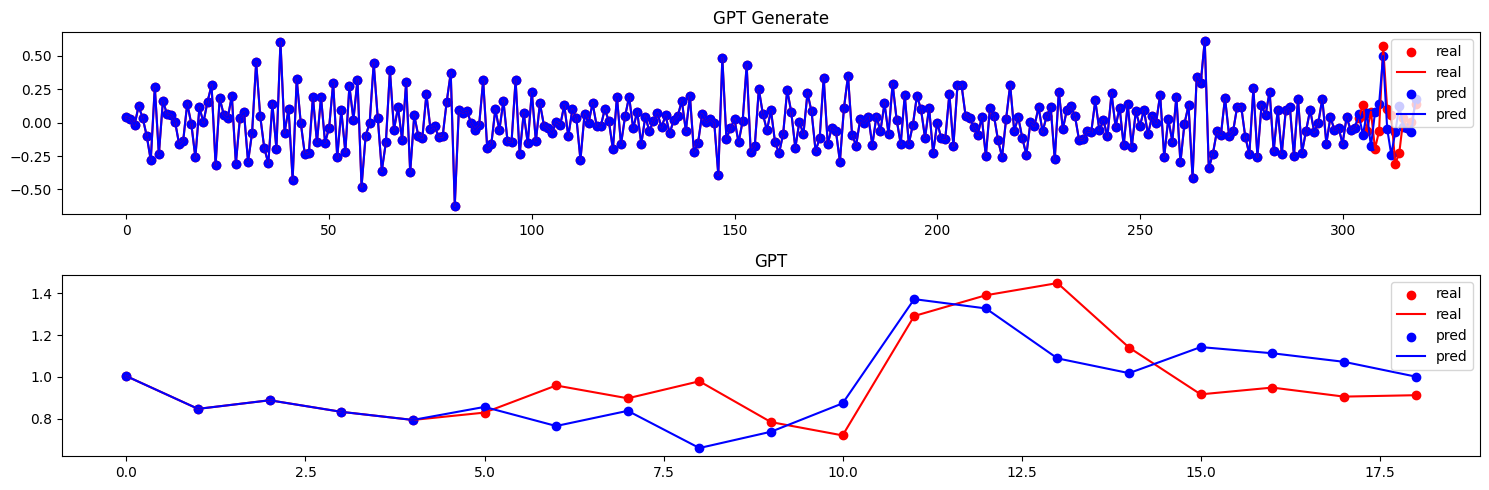

In [86]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk100to400_train  )

function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )


torch.Size([400, 24])
0 train loss =  0.8626387715339661
500 train loss =  0.23587235808372498
1000 train loss =  0.16901078820228577
1500 train loss =  0.1258634775876999


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


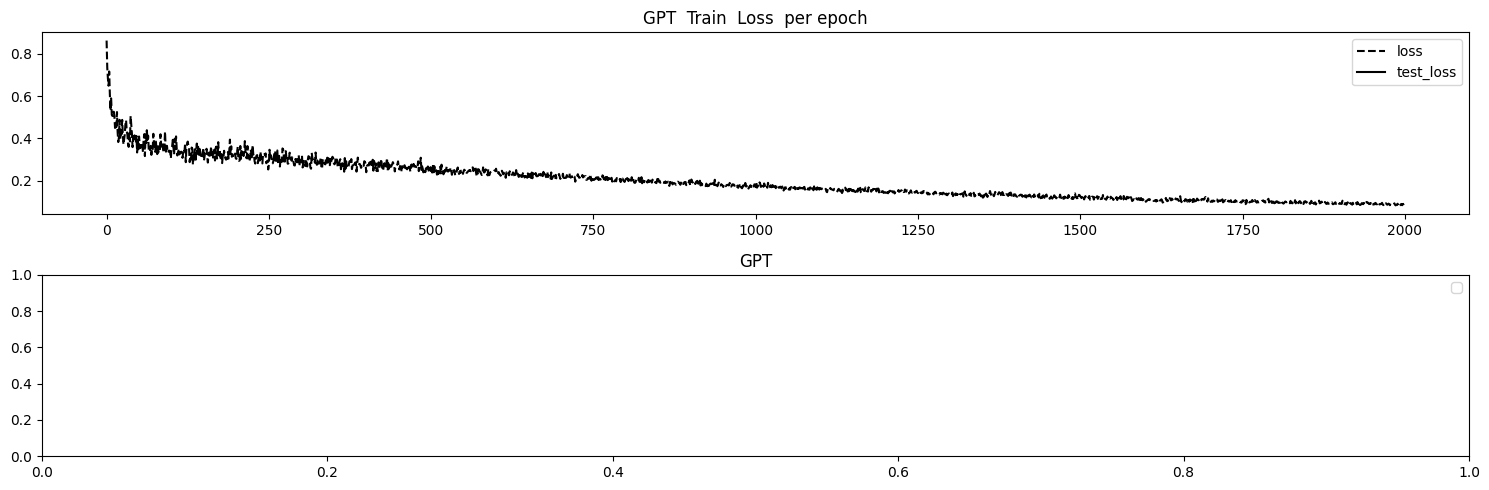

(15, 24)
(400, 24)
(20, 24)
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([20, 24])
torch.Size([1, 19, 24])
torch.Size([1, 19, 24])
input to m.generate
torch.Size([1, 5, 24])
torch.Size([1, 5, 24])
torch.Size([1, 1, 24])
torch.Size([1, 6, 24])
torch.Size([1, 6, 24])
torch.Size([1, 1, 24])
torch.Size([1, 7, 24])
torch.Size([1, 7, 24])
torch.Size([1, 1, 24])
torch.Size([1, 8, 24])
torch.Size([1, 8, 24])
torch.Size([1, 1, 24])
torch.Size([1, 9, 24])
torch.Size([1, 9, 24])
torch.Size([1, 1, 24])
torch.Size([1, 10, 24])
torch.Size([1, 10, 24])
torch.Size([1, 1, 24])
torch.Size([1, 11, 24])
torch.Size([1, 11, 24])
torch.Size([1, 1, 24])
torch.Size([1, 12, 24])
torch.Size([1, 12, 24])
torch.Size([1, 1, 24])
torch.Size([1, 13, 24])
torch.Size([1, 13, 24])
torch.Size([1, 1, 24])
torch.Size([1, 14, 24])
torch.Size([1, 14, 24])
torch.Size([1, 1, 24])
torch.Size([1, 15, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])
torch.Size([1, 16, 24])
torch.Size([1, 15, 24])
torch.Size([1, 1, 24])

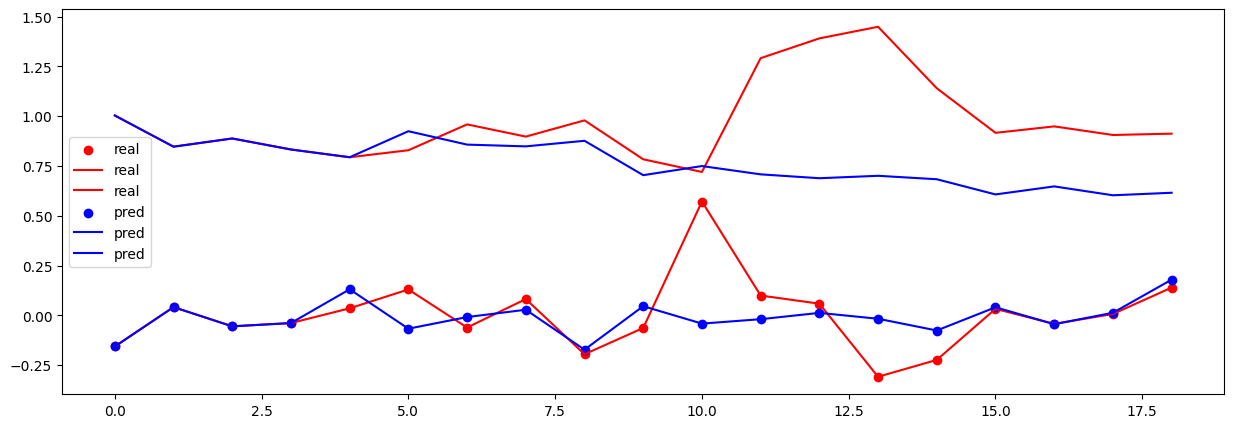

(400, 24)
419
19


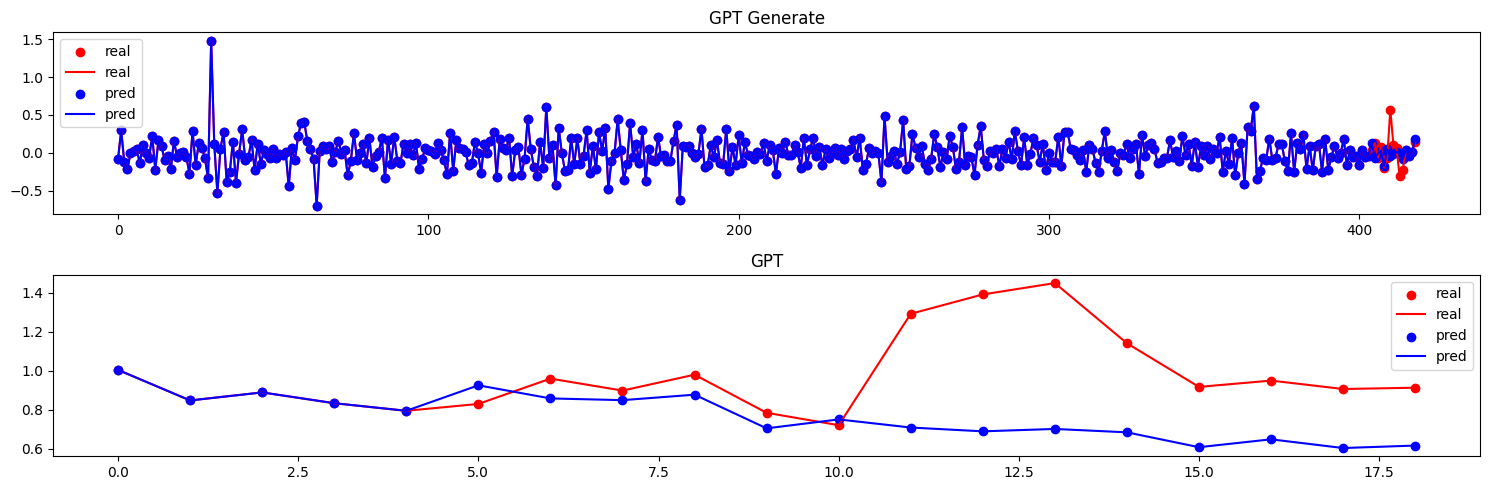

In [87]:

si_GPT, history_GPT, x_means, x_standard_devs  = function_train_rc(  chunk000to400_train )

function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs  )
